In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn # all the models from scikit-learn
from scipy import stats

In [7]:
# 1️⃣ Set random seed (for reproducibility)
import random
import os

SEED = 42
os.environ['PYTHONHASHSEED'] = str(SEED)
random.seed(SEED)
np.random.seed(SEED)

print(f"✅ Random seed set to {SEED}")

✅ Random seed set to 42


In [8]:
format(train_data.shape)

NameError: name 'train_data' is not defined

In [ ]:
format(test_data.shape)

In [ ]:
train_data.describe()

In [ ]:
test_data.describe()

In [ ]:
train_data.info()

In [ ]:
train_data.columns

In [ ]:
train_data.head()

In [ ]:
train_data.nunique().sort_values()

# PRE-PROCESSING and EDA


Train data loaded successfully!
Shape: (1200, 81)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 81 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Id                       1200 non-null   int64  
 1   PropertyClass            1200 non-null   int64  
 2   ZoningCategory           1200 non-null   object 
 3   RoadAccessLength         977 non-null    float64
 4   LandArea                 1200 non-null   int64  
 5   RoadType                 1200 non-null   object 
 6   ServiceLaneType          75 non-null     object 
 7   PlotShape                1200 non-null   object 
 8   LandElevation            1200 non-null   object 
 9   UtilityAccess            1200 non-null   object 
 10  PlotConfiguration        1200 non-null   object 
 11  LandSlope                1200 non-null   object 
 12  District                 1200 non-null   object 
 13  NearbyTransport1         120

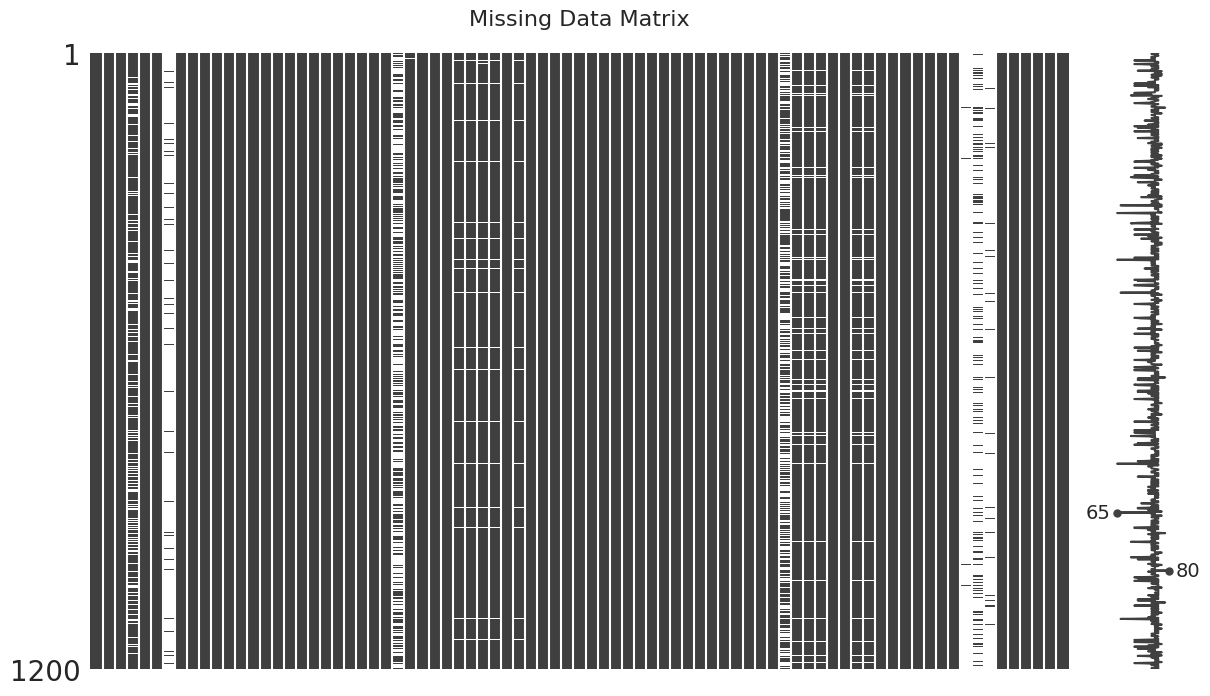


Numerical columns (38): ['Id', 'PropertyClass', 'RoadAccessLength', 'LandArea', 'OverallQuality', 'OverallCondition', 'ConstructionYear', 'RenovationYear', 'FacadeArea', 'BasementFacilitySF1', 'BasementFacilitySF2', 'BasementUnfinishedSF', 'BasementTotalSF', 'GroundFloorArea', 'UpperFloorArea', 'LowQualityArea', 'UsableArea', 'BasementFullBaths', 'BasementHalfBaths', 'FullBaths', 'HalfBaths', 'GuestRooms', 'Kitchens', 'TotalRooms', 'Lounges', 'ParkingConstructionYear', 'ParkingCapacity', 'ParkingArea', 'TerraceArea', 'OpenVerandaArea', 'EnclosedVerandaArea', 'SeasonalPorchArea', 'ScreenPorchArea', 'SwimmingPoolArea', 'ExtraFacilityValue', 'MonthSold', 'YearSold', 'HotelValue']

Categorical columns (43): ['ZoningCategory', 'RoadType', 'ServiceLaneType', 'PlotShape', 'LandElevation', 'UtilityAccess', 'PlotConfiguration', 'LandSlope', 'District', 'NearbyTransport1', 'NearbyTransport2', 'PropertyType', 'HotelStyle', 'RoofDesign', 'RoofMaterial', 'ExteriorPrimary', 'ExteriorSecondary', 'Fa

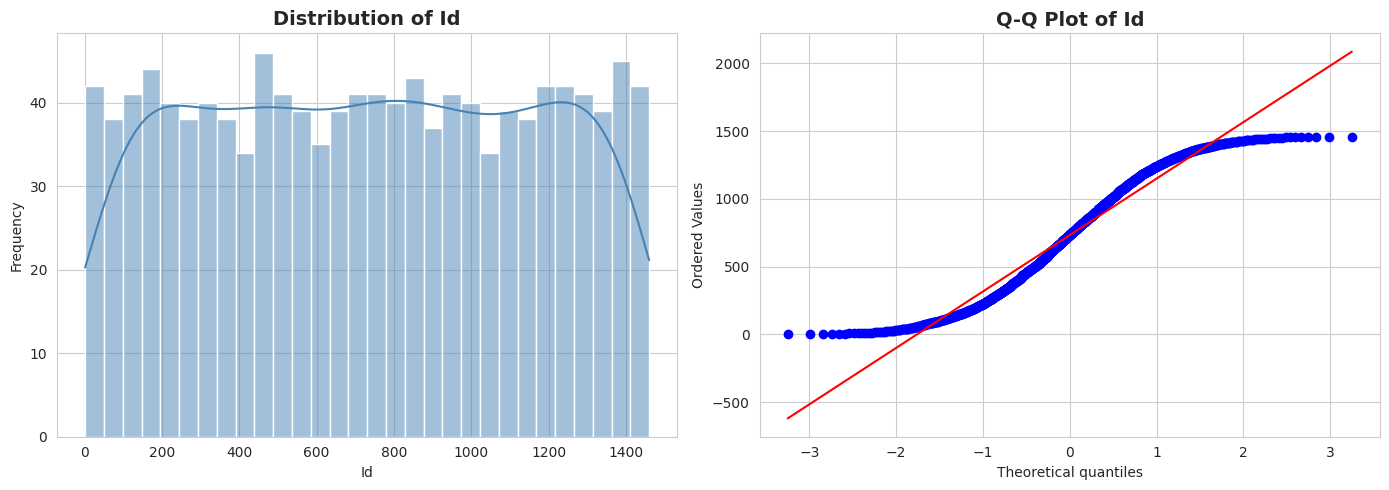

Id - Skewness: -0.003, Kurtosis: -1.213
------------------------------------------------------------


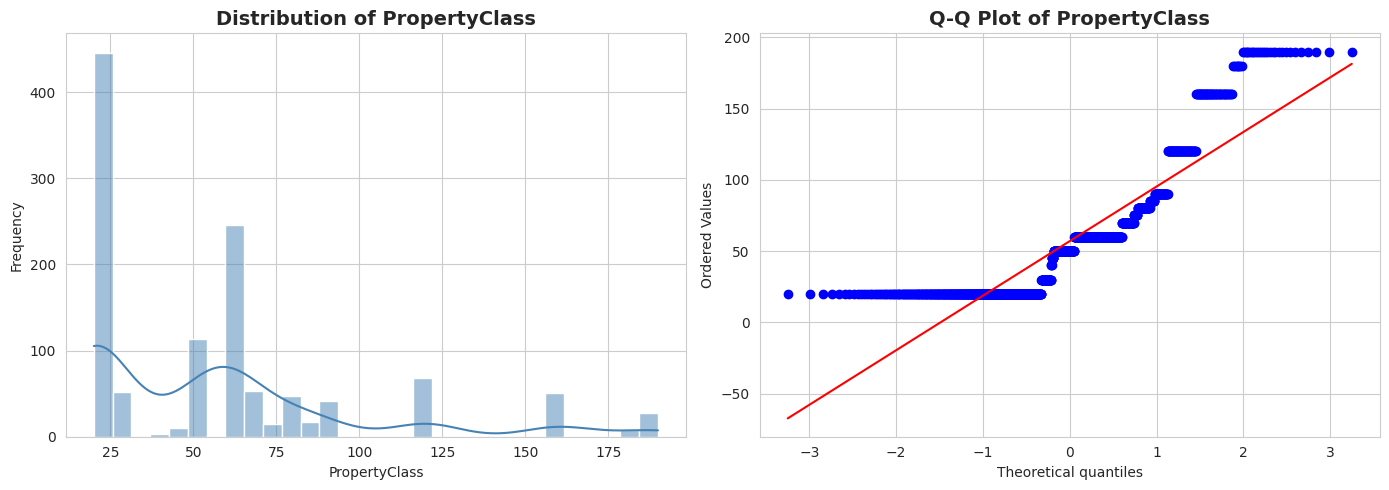

PropertyClass - Skewness: 1.423, Kurtosis: 1.627
------------------------------------------------------------


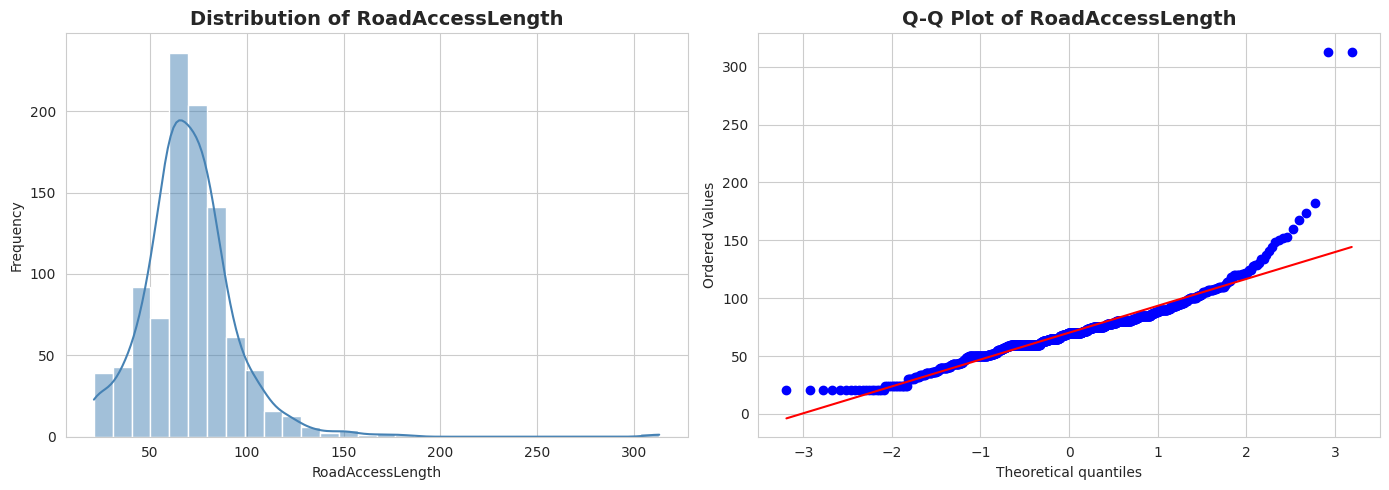

RoadAccessLength - Skewness: 2.354, Kurtosis: 19.008
------------------------------------------------------------


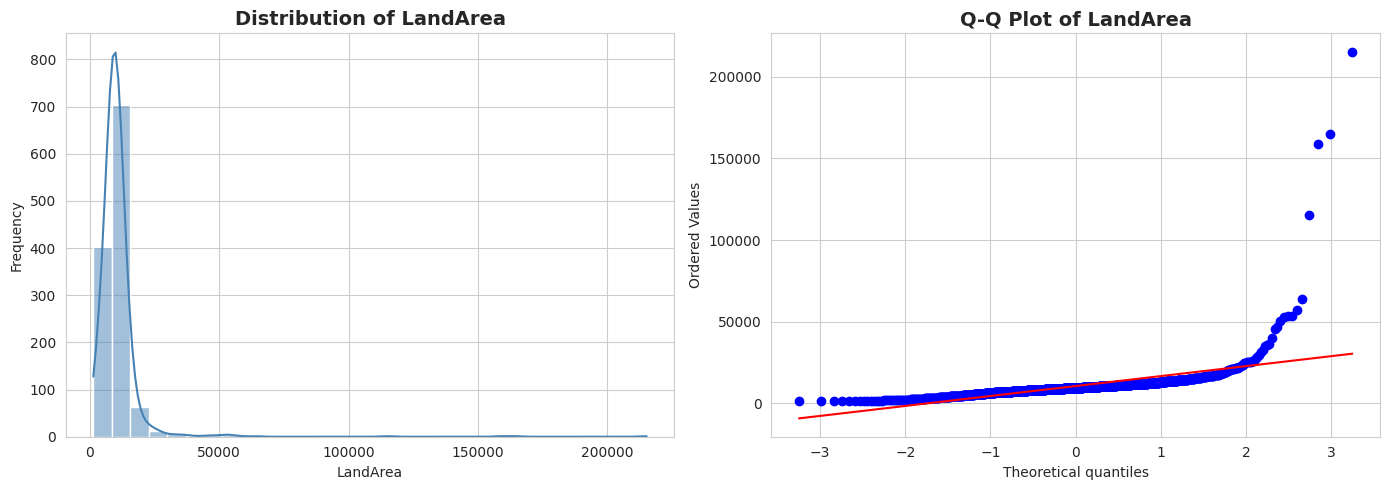

LandArea - Skewness: 12.036, Kurtosis: 189.772
------------------------------------------------------------


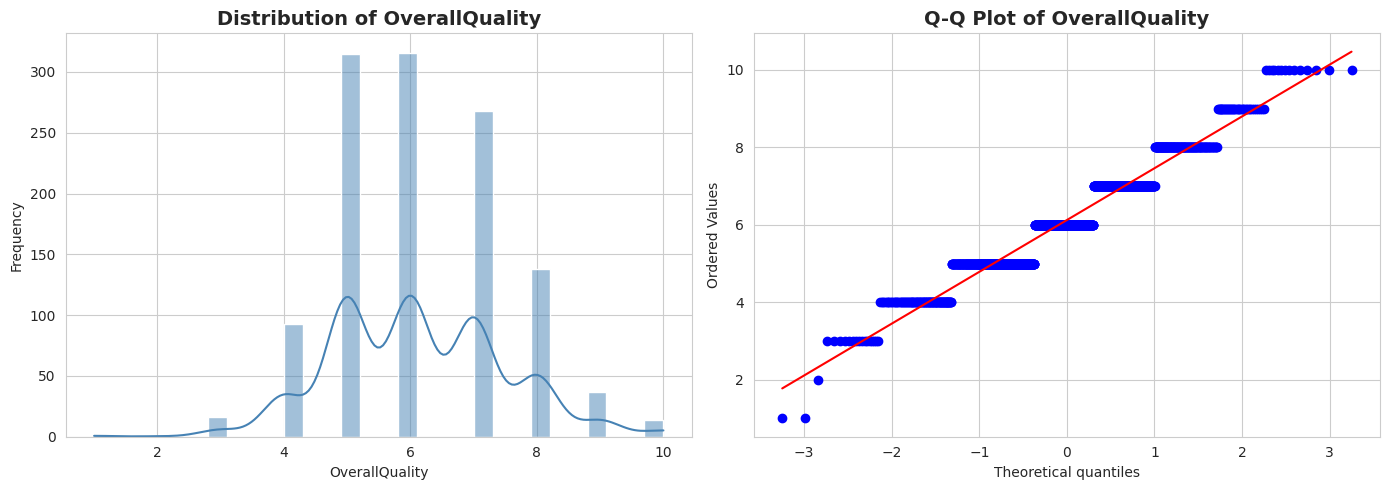

OverallQuality - Skewness: 0.202, Kurtosis: 0.106
------------------------------------------------------------


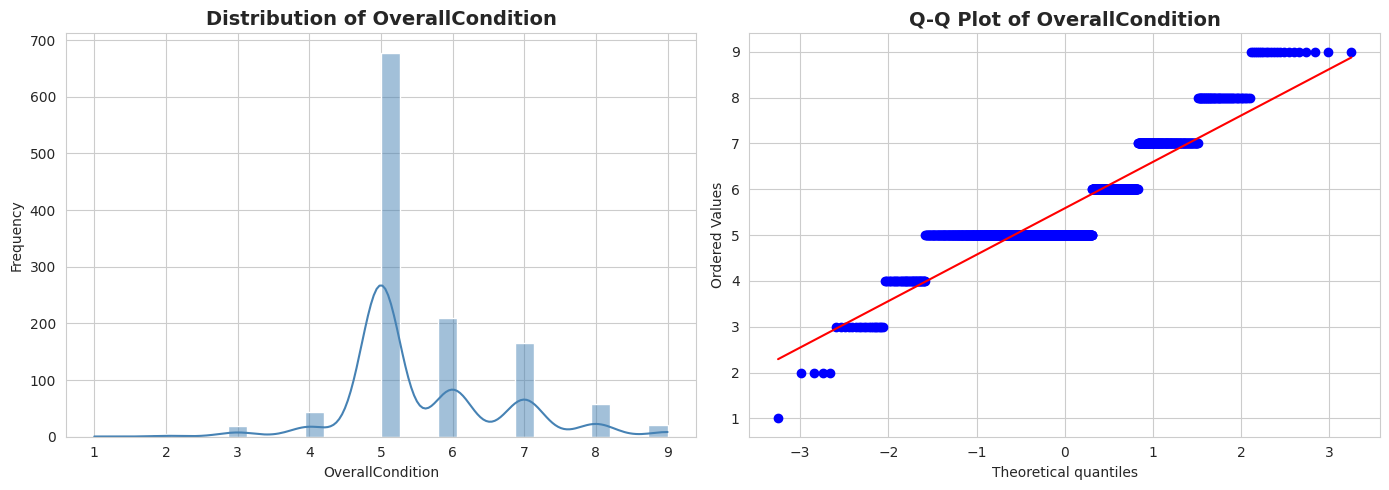

OverallCondition - Skewness: 0.735, Kurtosis: 1.231
------------------------------------------------------------


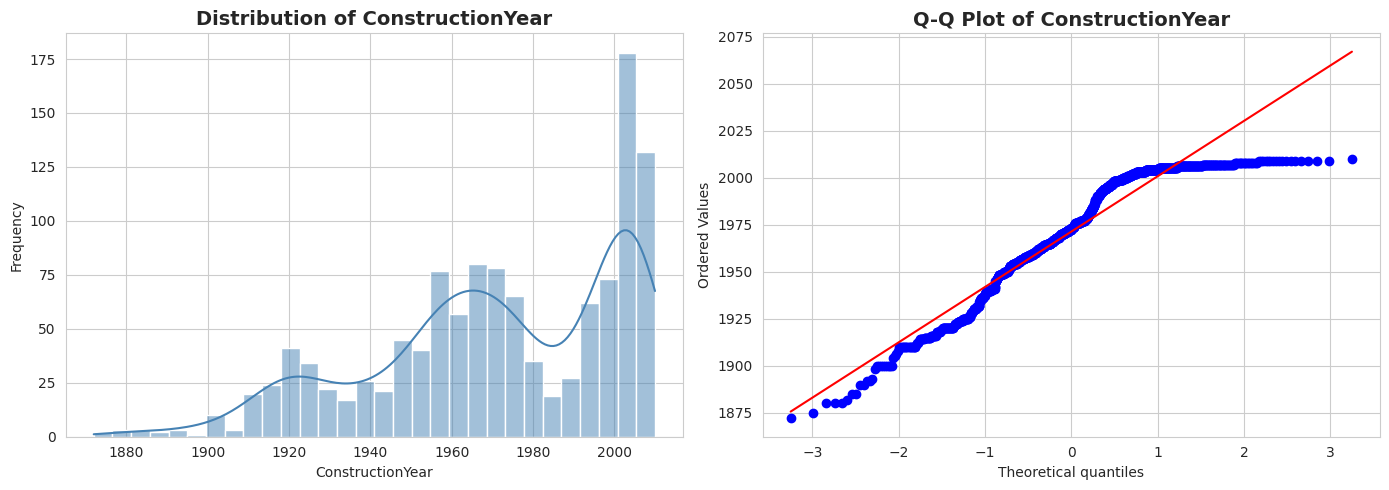

ConstructionYear - Skewness: -0.633, Kurtosis: -0.421
------------------------------------------------------------


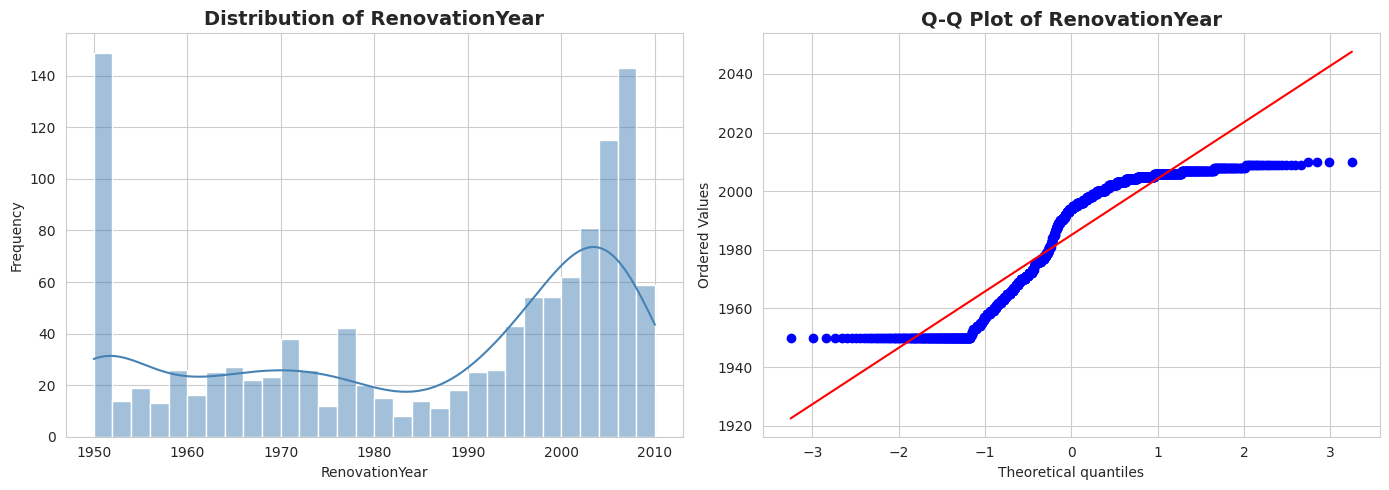

RenovationYear - Skewness: -0.517, Kurtosis: -1.270
------------------------------------------------------------


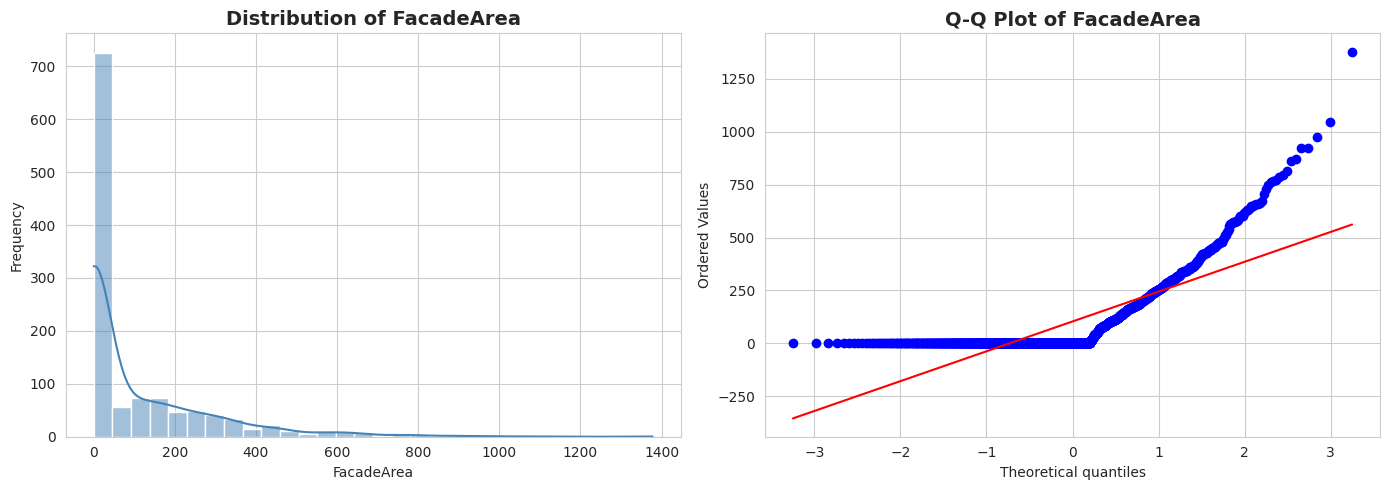

FacadeArea - Skewness: 2.277, Kurtosis: 6.631
------------------------------------------------------------


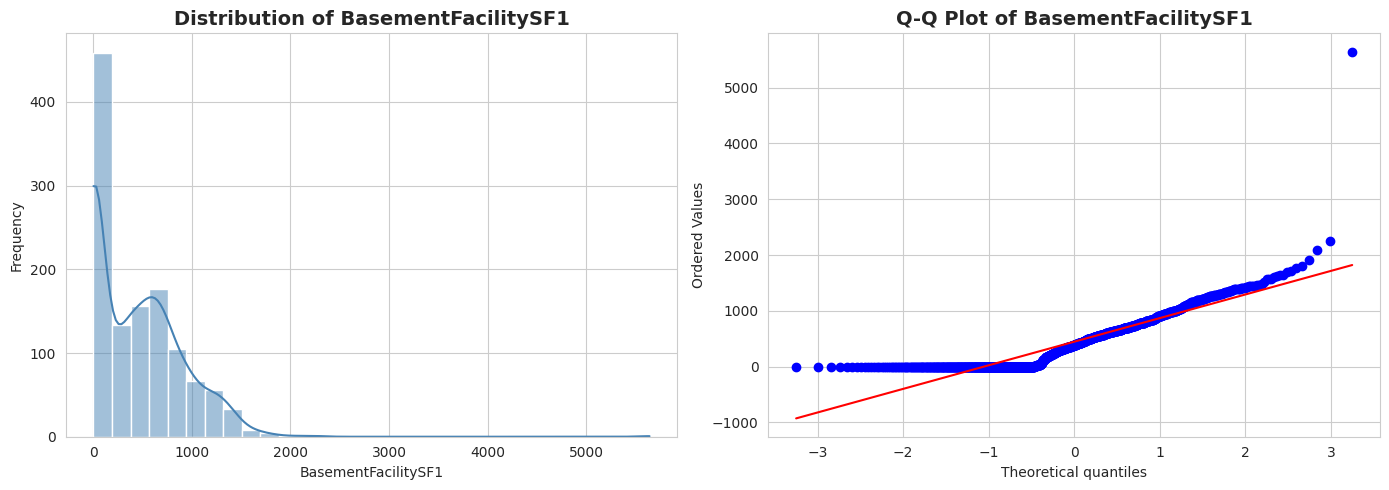

BasementFacilitySF1 - Skewness: 1.819, Kurtosis: 12.907
------------------------------------------------------------


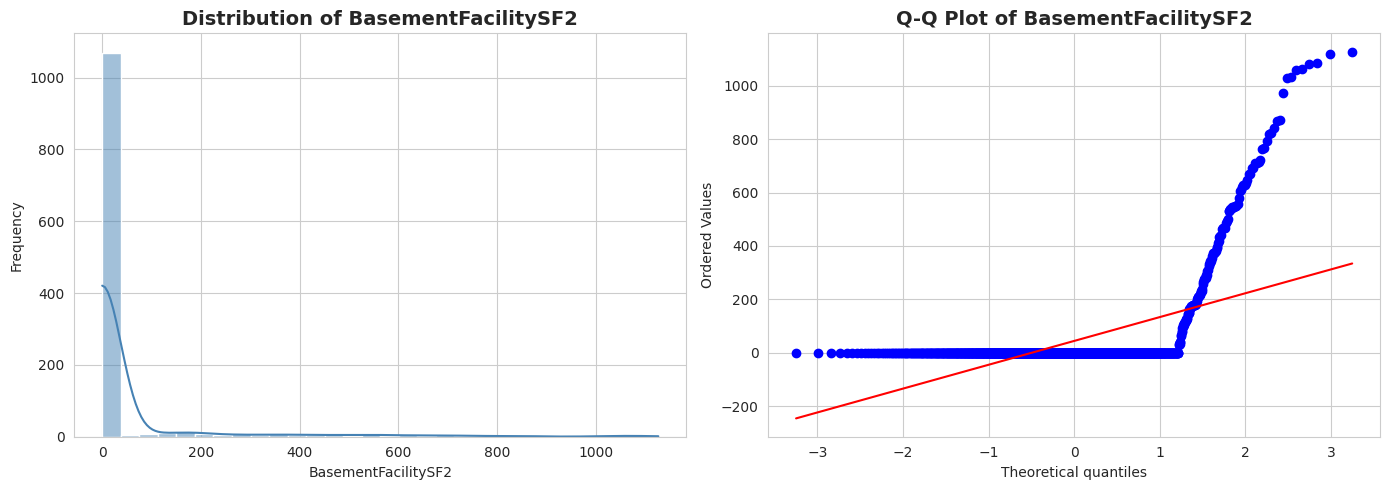

BasementFacilitySF2 - Skewness: 4.231, Kurtosis: 19.077
------------------------------------------------------------


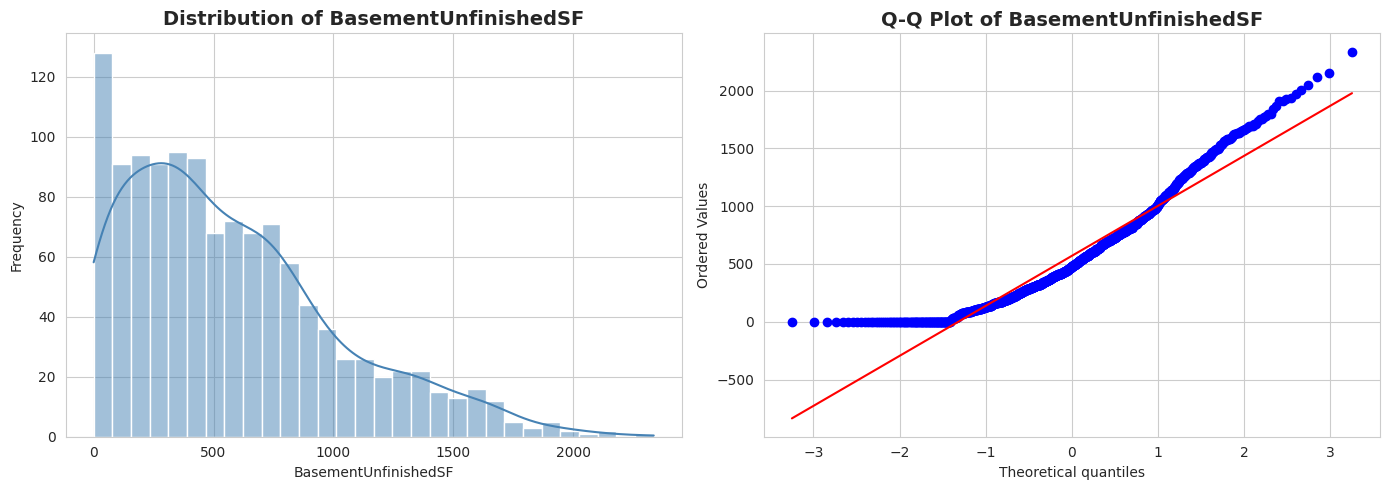

BasementUnfinishedSF - Skewness: 0.918, Kurtosis: 0.426
------------------------------------------------------------


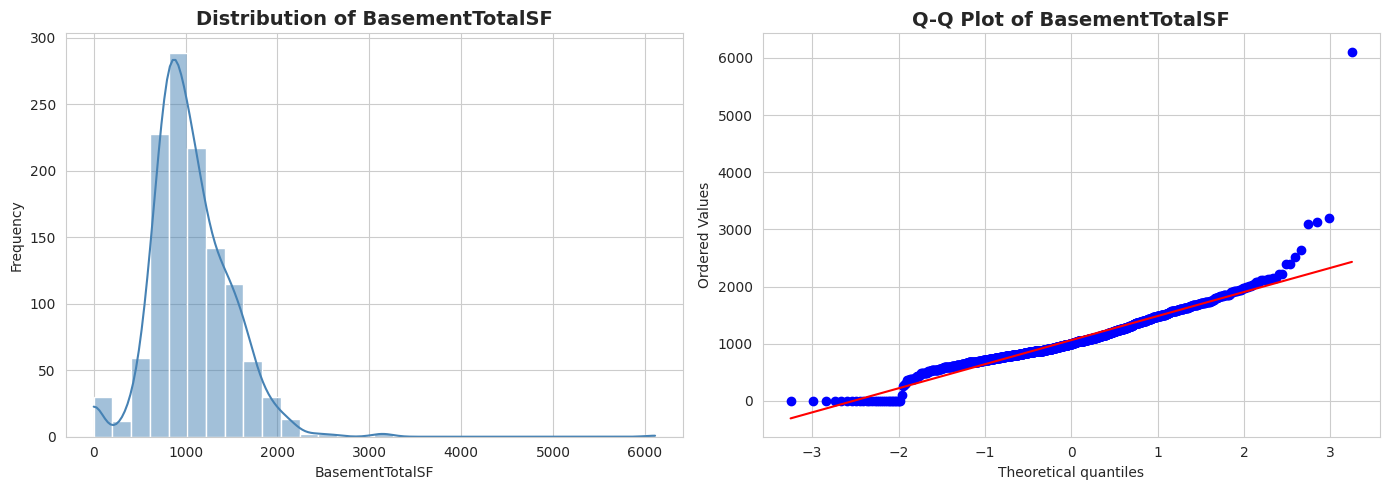

BasementTotalSF - Skewness: 1.678, Kurtosis: 15.161
------------------------------------------------------------


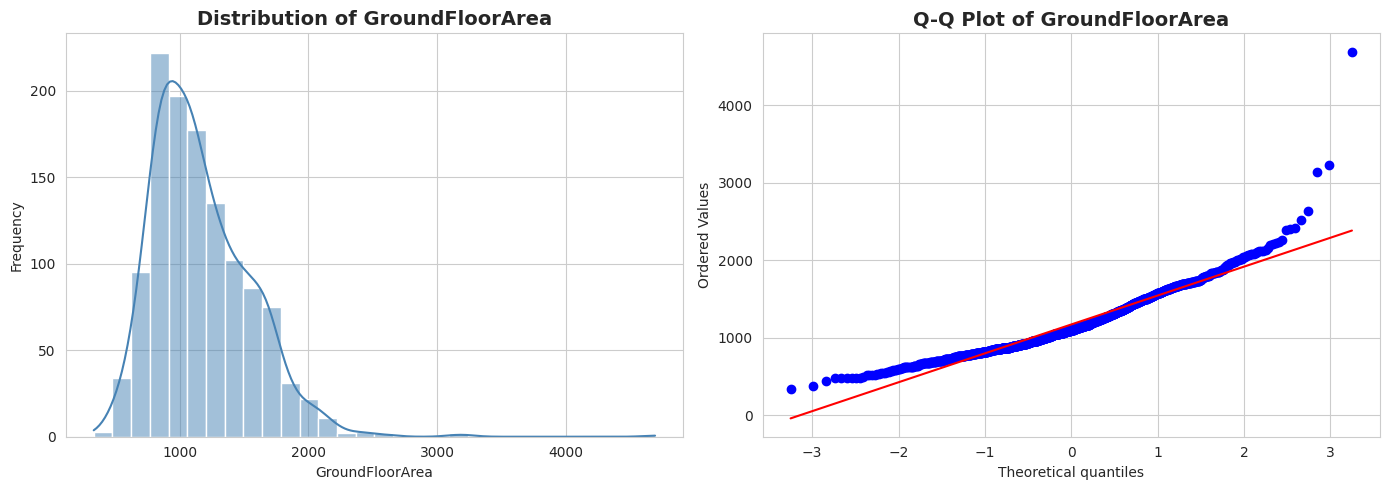

GroundFloorArea - Skewness: 1.398, Kurtosis: 6.468
------------------------------------------------------------


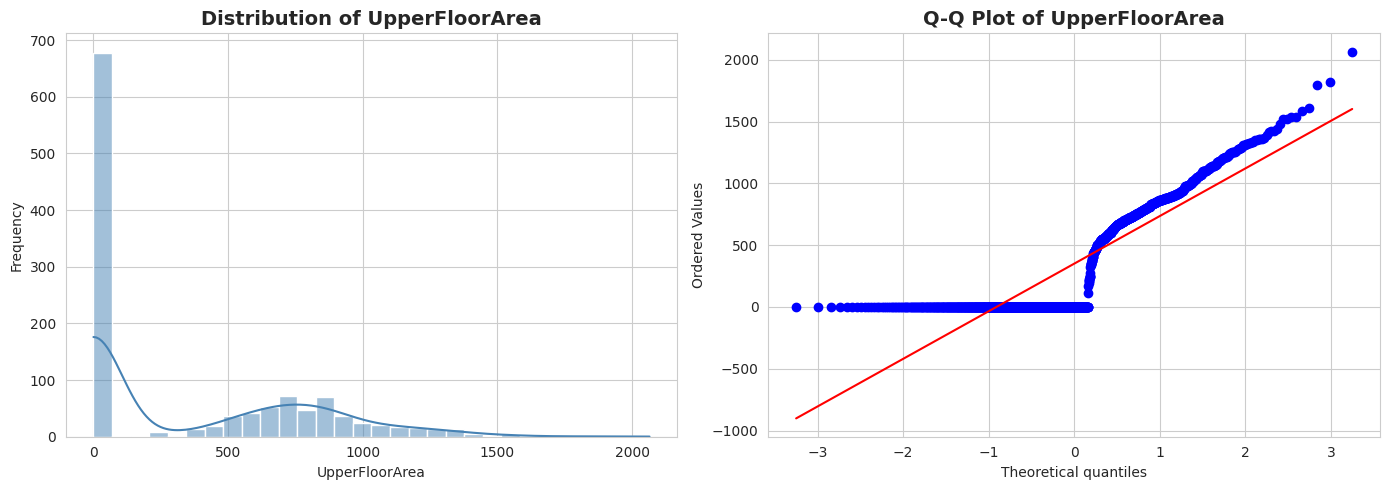

UpperFloorArea - Skewness: 0.805, Kurtosis: -0.566
------------------------------------------------------------


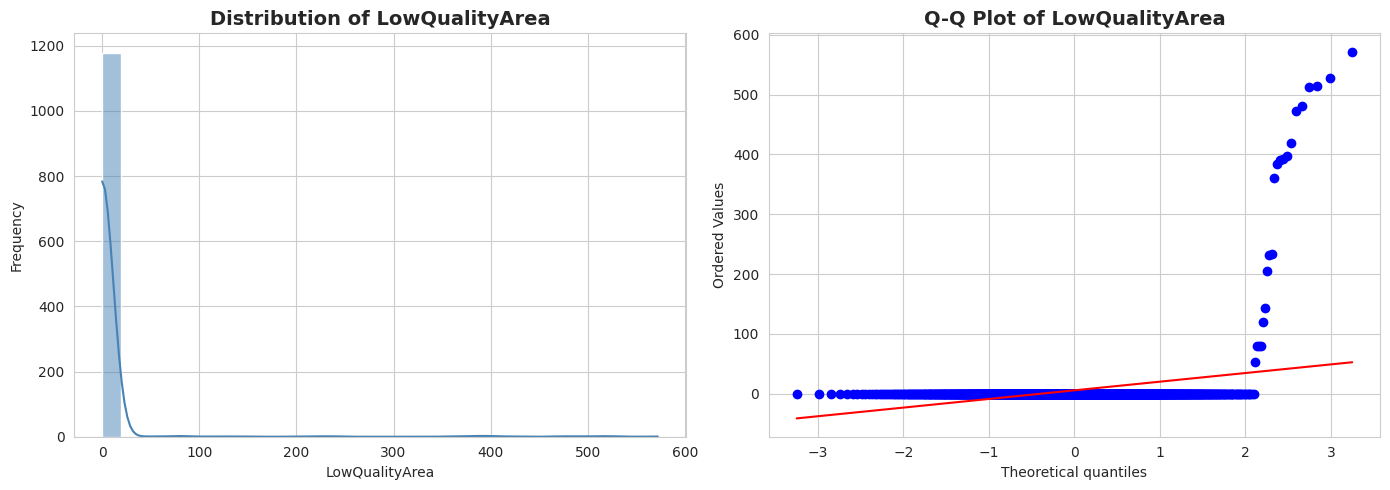

LowQualityArea - Skewness: 9.329, Kurtosis: 89.634
------------------------------------------------------------


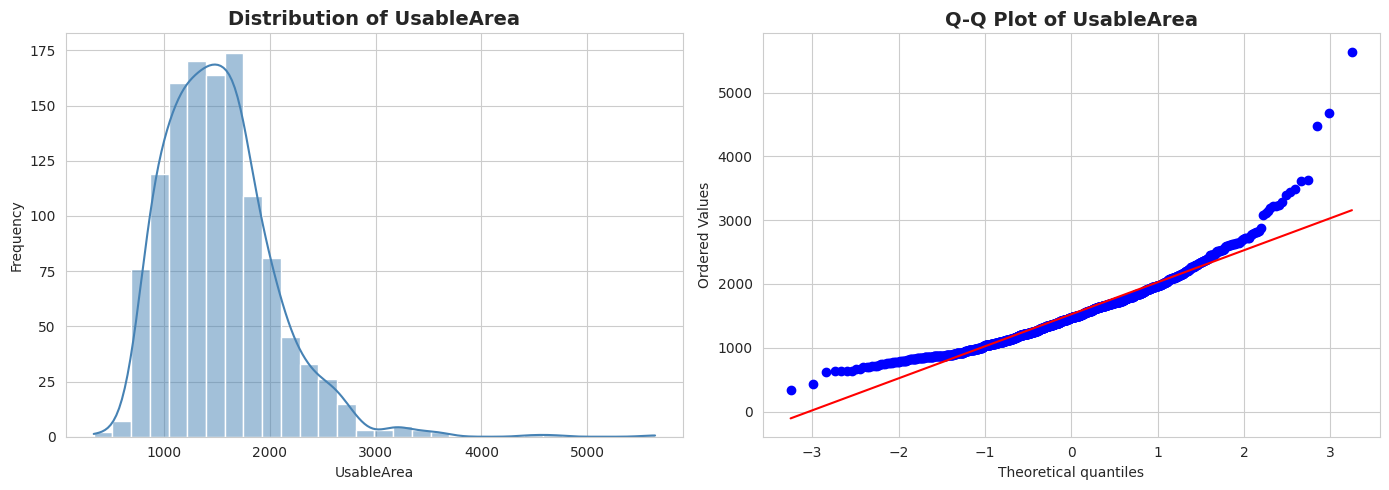

UsableArea - Skewness: 1.415, Kurtosis: 5.466
------------------------------------------------------------


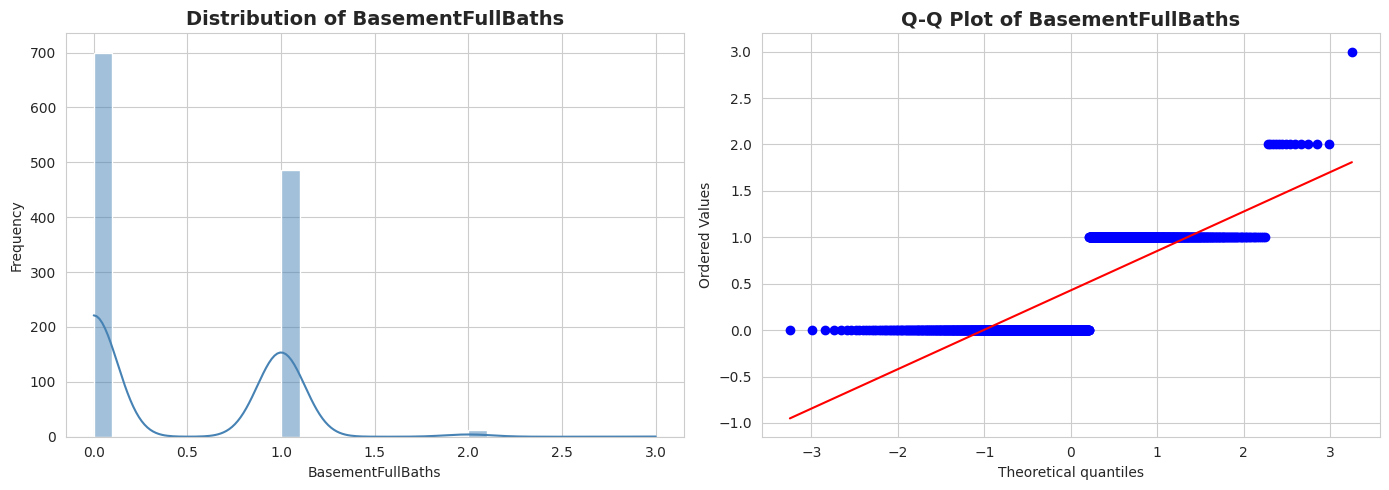

BasementFullBaths - Skewness: 0.604, Kurtosis: -0.760
------------------------------------------------------------


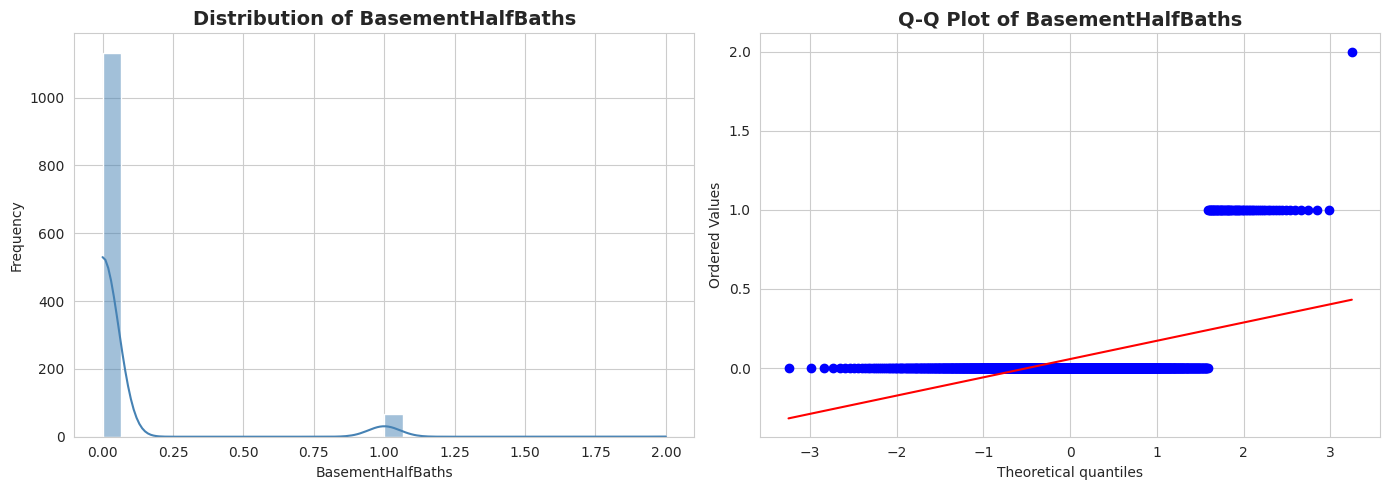

BasementHalfBaths - Skewness: 4.032, Kurtosis: 15.318
------------------------------------------------------------


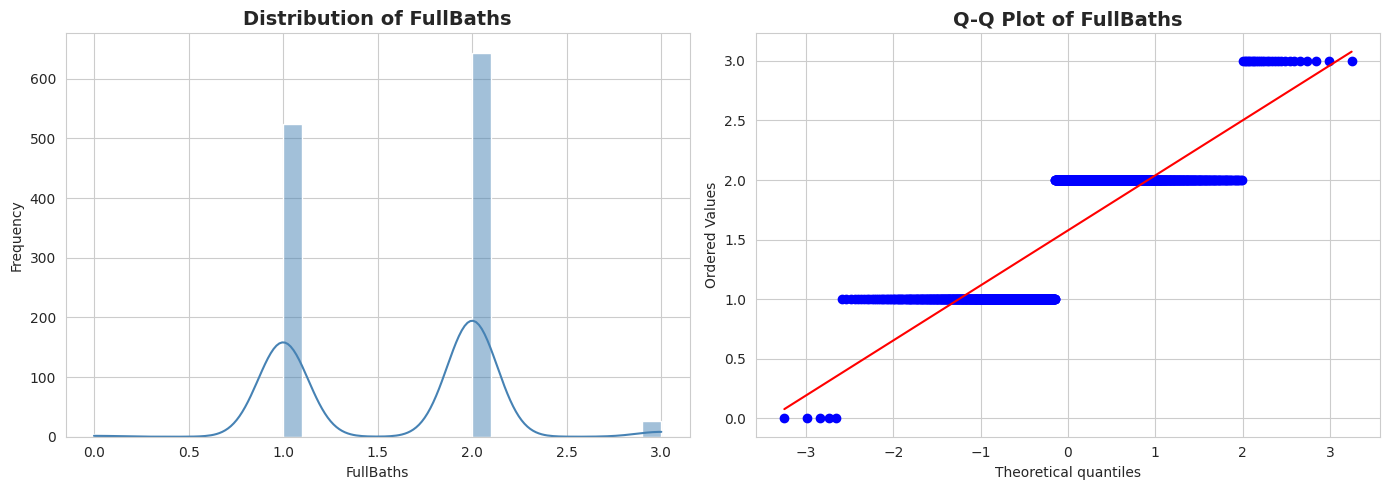

FullBaths - Skewness: 0.030, Kurtosis: -0.922
------------------------------------------------------------


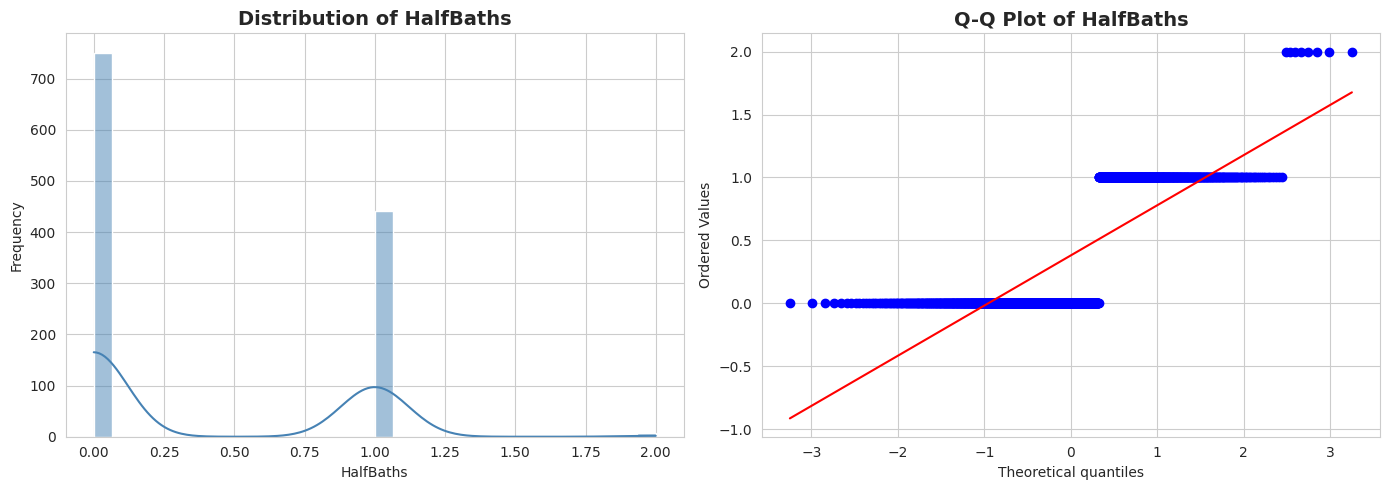

HalfBaths - Skewness: 0.652, Kurtosis: -1.179
------------------------------------------------------------


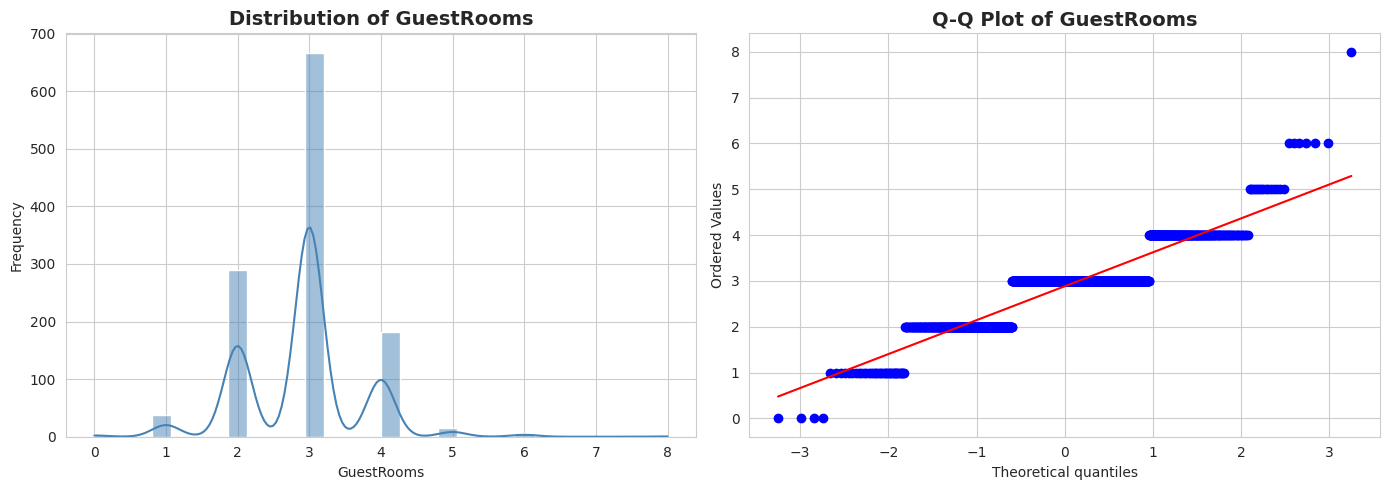

GuestRooms - Skewness: 0.274, Kurtosis: 2.495
------------------------------------------------------------


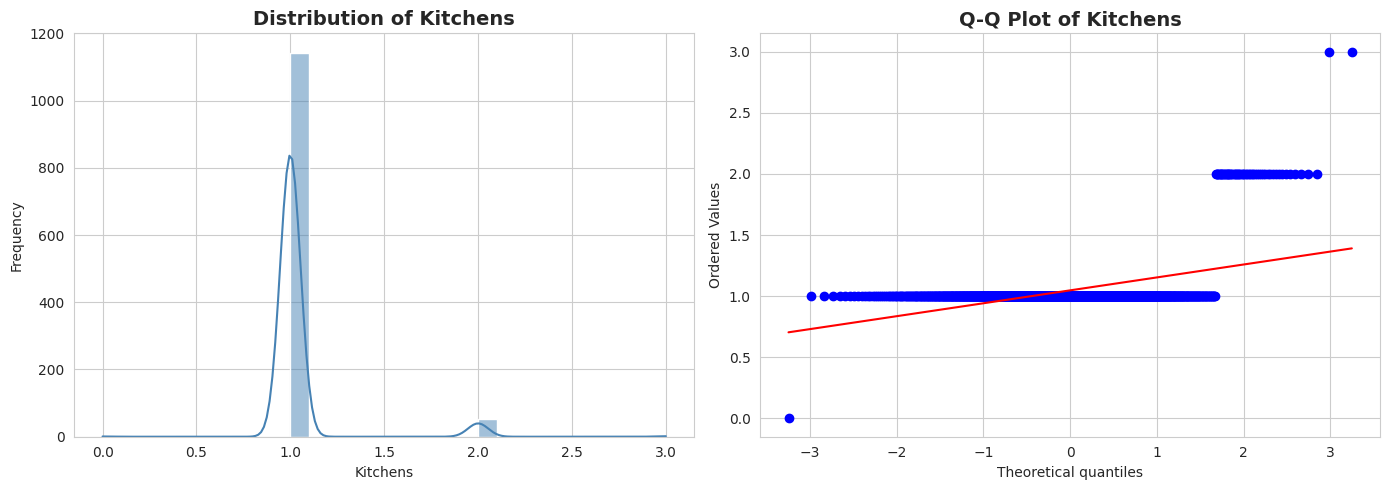

Kitchens - Skewness: 4.466, Kurtosis: 21.763
------------------------------------------------------------


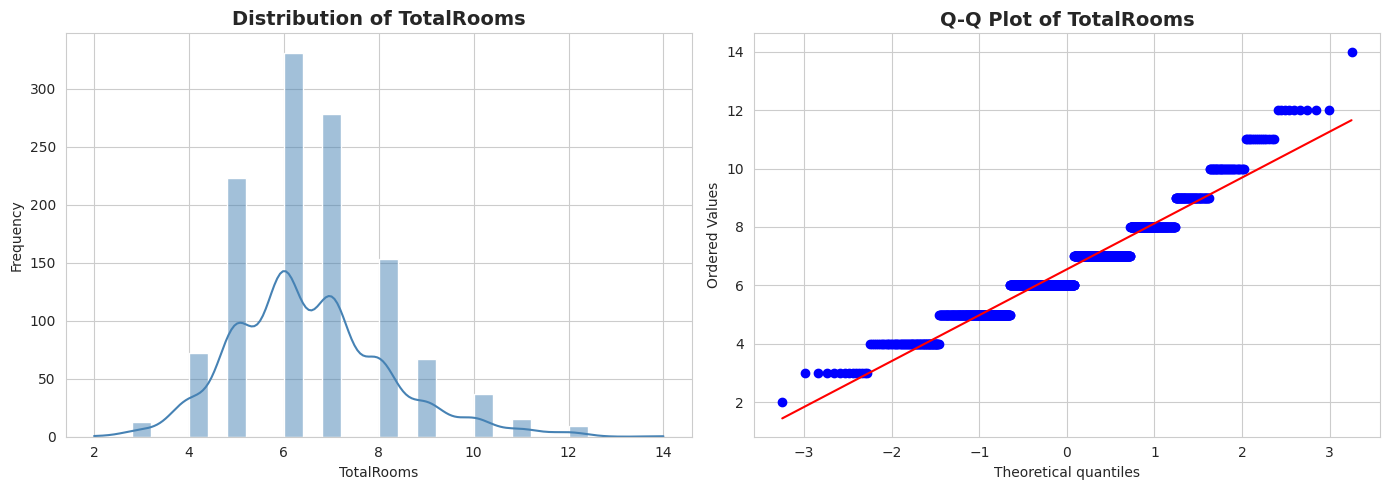

TotalRooms - Skewness: 0.680, Kurtosis: 0.943
------------------------------------------------------------


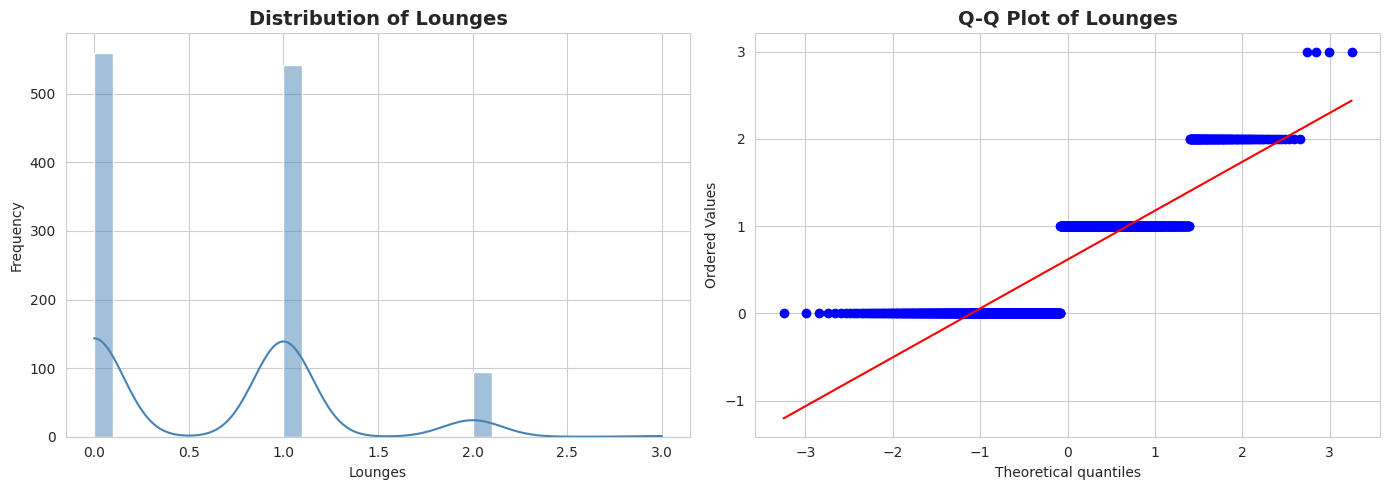

Lounges - Skewness: 0.629, Kurtosis: -0.233
------------------------------------------------------------


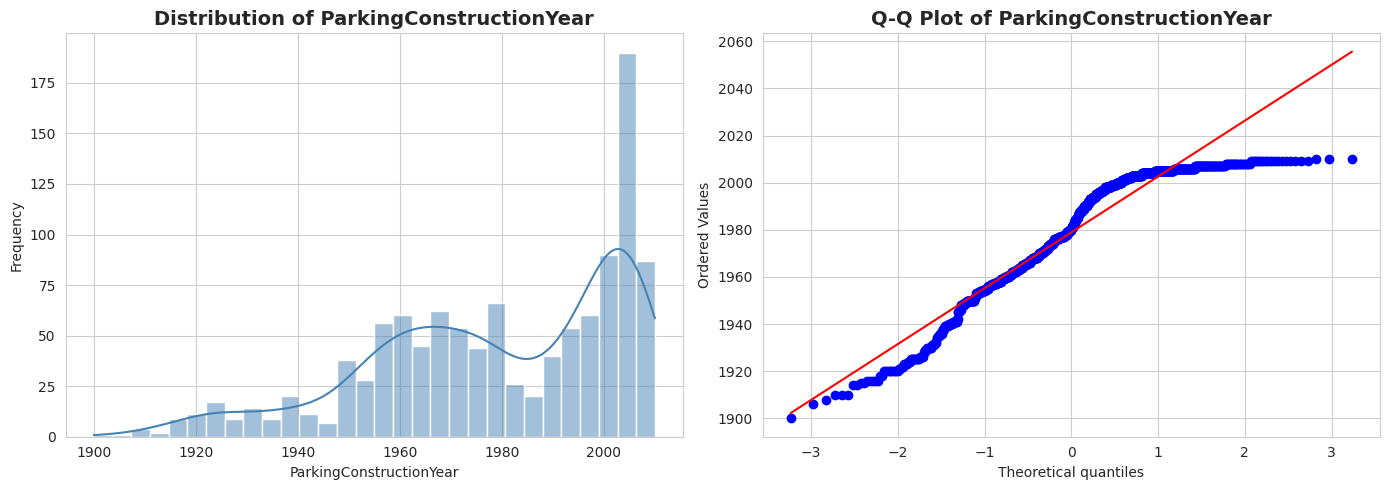

ParkingConstructionYear - Skewness: -0.681, Kurtosis: -0.351
------------------------------------------------------------


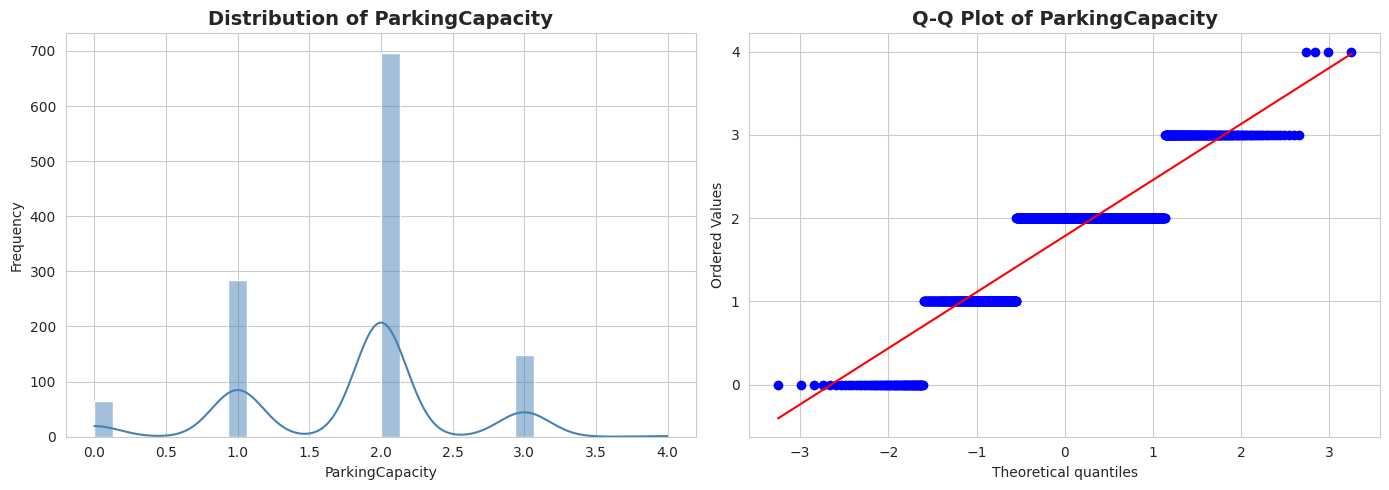

ParkingCapacity - Skewness: -0.393, Kurtosis: 0.341
------------------------------------------------------------


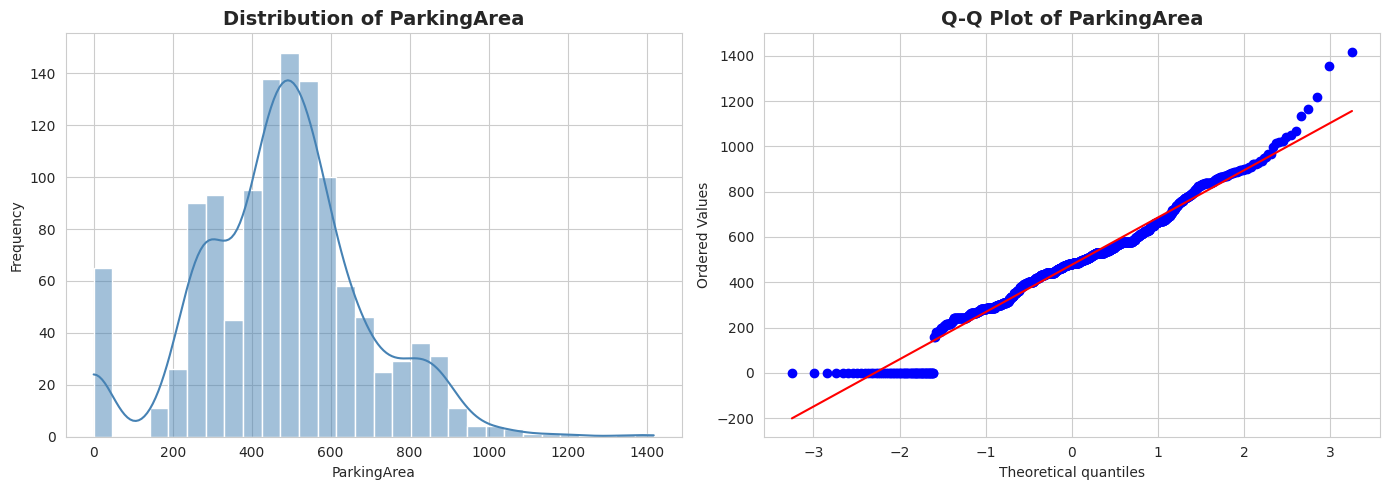

ParkingArea - Skewness: 0.105, Kurtosis: 0.853
------------------------------------------------------------


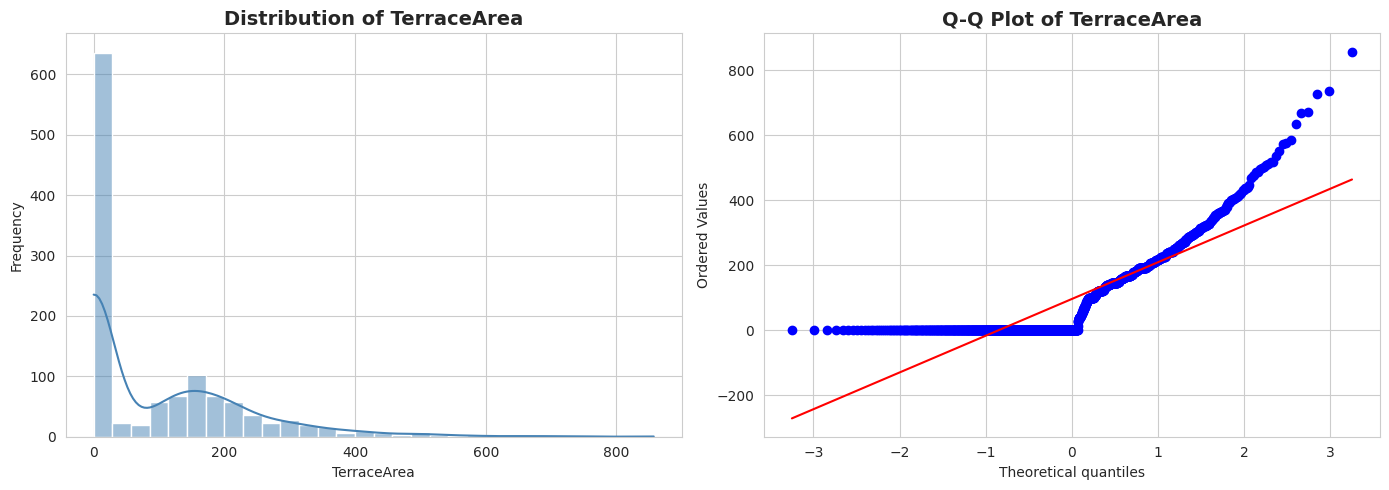

TerraceArea - Skewness: 1.574, Kurtosis: 3.075
------------------------------------------------------------


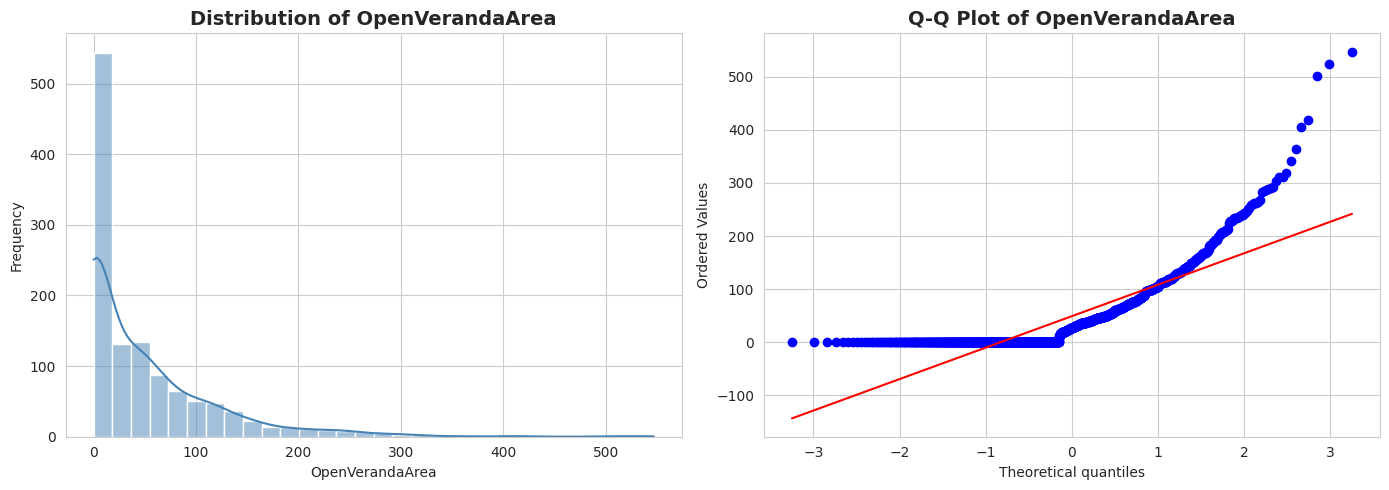

OpenVerandaArea - Skewness: 2.333, Kurtosis: 8.148
------------------------------------------------------------


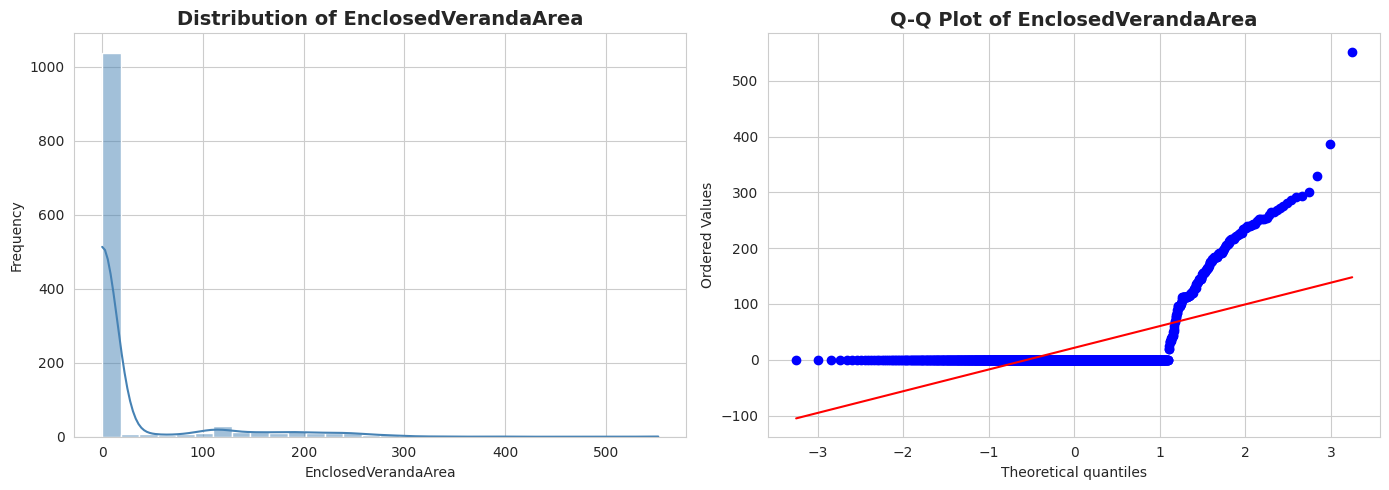

EnclosedVerandaArea - Skewness: 3.203, Kurtosis: 11.354
------------------------------------------------------------


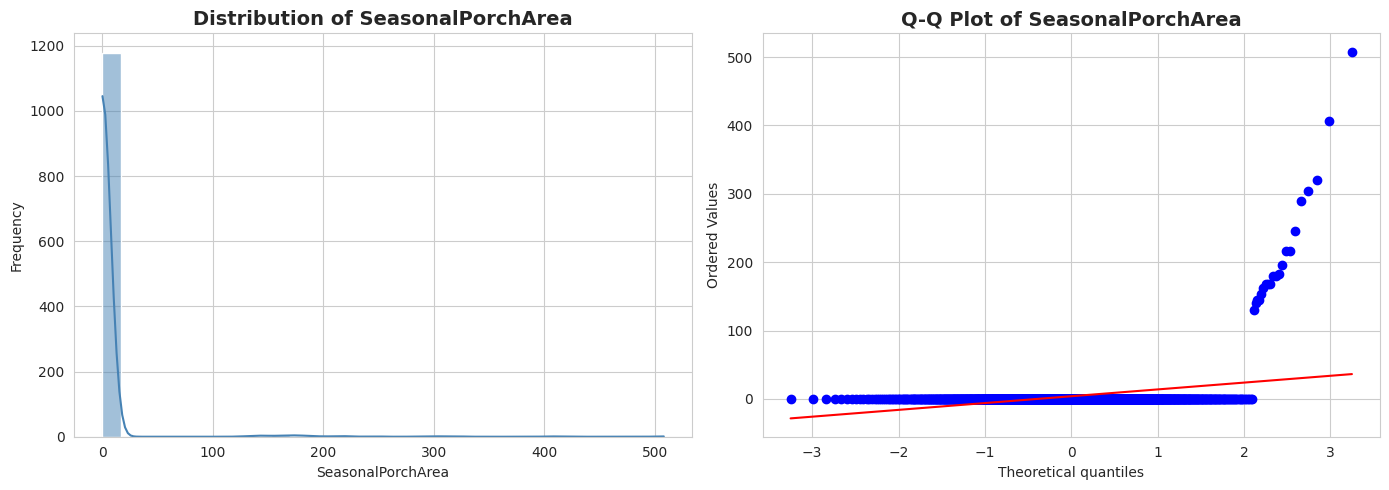

SeasonalPorchArea - Skewness: 9.739, Kurtosis: 110.112
------------------------------------------------------------


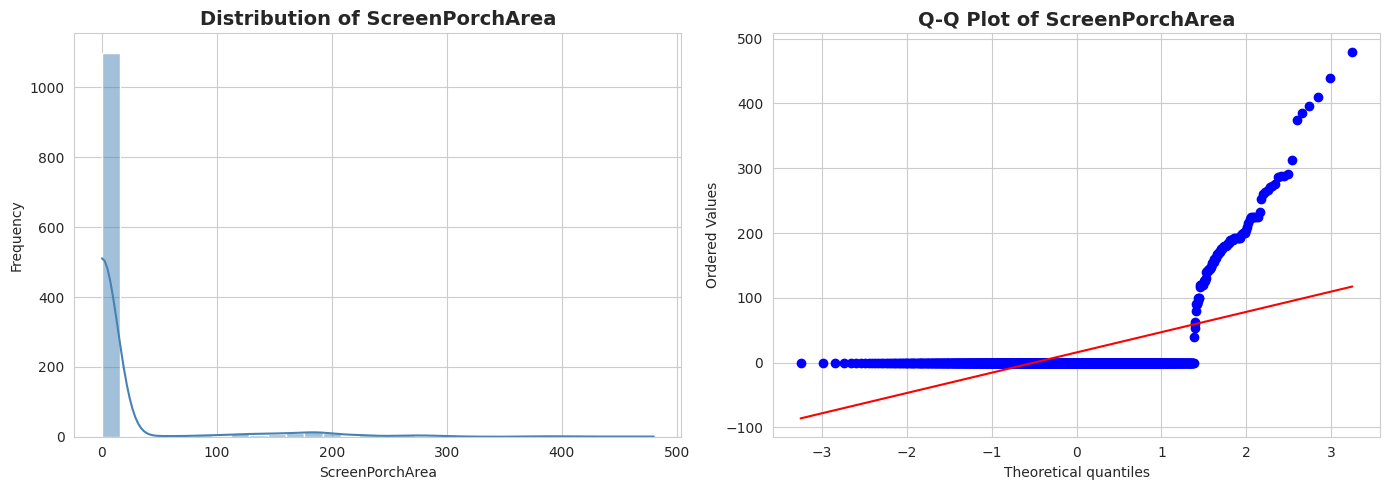

ScreenPorchArea - Skewness: 4.116, Kurtosis: 18.644
------------------------------------------------------------


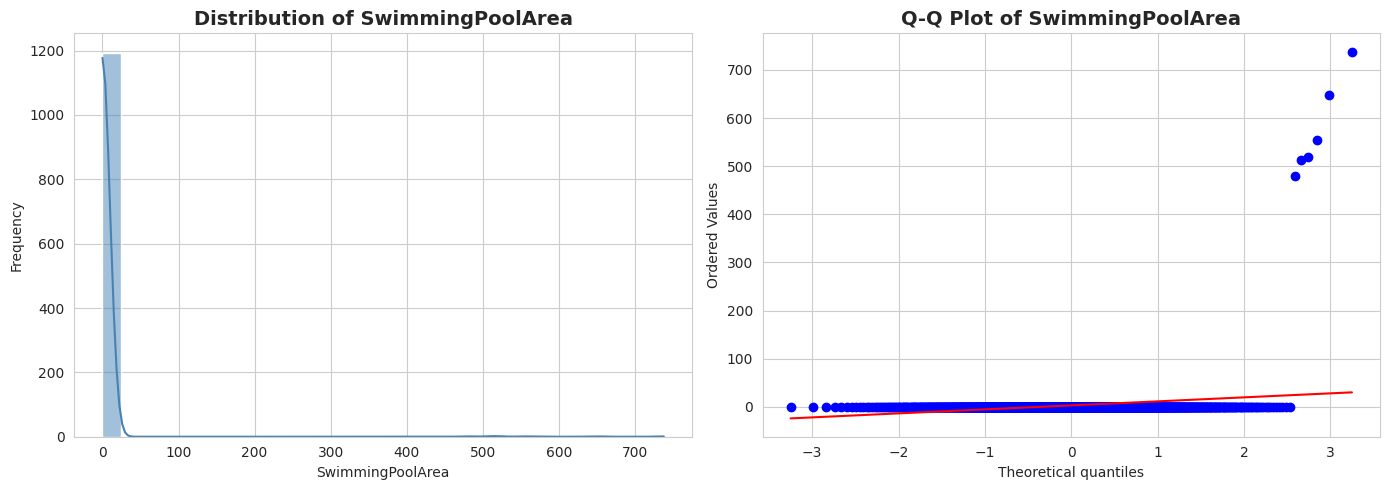

SwimmingPoolArea - Skewness: 14.594, Kurtosis: 216.942
------------------------------------------------------------


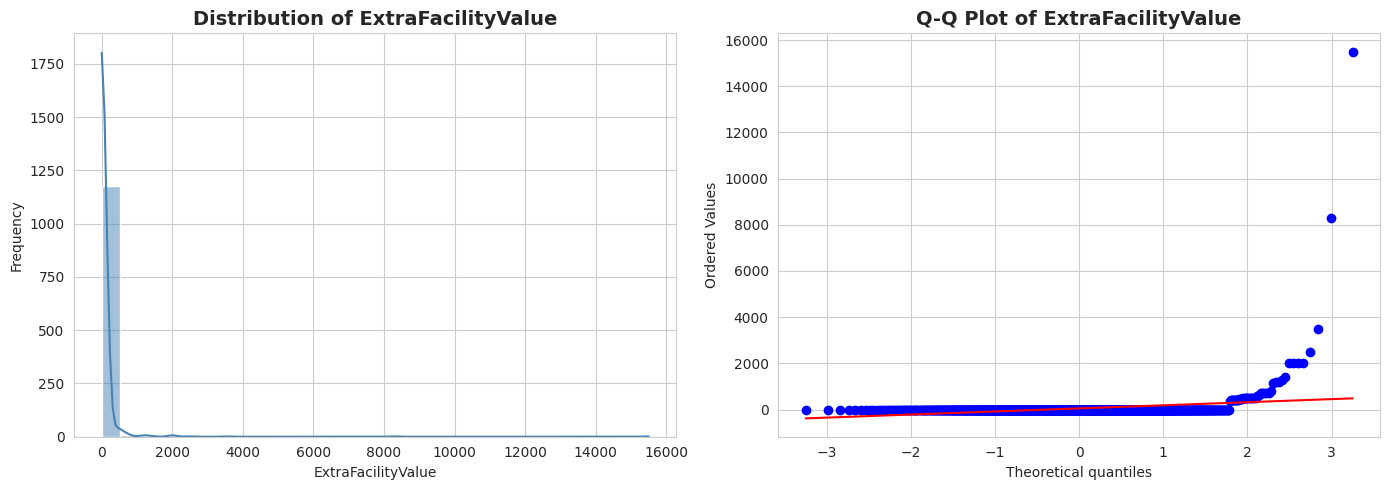

ExtraFacilityValue - Skewness: 22.353, Kurtosis: 581.845
------------------------------------------------------------


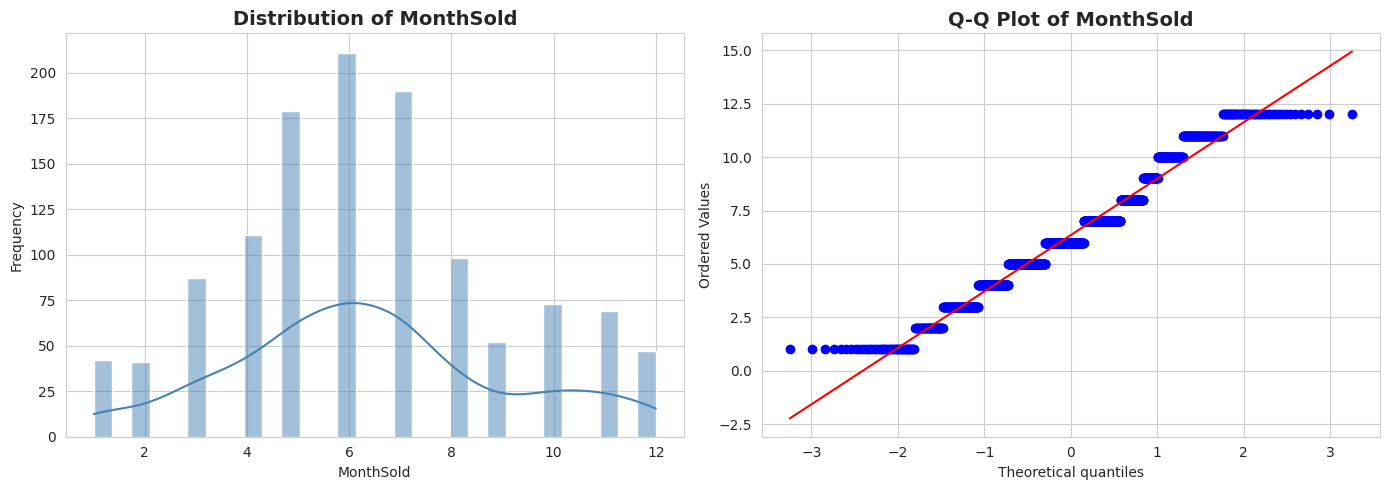

MonthSold - Skewness: 0.233, Kurtosis: -0.392
------------------------------------------------------------


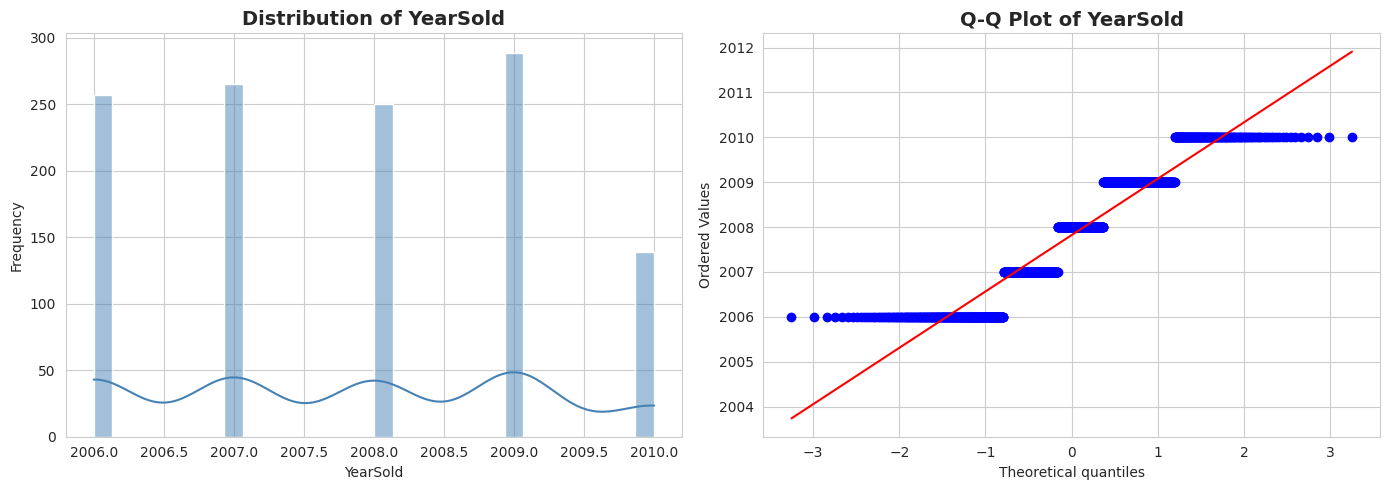

YearSold - Skewness: 0.072, Kurtosis: -1.195
------------------------------------------------------------


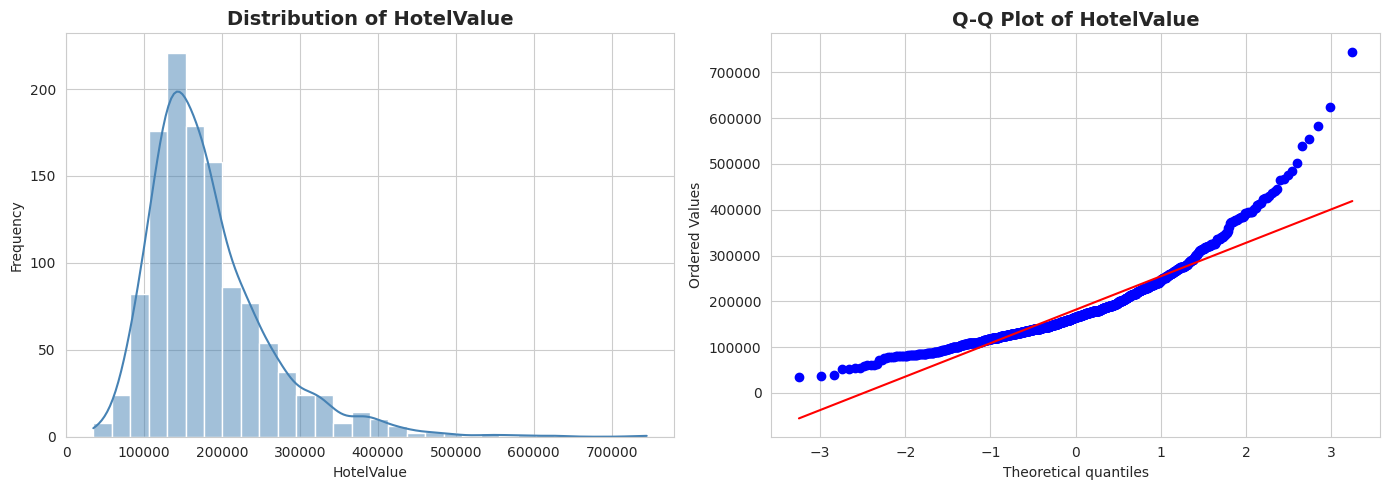

HotelValue - Skewness: 1.726, Kurtosis: 5.293
------------------------------------------------------------


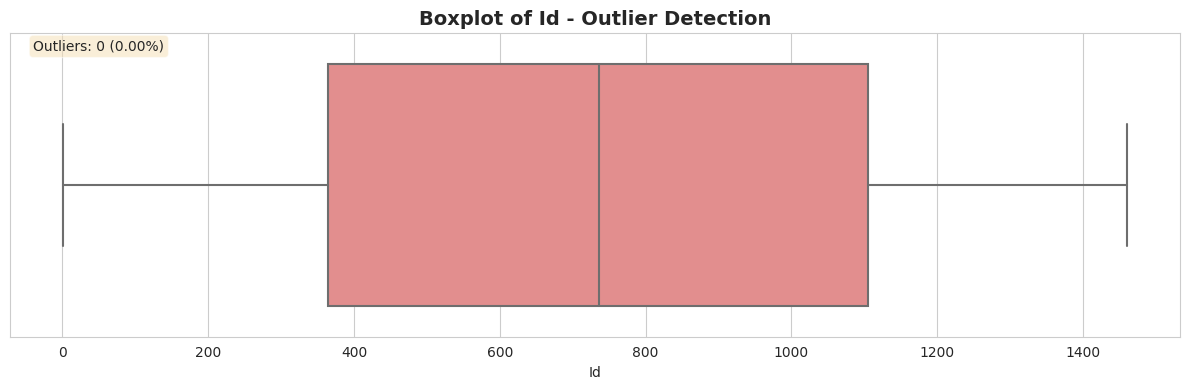

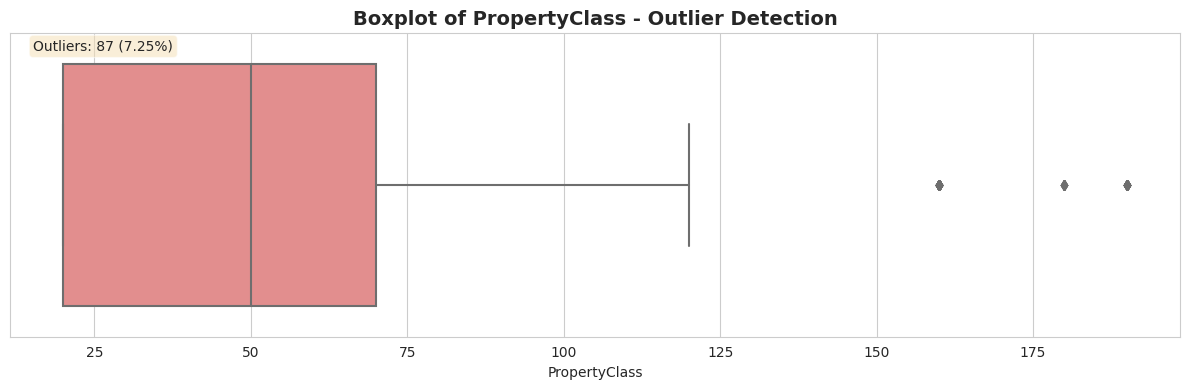

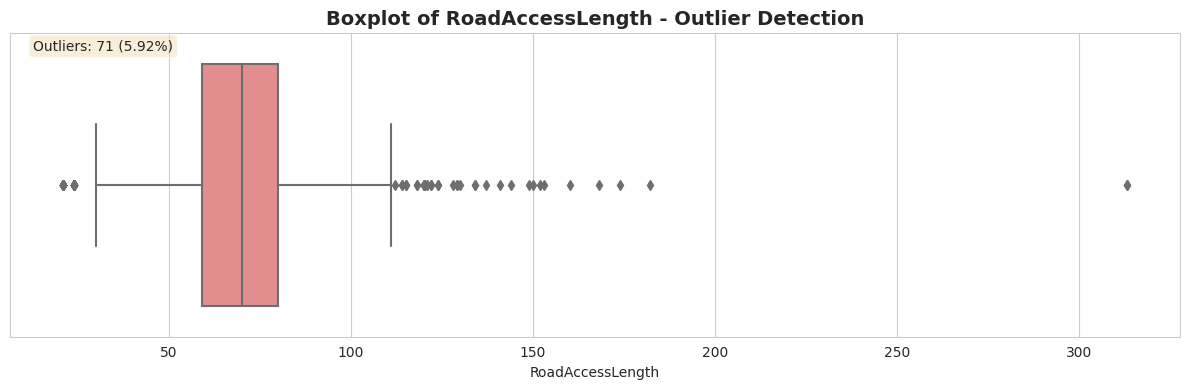

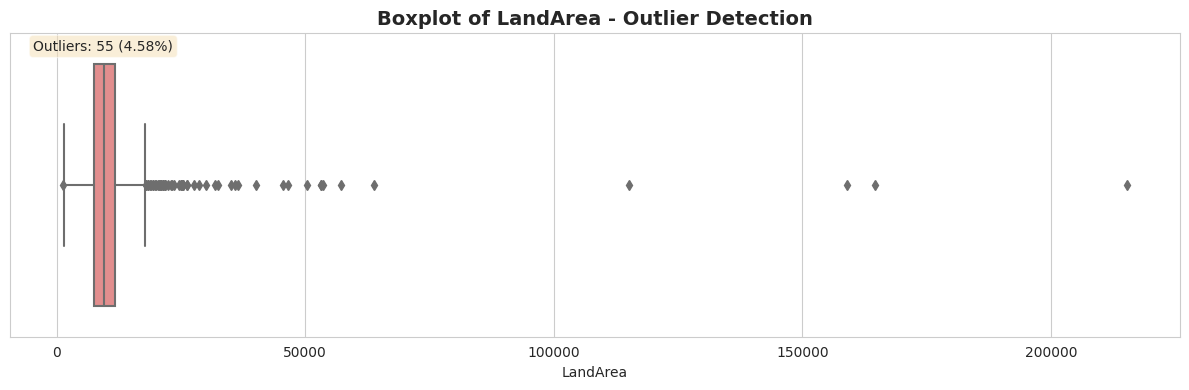

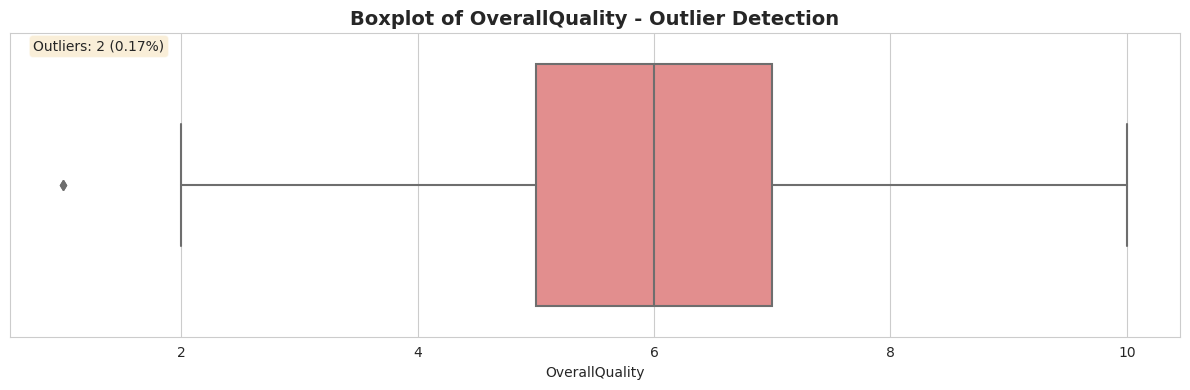

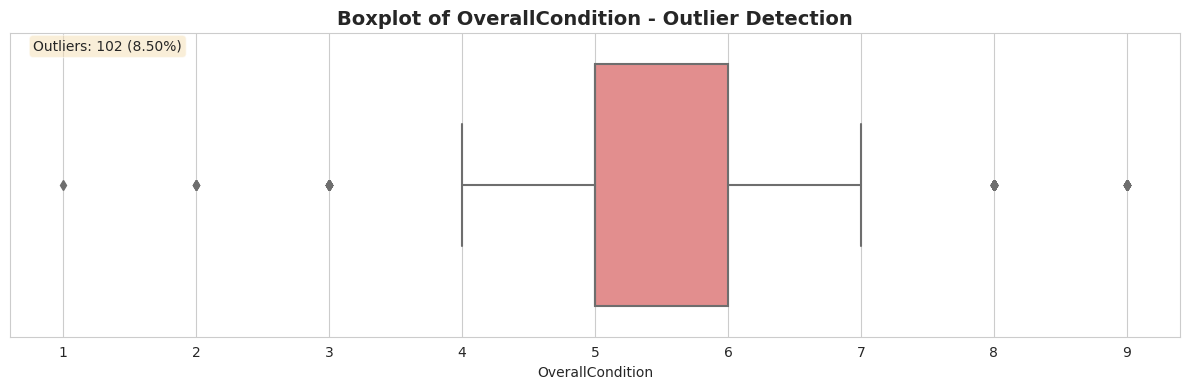

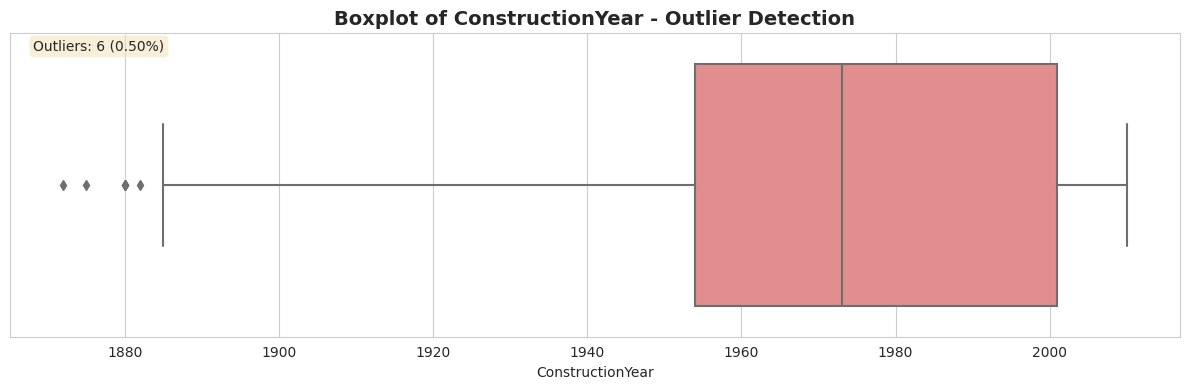

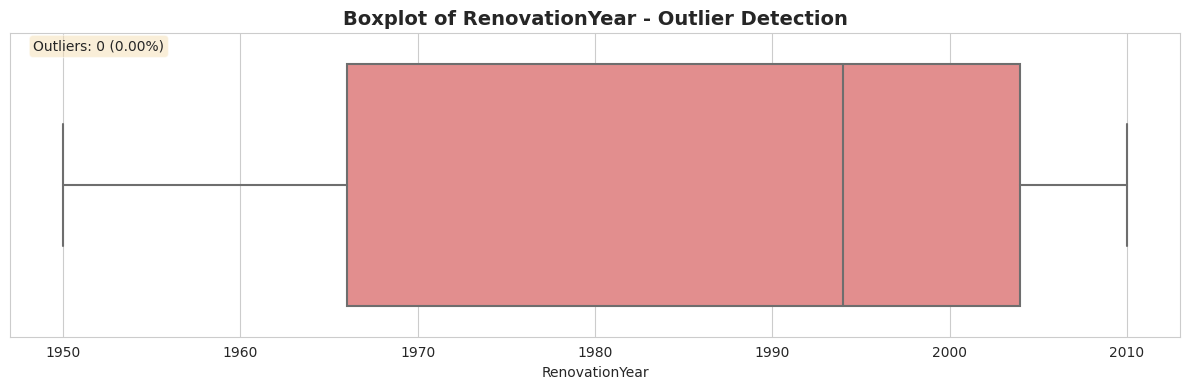

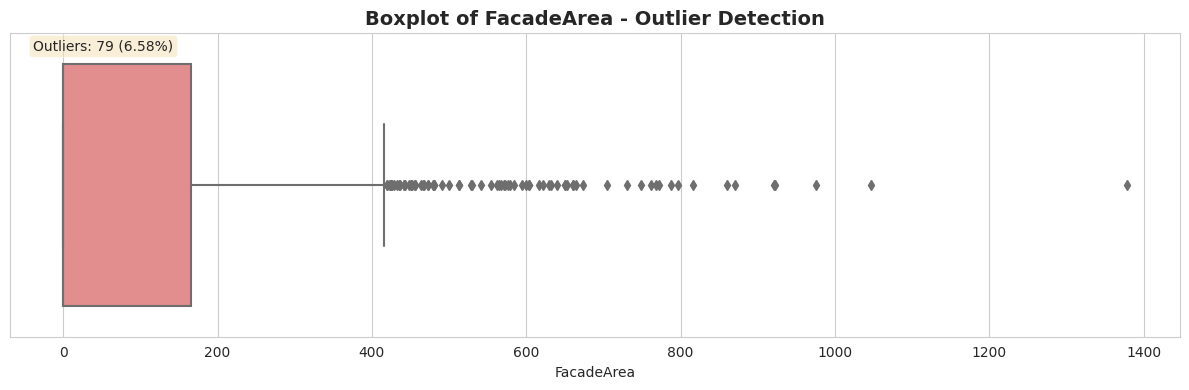

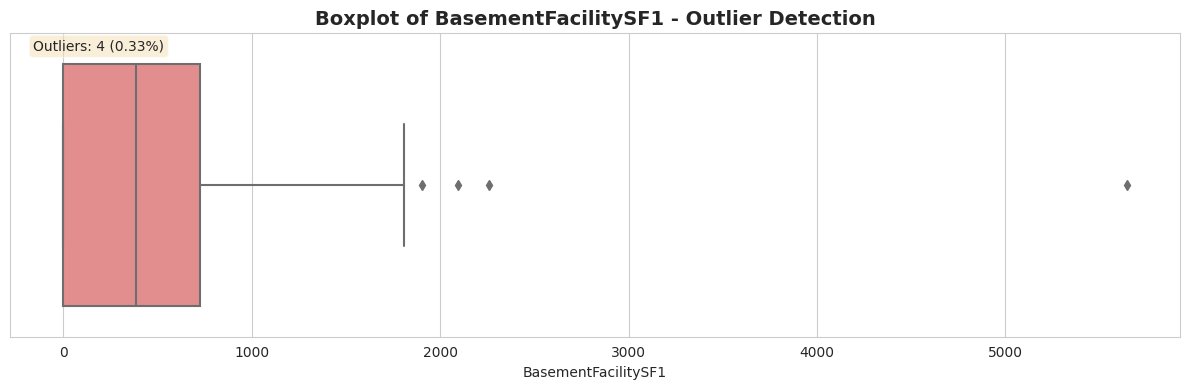

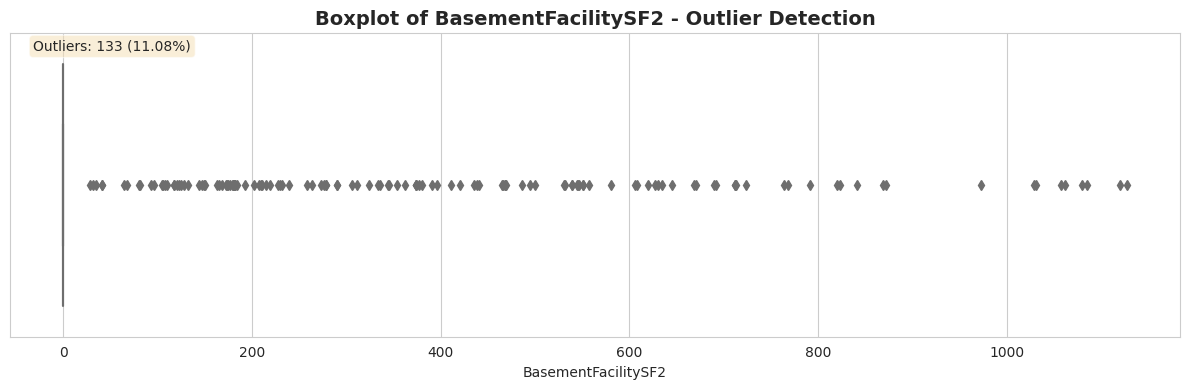

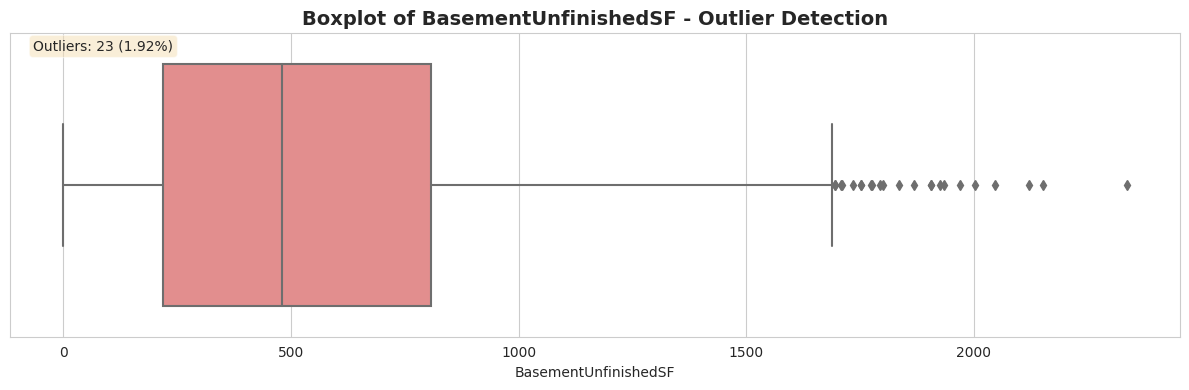

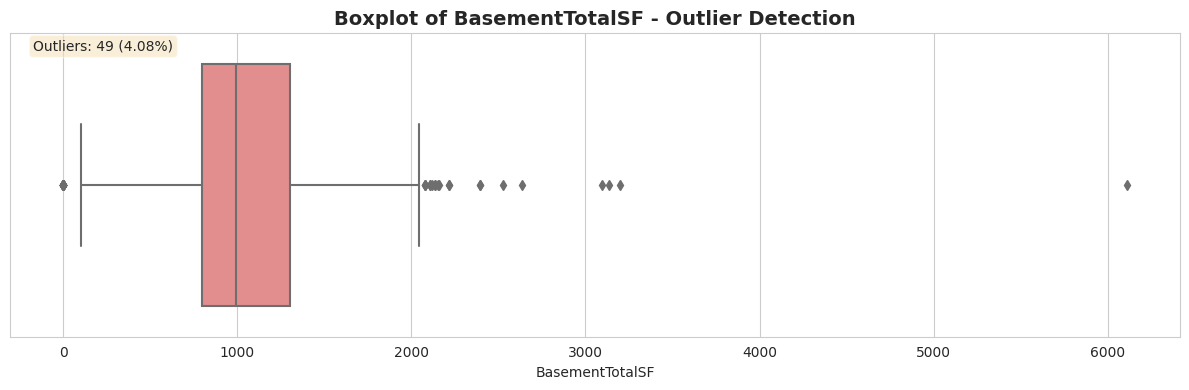

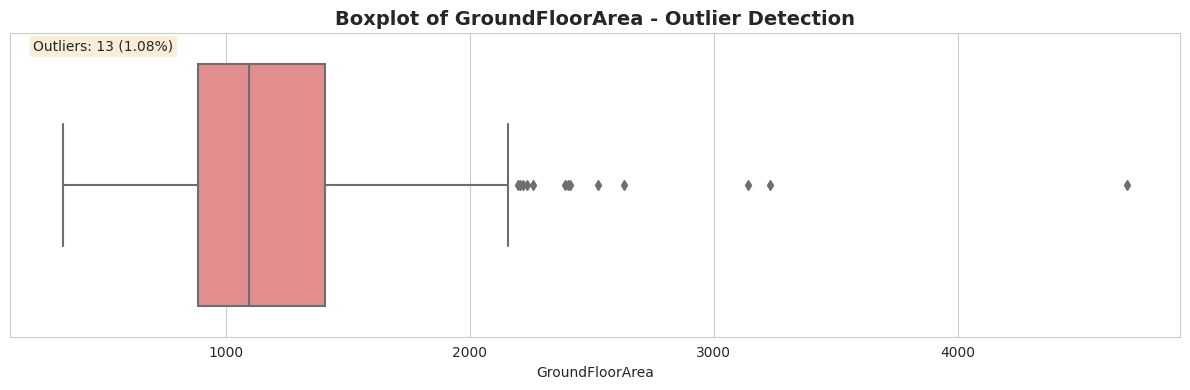

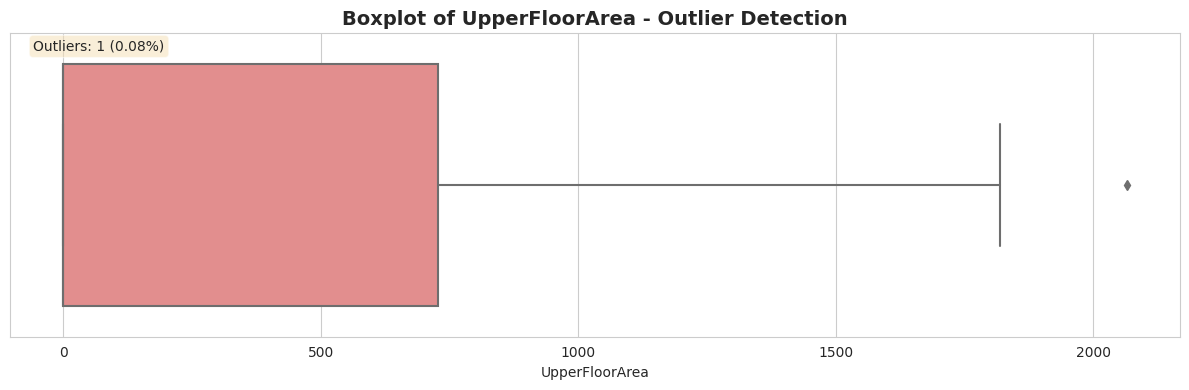

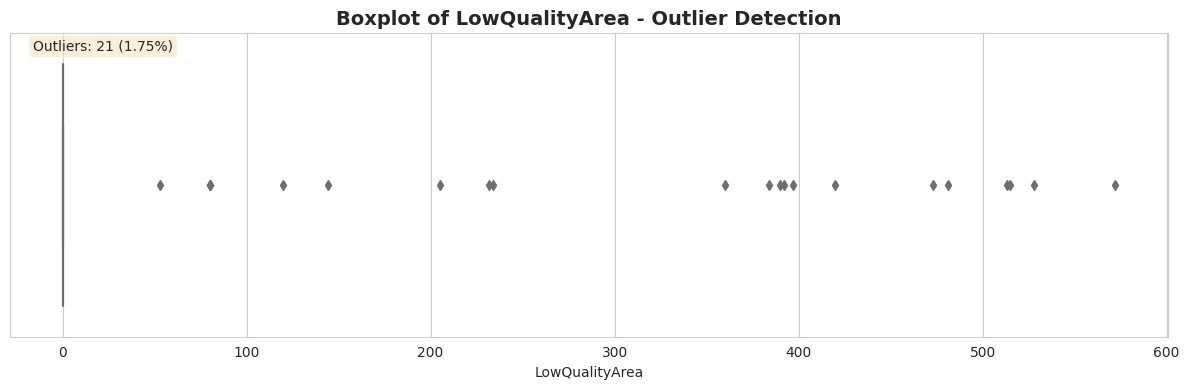

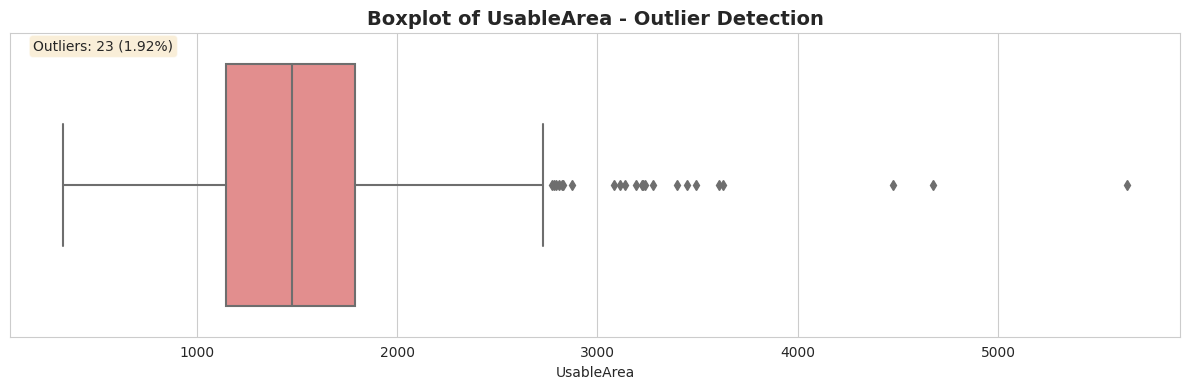

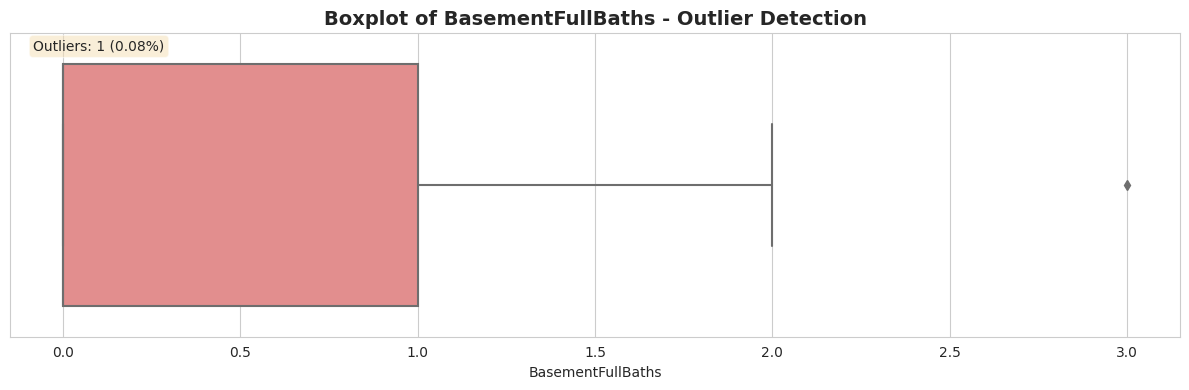

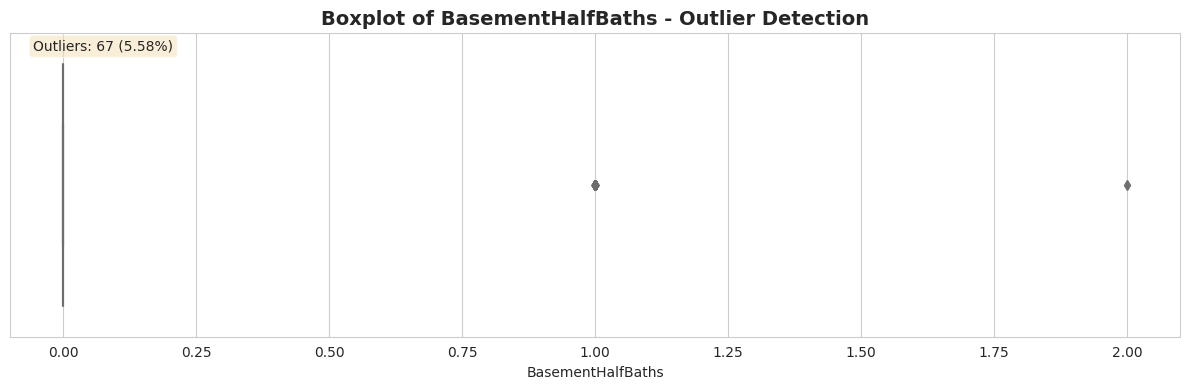

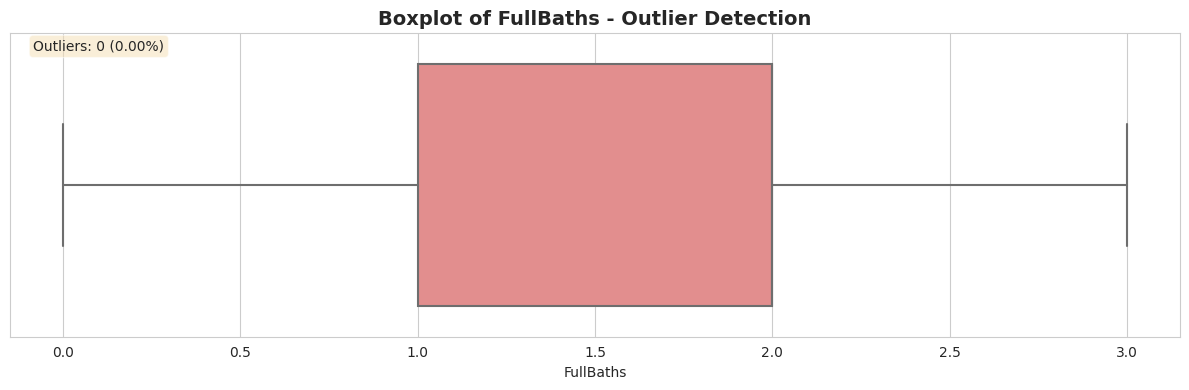

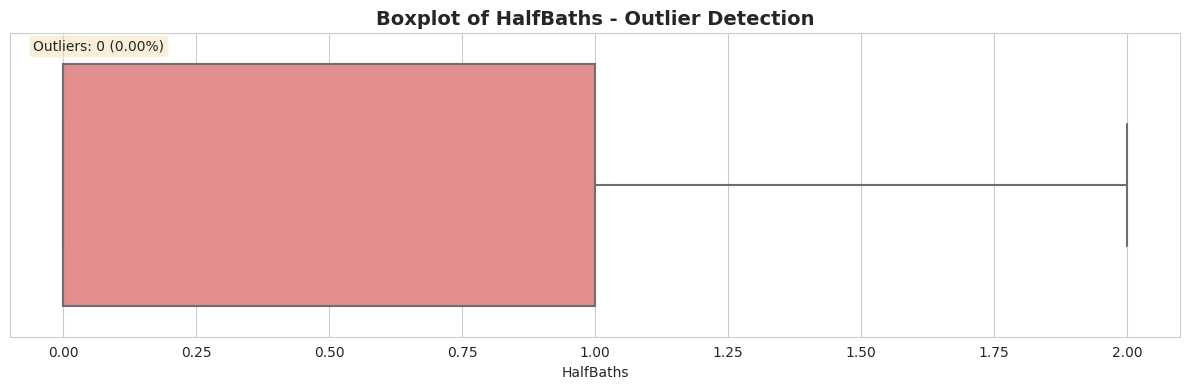

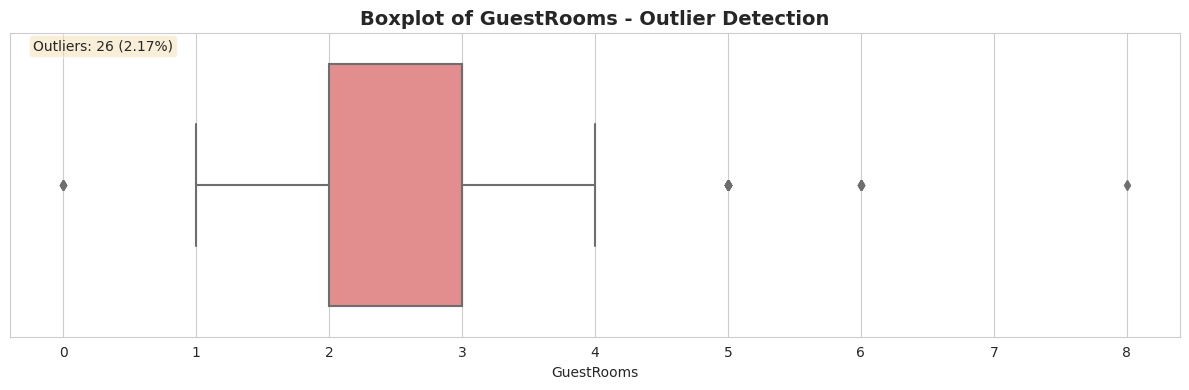

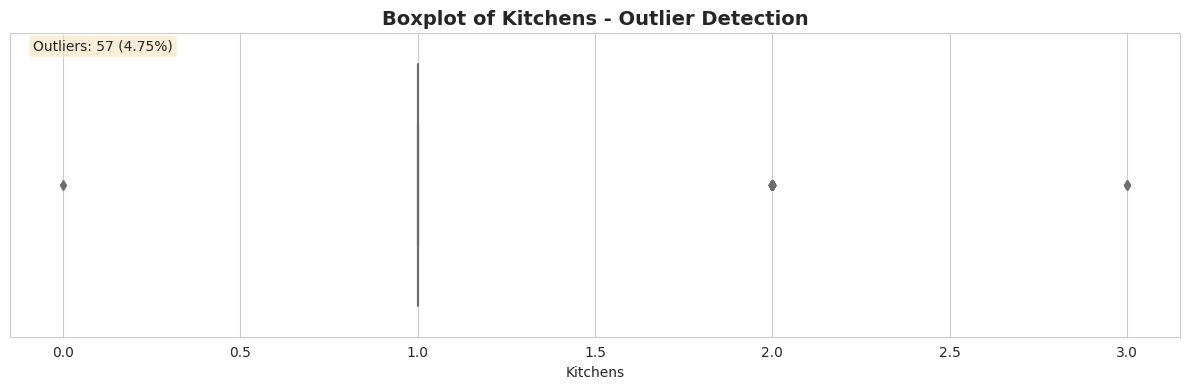

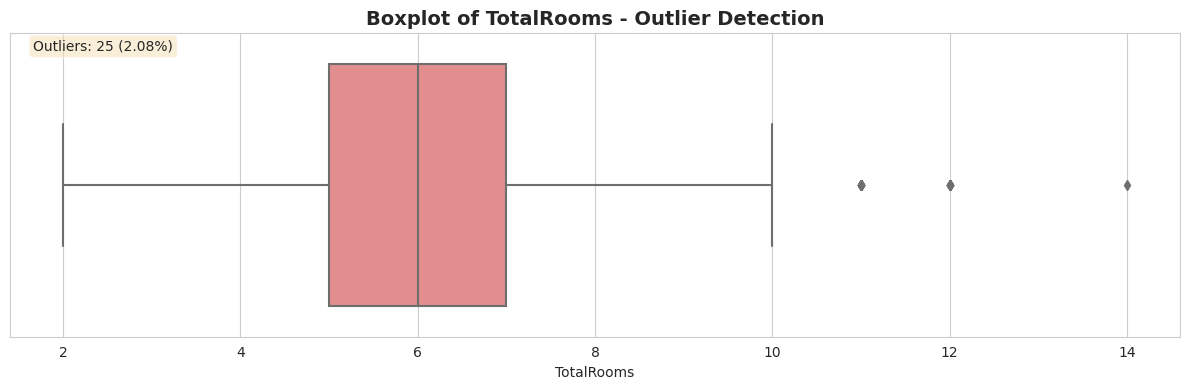

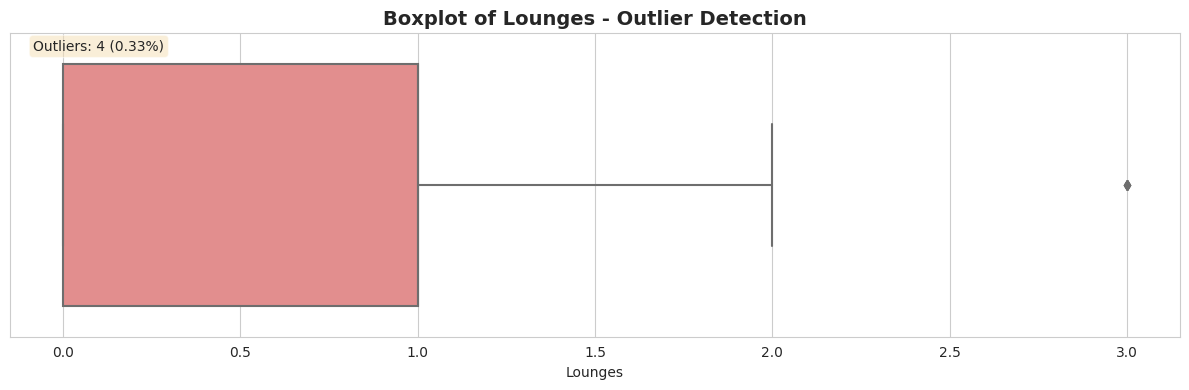

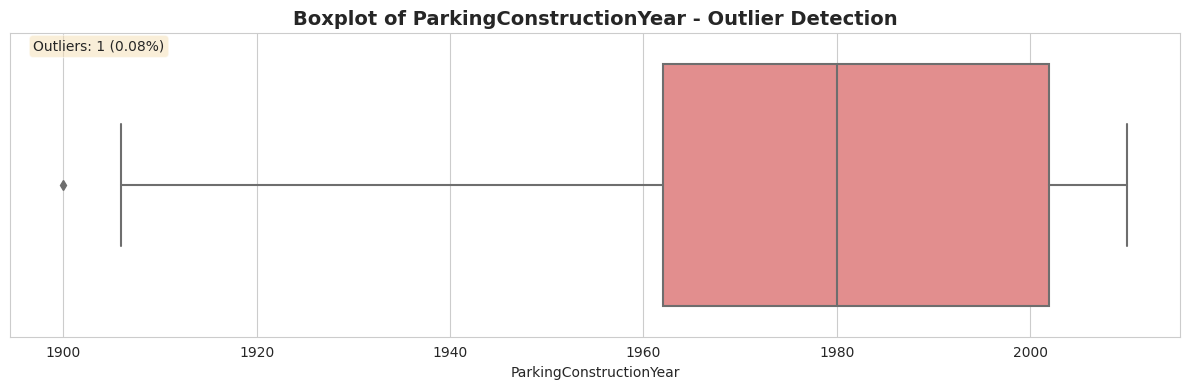

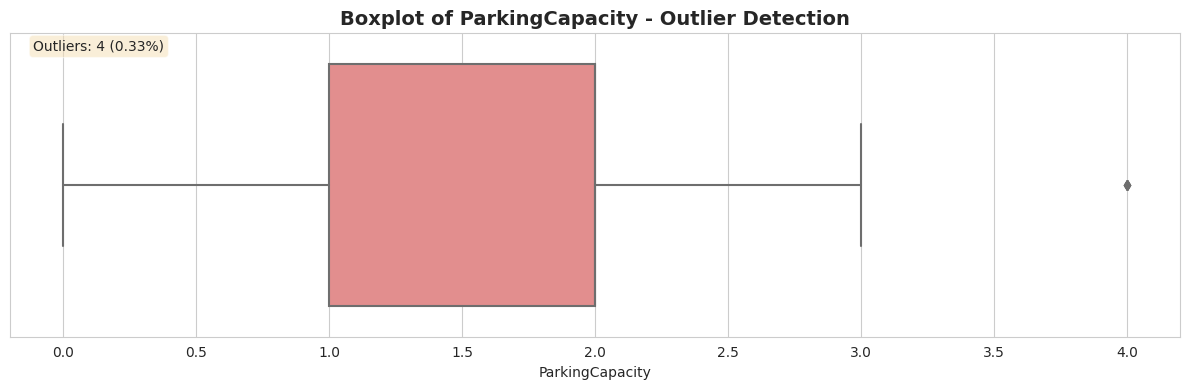

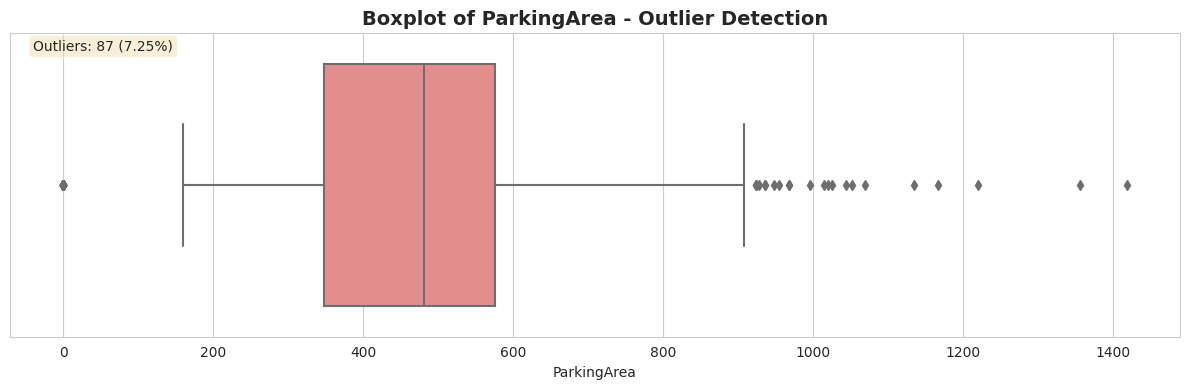

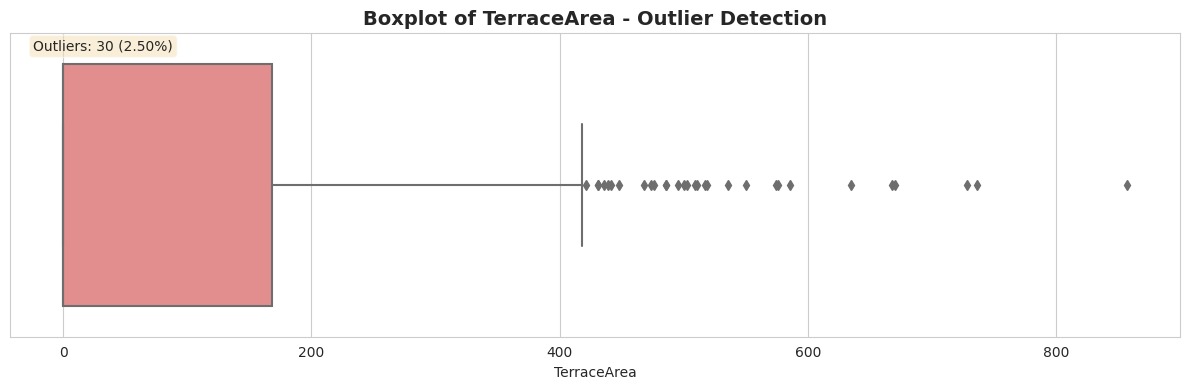

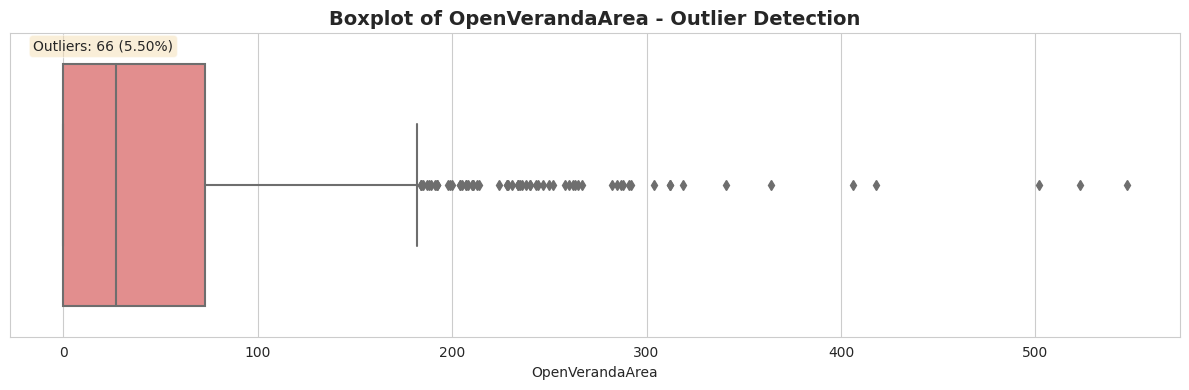

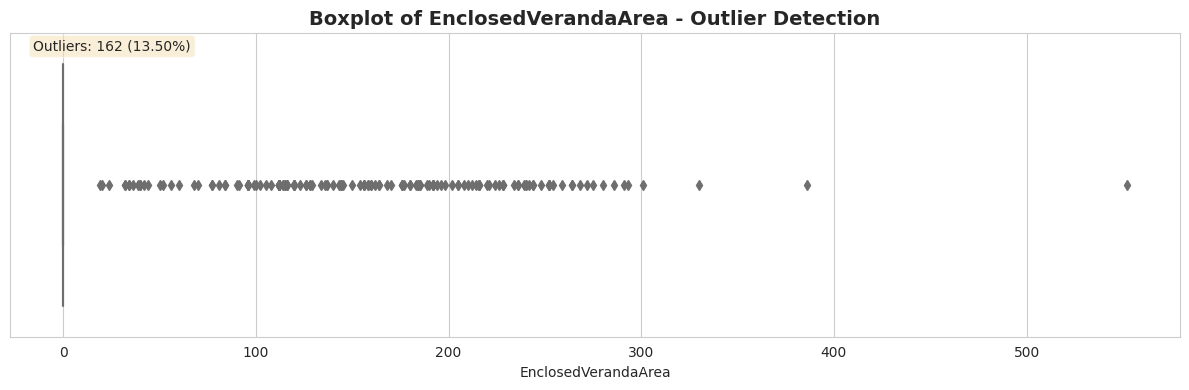

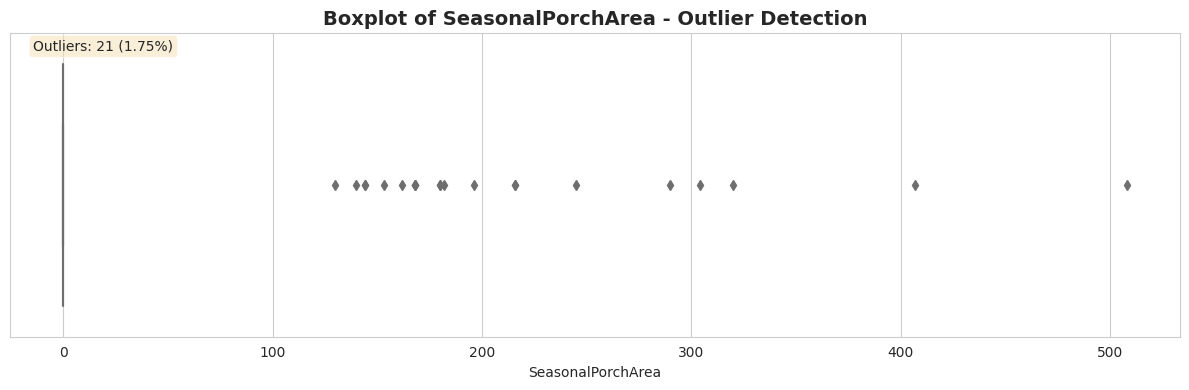

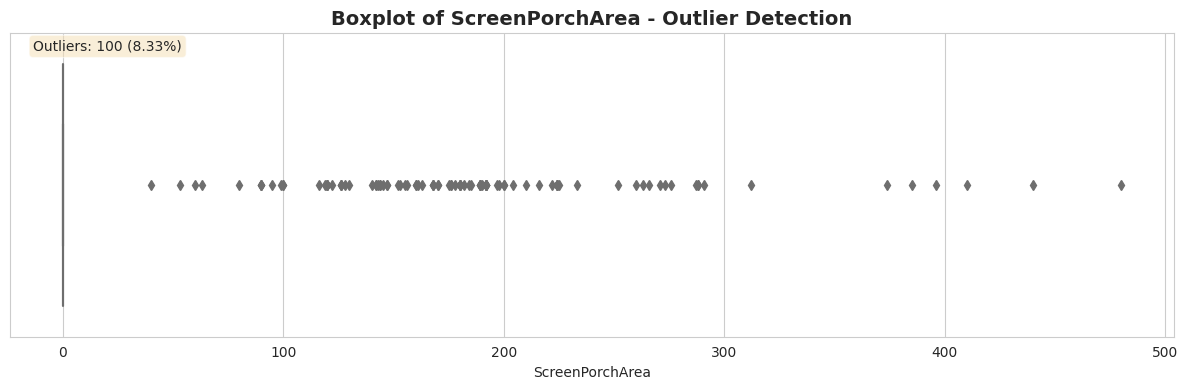

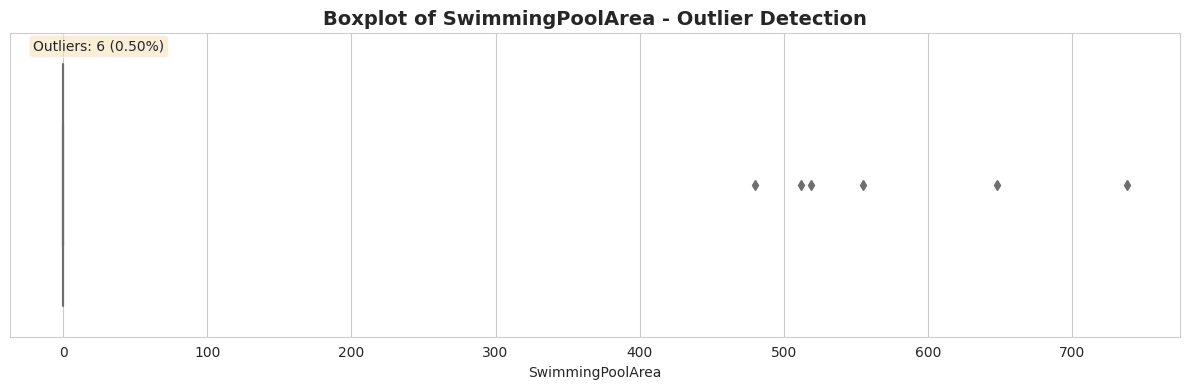

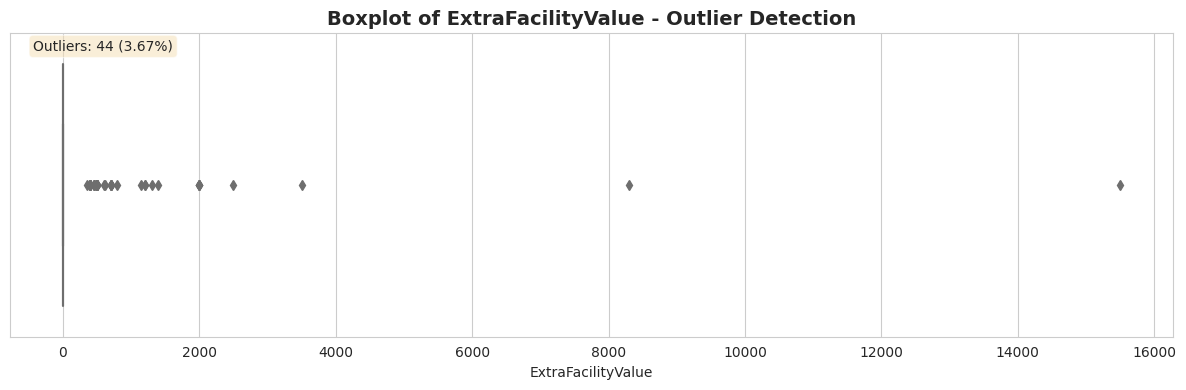

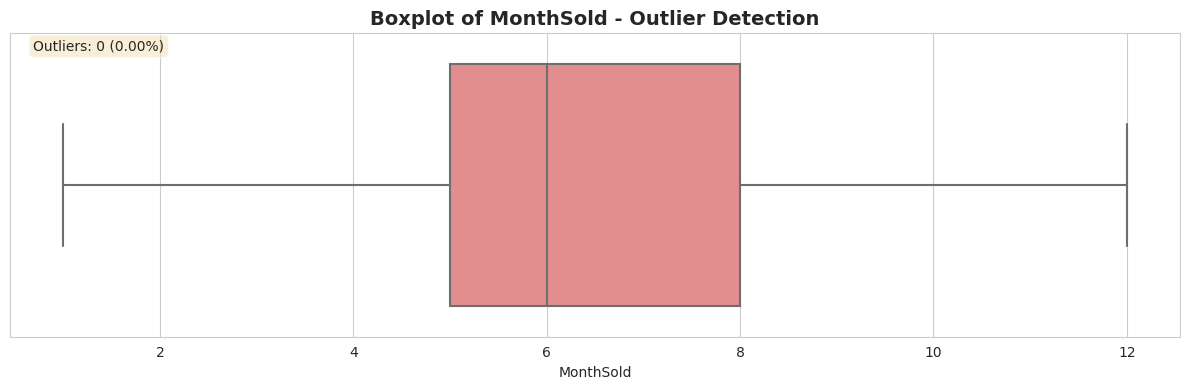

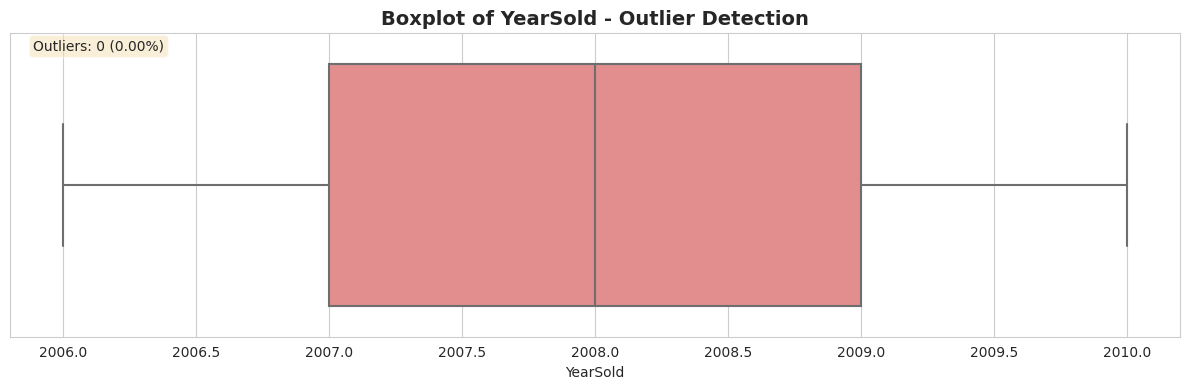

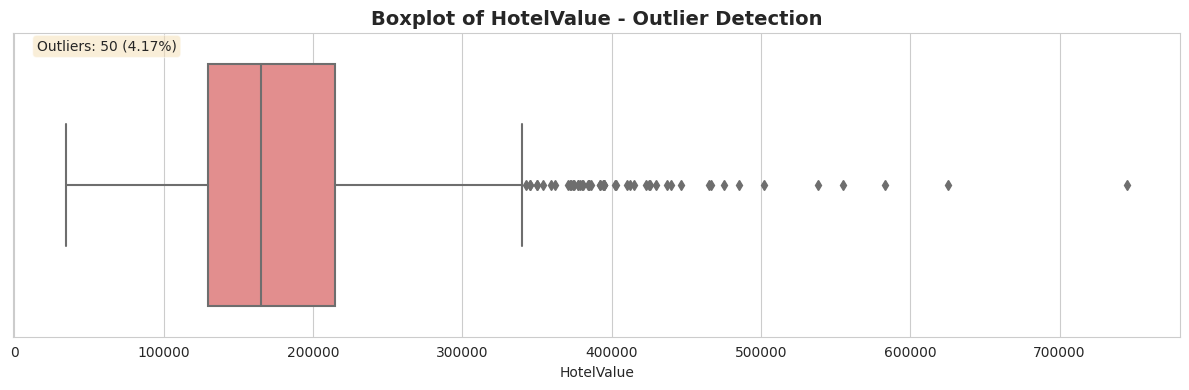

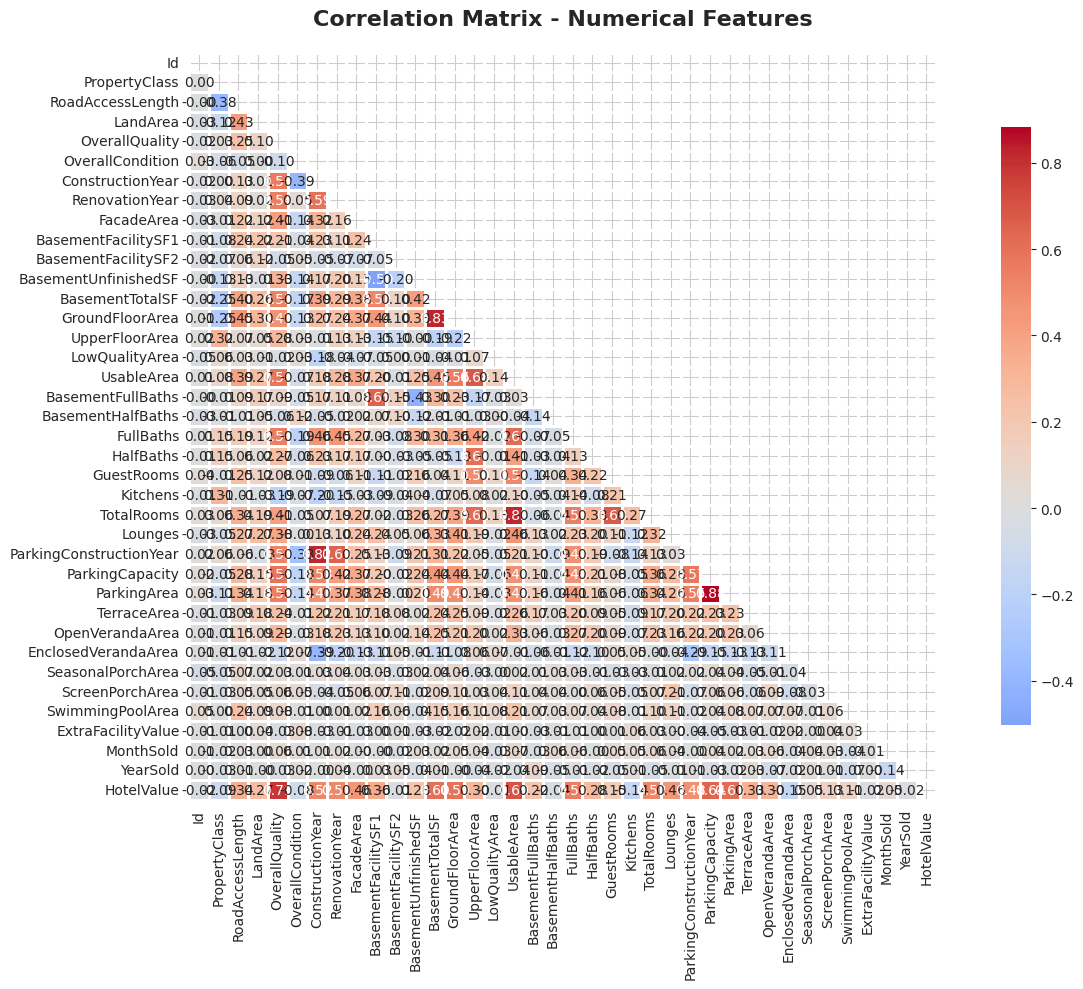


Highly Correlated Features (|correlation| > 0.7):
       Feature 1               Feature 2  Correlation
  OverallQuality              HotelValue     0.787901
ConstructionYear ParkingConstructionYear     0.821432
 BasementTotalSF         GroundFloorArea     0.828736
      UsableArea              TotalRooms     0.819797
 ParkingCapacity             ParkingArea     0.881422


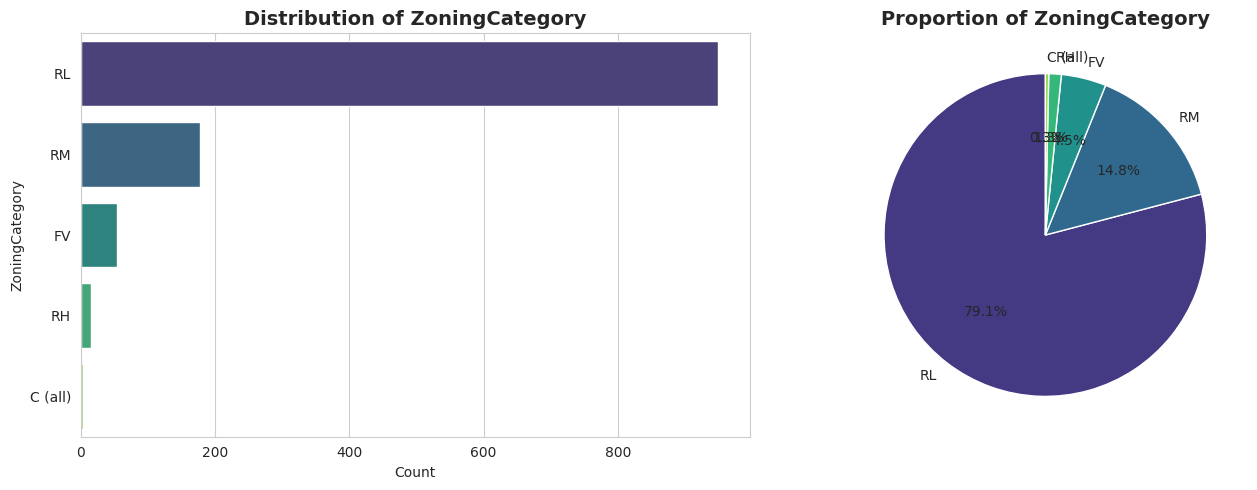


ZoningCategory - Unique values: 5
ZoningCategory
RL         949
RM         178
FV          54
RH          15
C (all)      4
Name: count, dtype: int64
------------------------------------------------------------


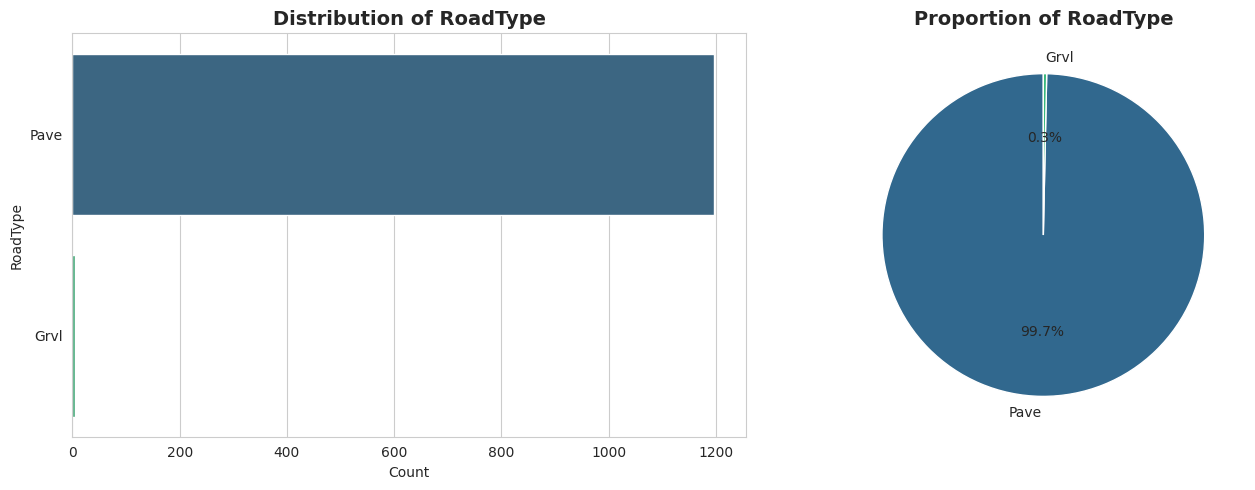


RoadType - Unique values: 2
RoadType
Pave    1196
Grvl       4
Name: count, dtype: int64
------------------------------------------------------------


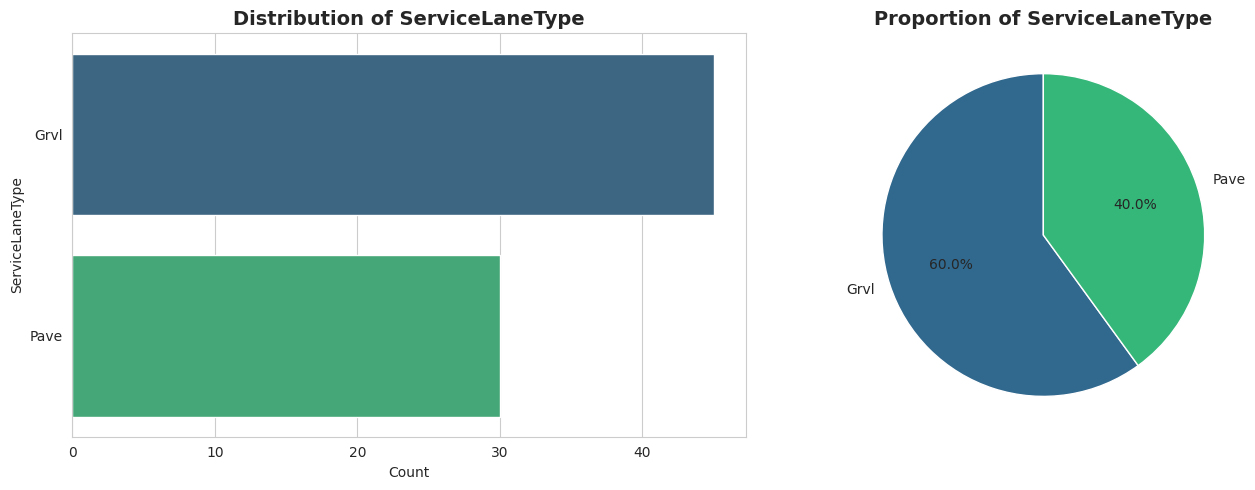


ServiceLaneType - Unique values: 2
ServiceLaneType
Grvl    45
Pave    30
Name: count, dtype: int64
------------------------------------------------------------


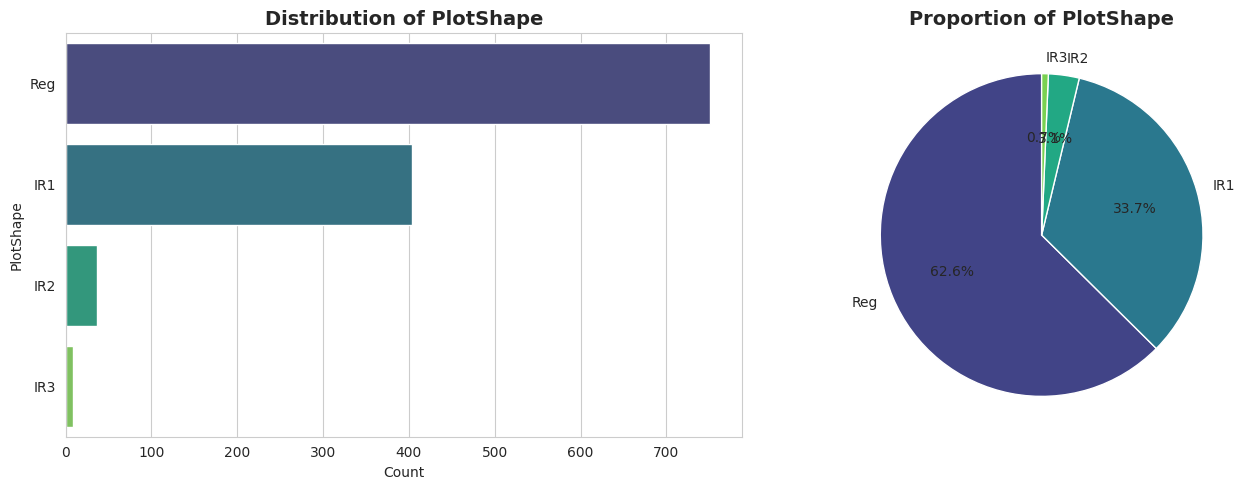


PlotShape - Unique values: 4
PlotShape
Reg    751
IR1    404
IR2     37
IR3      8
Name: count, dtype: int64
------------------------------------------------------------


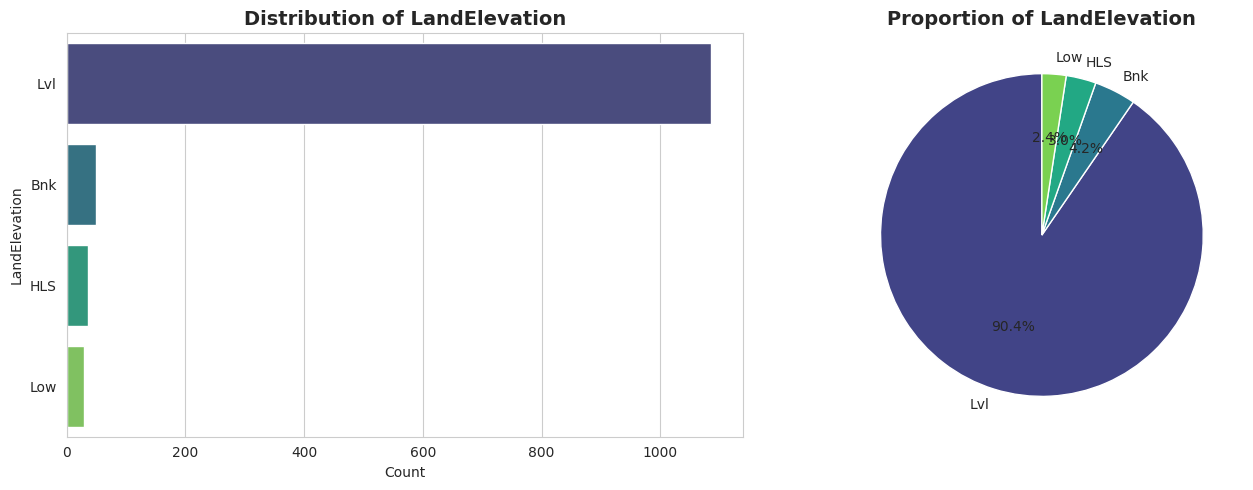


LandElevation - Unique values: 4
LandElevation
Lvl    1085
Bnk      50
HLS      36
Low      29
Name: count, dtype: int64
------------------------------------------------------------


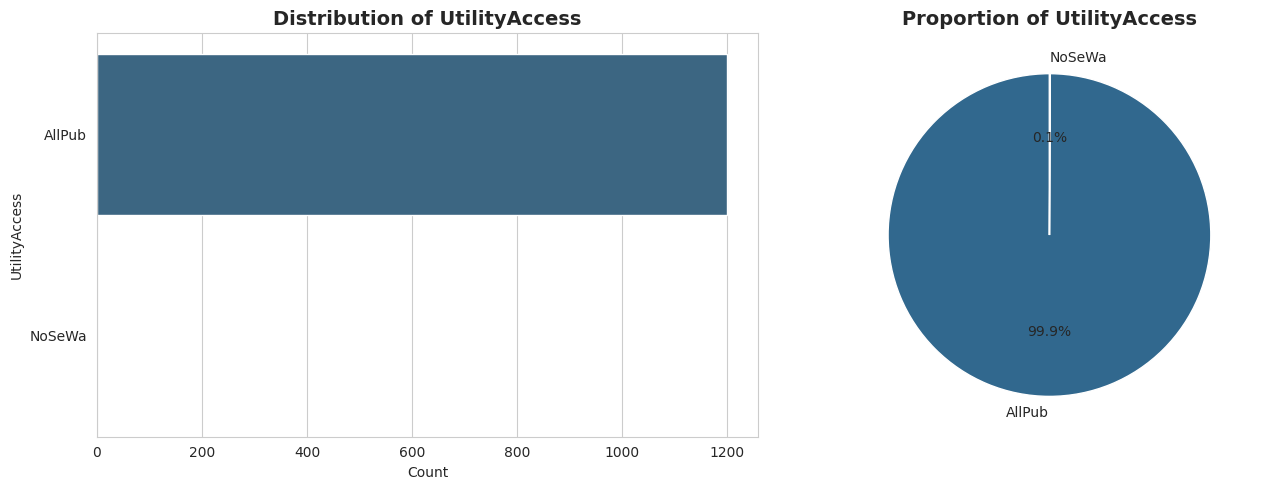


UtilityAccess - Unique values: 2
UtilityAccess
AllPub    1199
NoSeWa       1
Name: count, dtype: int64
------------------------------------------------------------


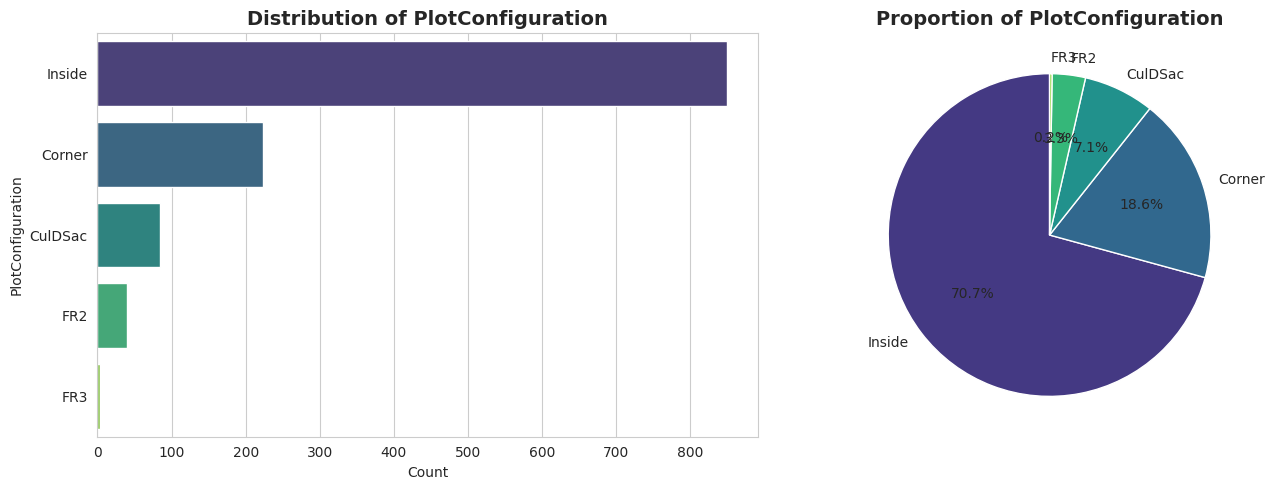


PlotConfiguration - Unique values: 5
PlotConfiguration
Inside     849
Corner     223
CulDSac     85
FR2         40
FR3          3
Name: count, dtype: int64
------------------------------------------------------------


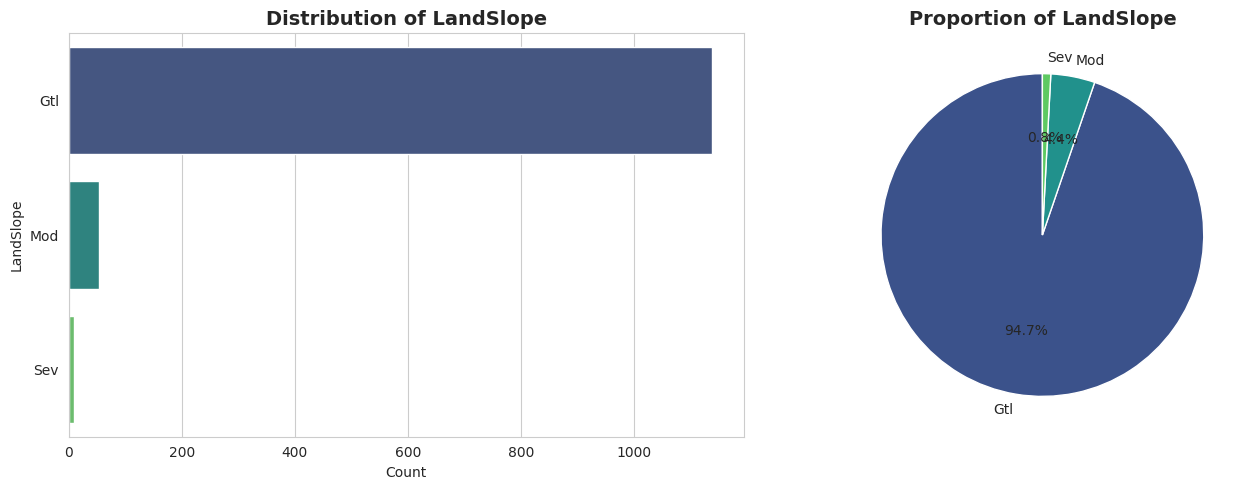


LandSlope - Unique values: 3
LandSlope
Gtl    1137
Mod      53
Sev      10
Name: count, dtype: int64
------------------------------------------------------------


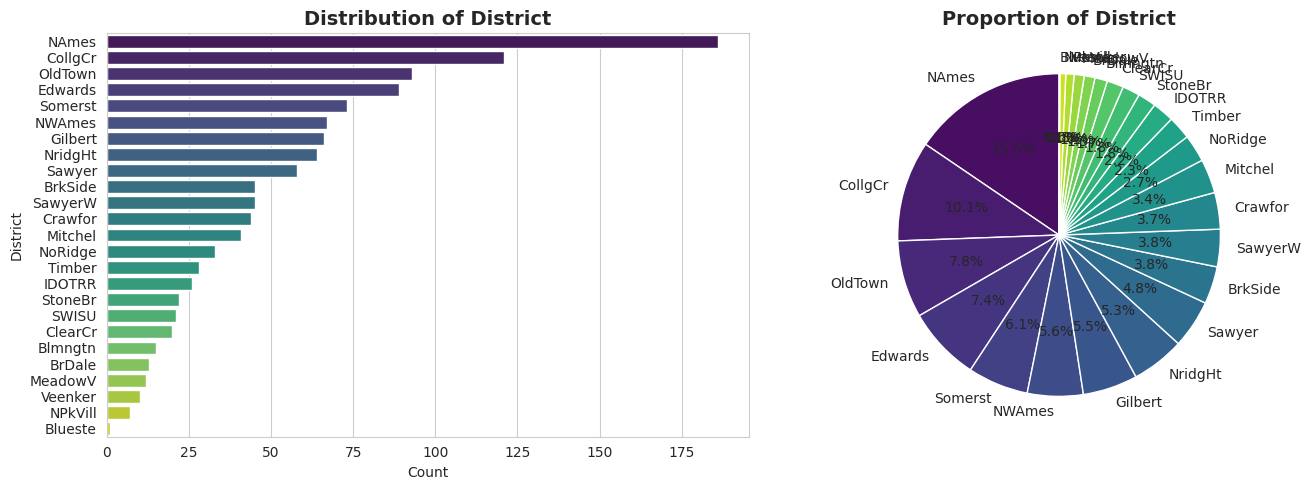


District - Unique values: 25
District
NAmes      186
CollgCr    121
OldTown     93
Edwards     89
Somerst     73
NWAmes      67
Gilbert     66
NridgHt     64
Sawyer      58
BrkSide     45
SawyerW     45
Crawfor     44
Mitchel     41
NoRidge     33
Timber      28
IDOTRR      26
StoneBr     22
SWISU       21
ClearCr     20
Blmngtn     15
BrDale      13
MeadowV     12
Veenker     10
NPkVill      7
Blueste      1
Name: count, dtype: int64
------------------------------------------------------------


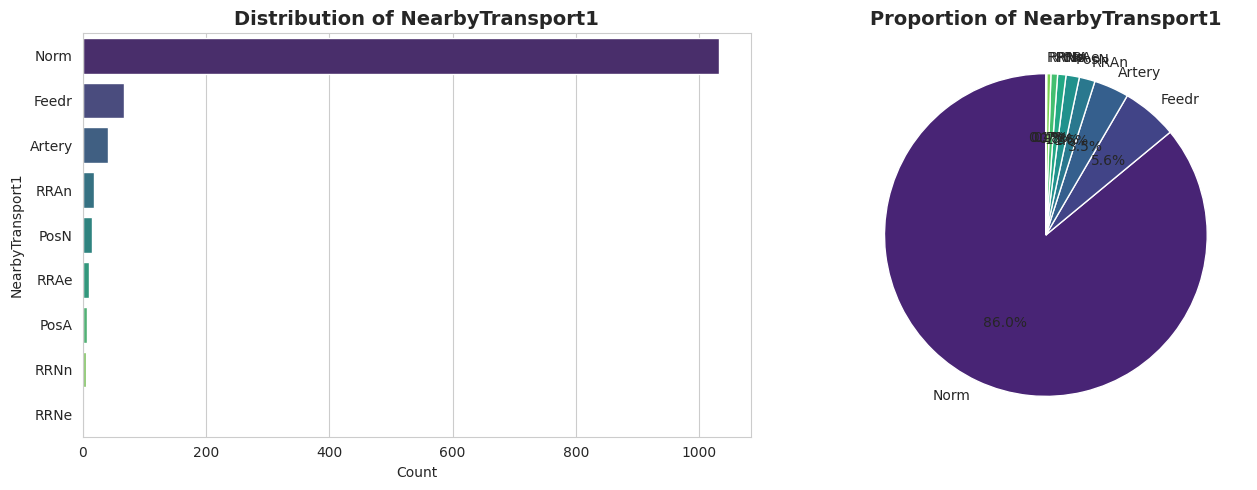


NearbyTransport1 - Unique values: 9
NearbyTransport1
Norm      1032
Feedr       67
Artery      42
RRAn        19
PosN        16
RRAe        10
PosA         8
RRNn         5
RRNe         1
Name: count, dtype: int64
------------------------------------------------------------


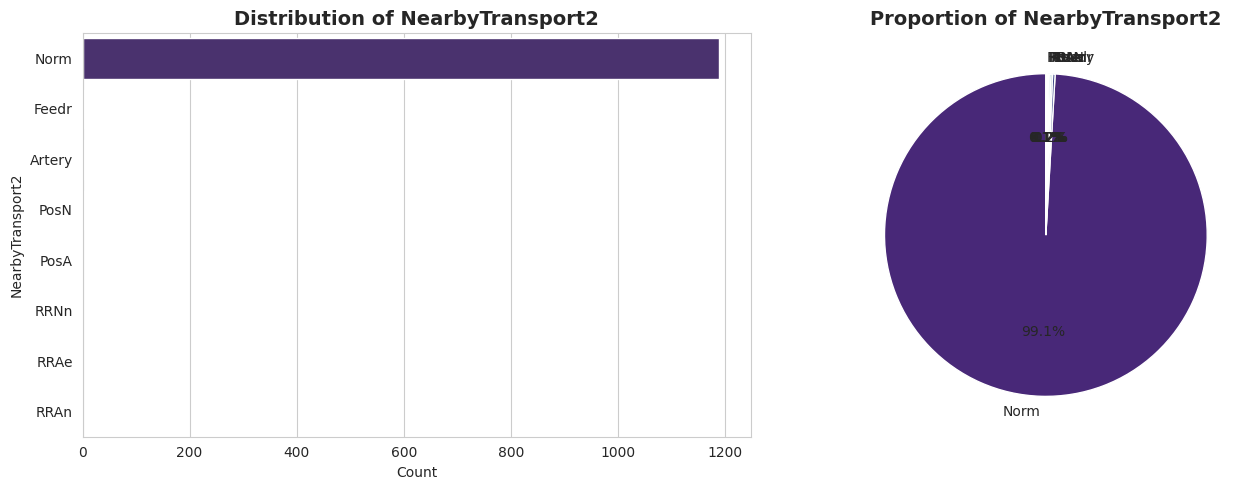


NearbyTransport2 - Unique values: 8
NearbyTransport2
Norm      1189
Feedr        3
Artery       2
PosN         2
PosA         1
RRNn         1
RRAe         1
RRAn         1
Name: count, dtype: int64
------------------------------------------------------------


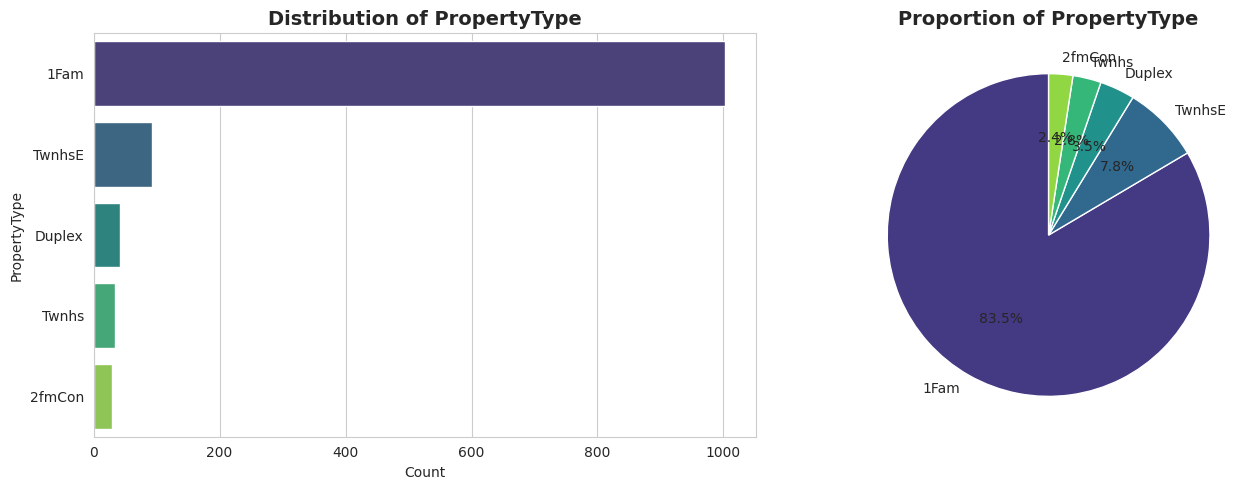


PropertyType - Unique values: 5
PropertyType
1Fam      1002
TwnhsE      93
Duplex      42
Twnhs       34
2fmCon      29
Name: count, dtype: int64
------------------------------------------------------------


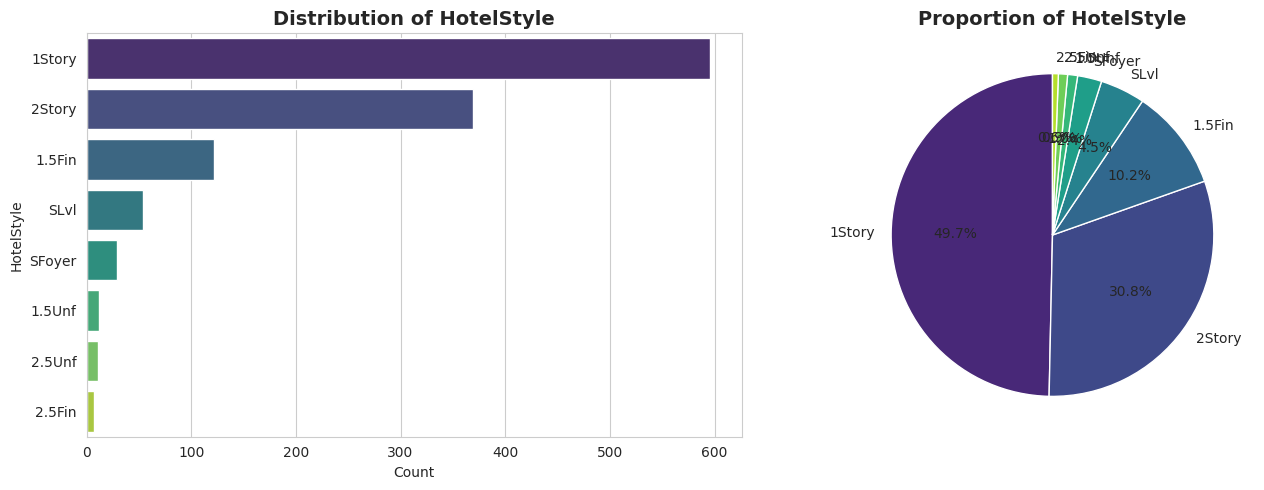


HotelStyle - Unique values: 8
HotelStyle
1Story    596
2Story    369
1.5Fin    122
SLvl       54
SFoyer     29
1.5Unf     12
2.5Unf     11
2.5Fin      7
Name: count, dtype: int64
------------------------------------------------------------


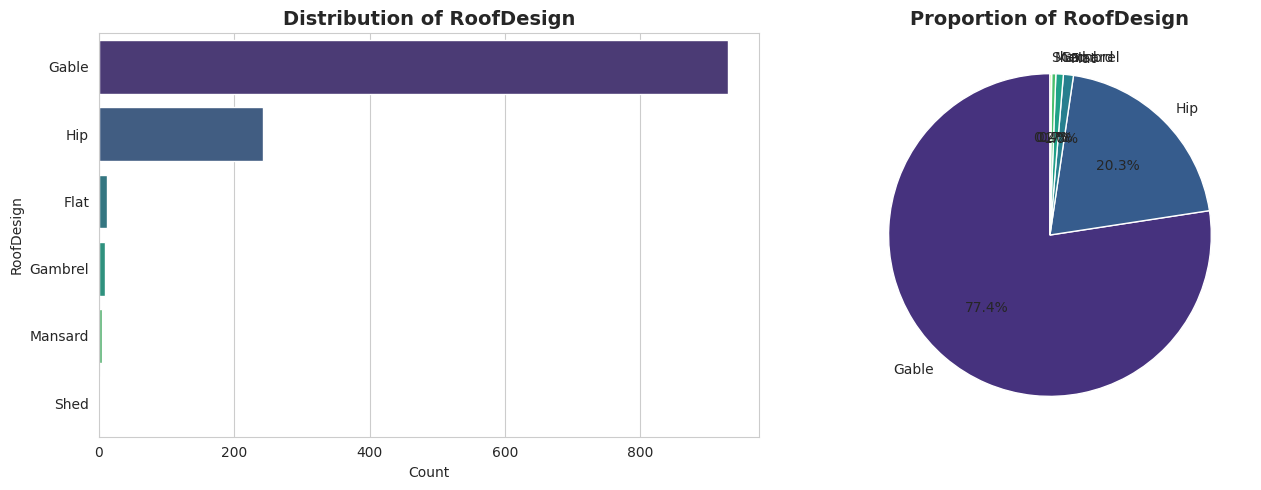


RoofDesign - Unique values: 6
RoofDesign
Gable      929
Hip        243
Flat        12
Gambrel      9
Mansard      5
Shed         2
Name: count, dtype: int64
------------------------------------------------------------


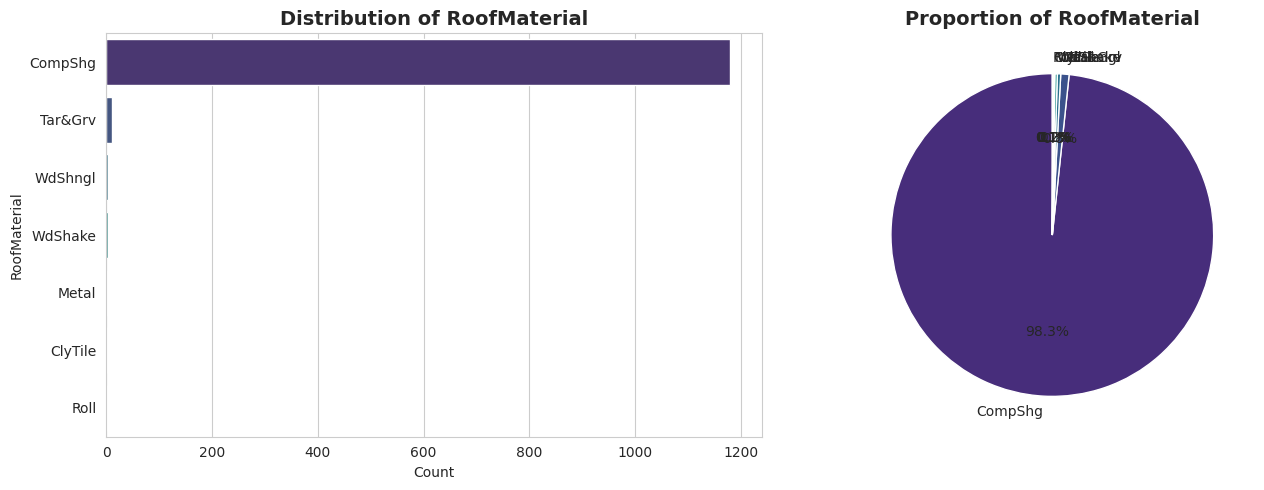


RoofMaterial - Unique values: 7
RoofMaterial
CompShg    1180
Tar&Grv      10
WdShngl       4
WdShake       3
Metal         1
ClyTile       1
Roll          1
Name: count, dtype: int64
------------------------------------------------------------


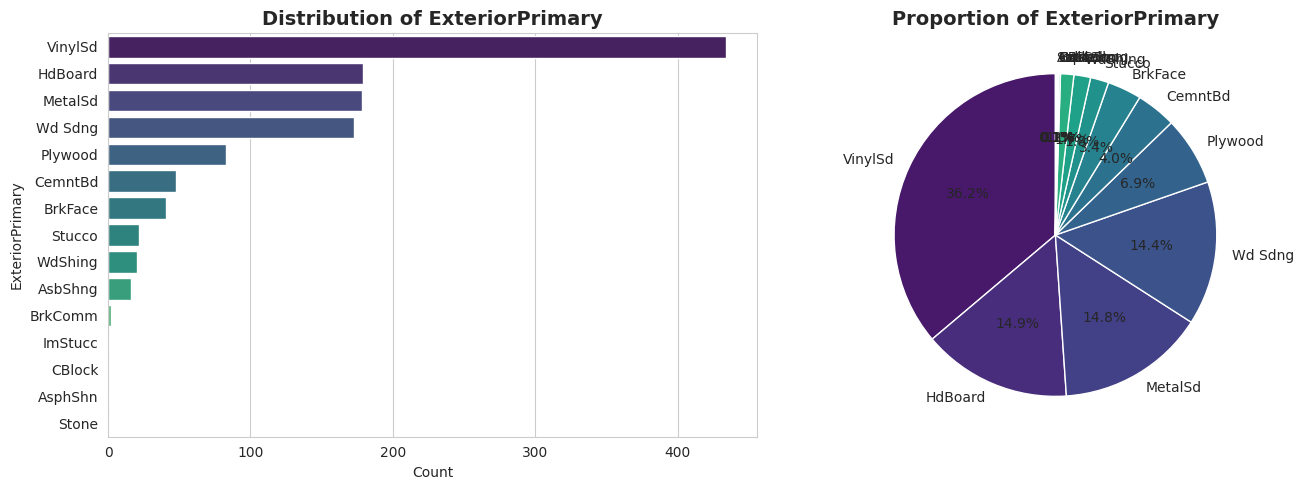


ExteriorPrimary - Unique values: 15
ExteriorPrimary
VinylSd    434
HdBoard    179
MetalSd    178
Wd Sdng    173
Plywood     83
CemntBd     48
BrkFace     41
Stucco      22
WdShing     20
AsbShng     16
BrkComm      2
ImStucc      1
CBlock       1
AsphShn      1
Stone        1
Name: count, dtype: int64
------------------------------------------------------------


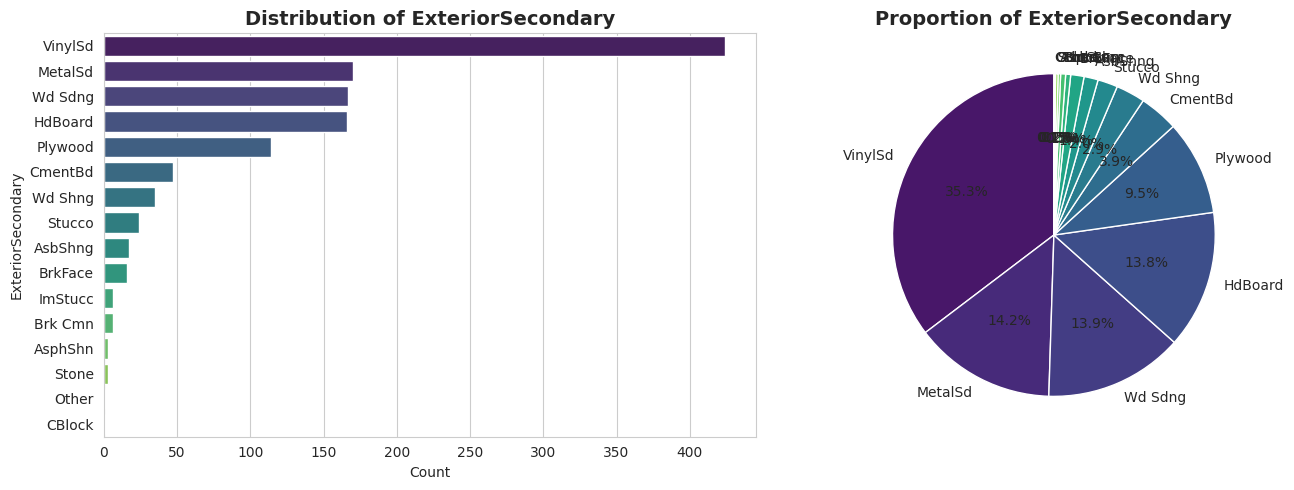


ExteriorSecondary - Unique values: 16
ExteriorSecondary
VinylSd    424
MetalSd    170
Wd Sdng    167
HdBoard    166
Plywood    114
CmentBd     47
Wd Shng     35
Stucco      24
AsbShng     17
BrkFace     16
ImStucc      6
Brk Cmn      6
AsphShn      3
Stone        3
Other        1
CBlock       1
Name: count, dtype: int64
------------------------------------------------------------


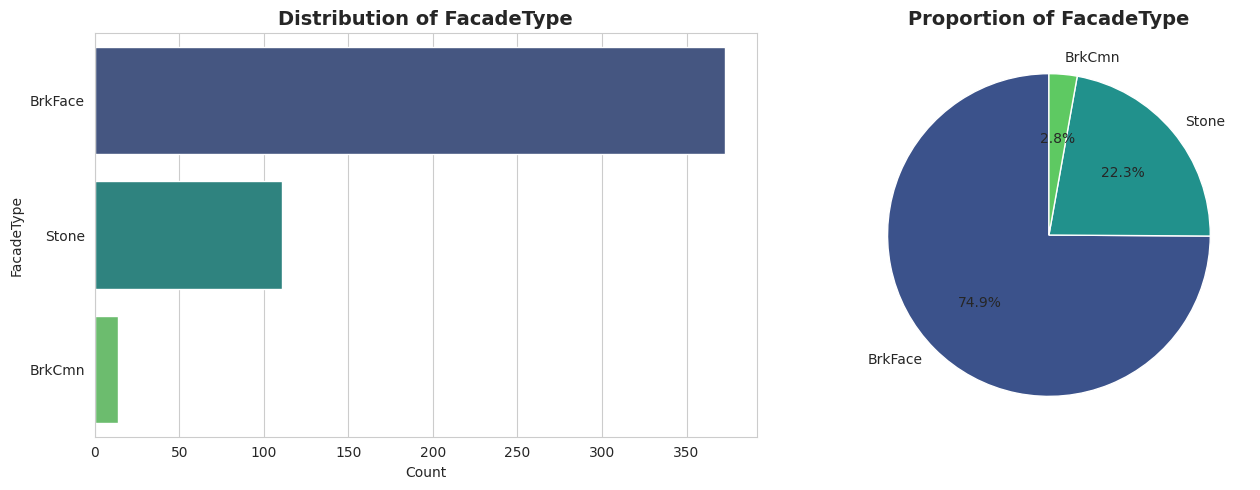


FacadeType - Unique values: 3
FacadeType
BrkFace    373
Stone      111
BrkCmn      14
Name: count, dtype: int64
------------------------------------------------------------


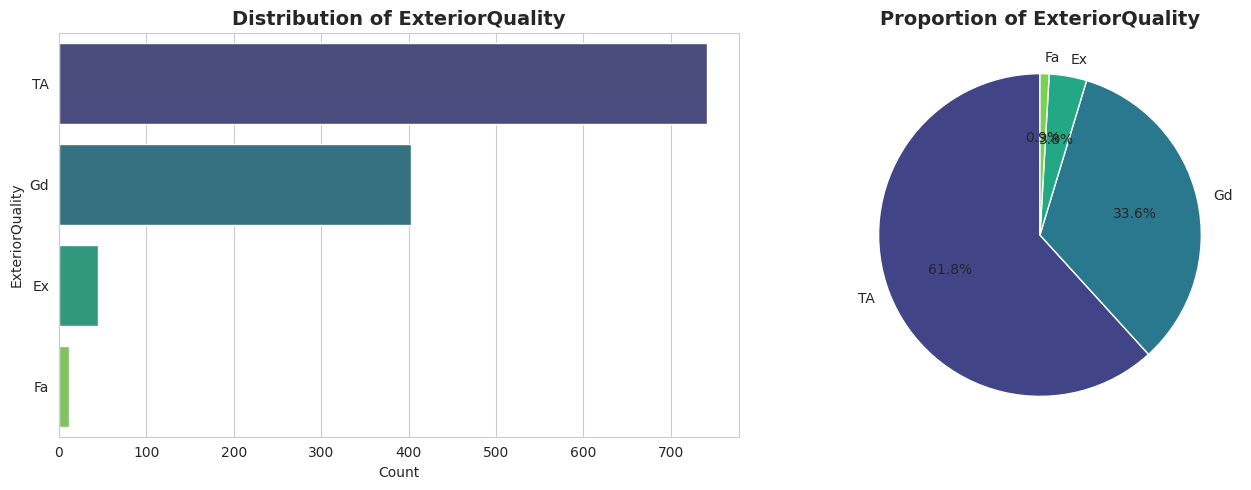


ExteriorQuality - Unique values: 4
ExteriorQuality
TA    741
Gd    403
Ex     45
Fa     11
Name: count, dtype: int64
------------------------------------------------------------


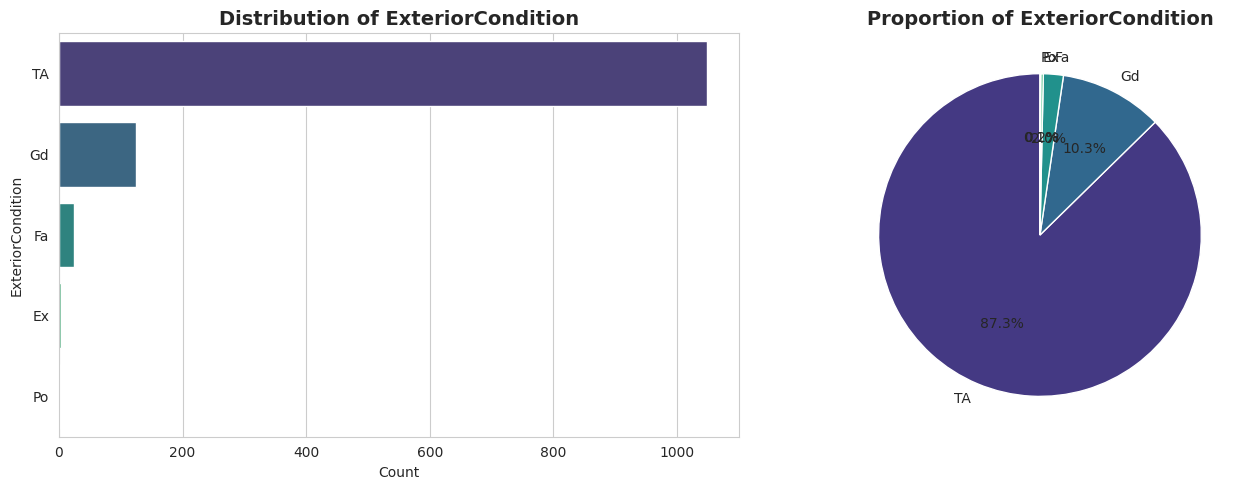


ExteriorCondition - Unique values: 5
ExteriorCondition
TA    1048
Gd     124
Fa      24
Ex       3
Po       1
Name: count, dtype: int64
------------------------------------------------------------


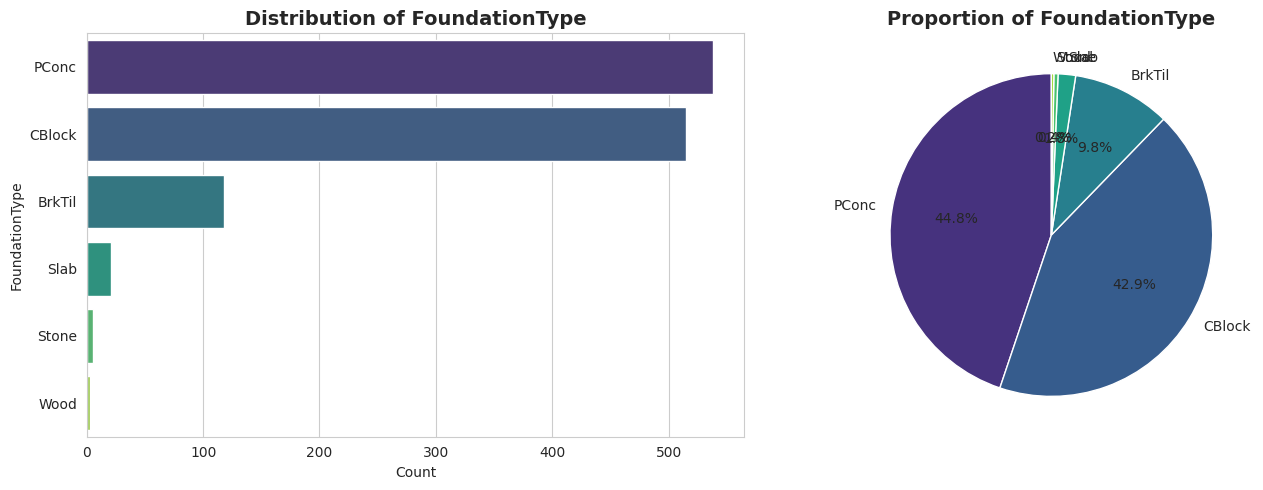


FoundationType - Unique values: 6
FoundationType
PConc     538
CBlock    515
BrkTil    118
Slab       21
Stone       5
Wood        3
Name: count, dtype: int64
------------------------------------------------------------


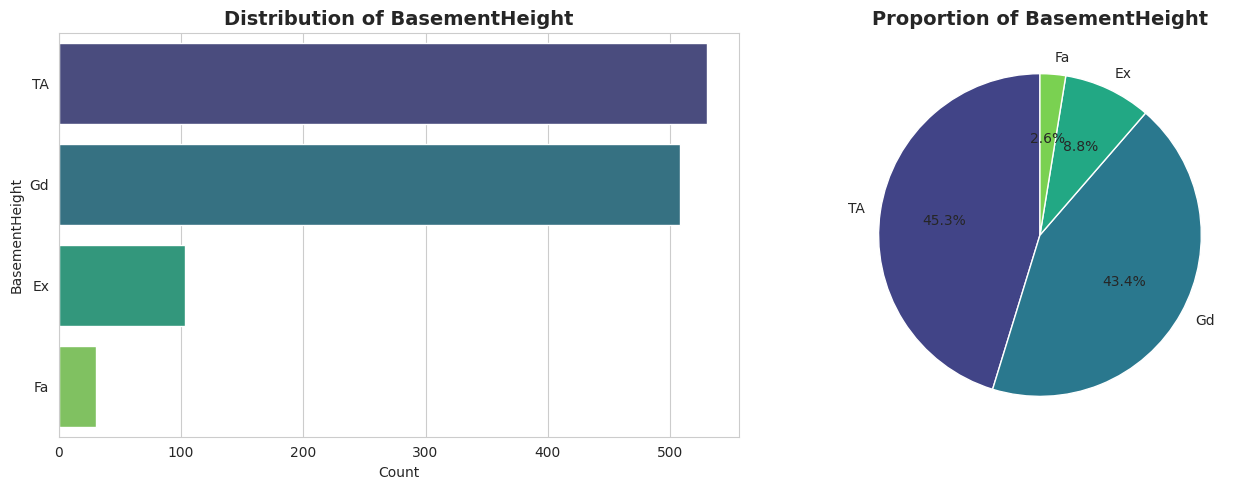


BasementHeight - Unique values: 4
BasementHeight
TA    530
Gd    508
Ex    103
Fa     30
Name: count, dtype: int64
------------------------------------------------------------


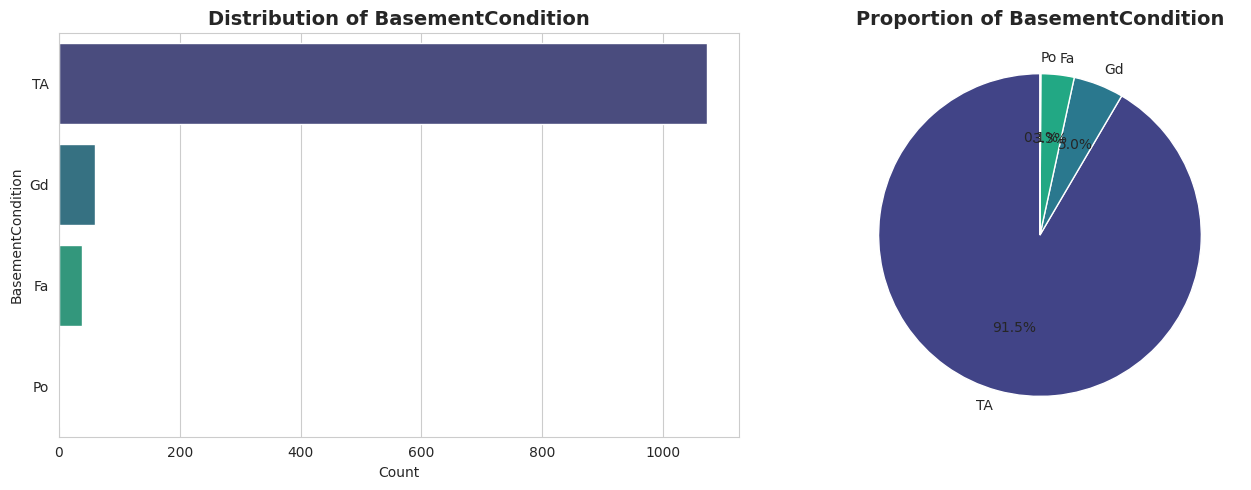


BasementCondition - Unique values: 4
BasementCondition
TA    1072
Gd      59
Fa      39
Po       1
Name: count, dtype: int64
------------------------------------------------------------


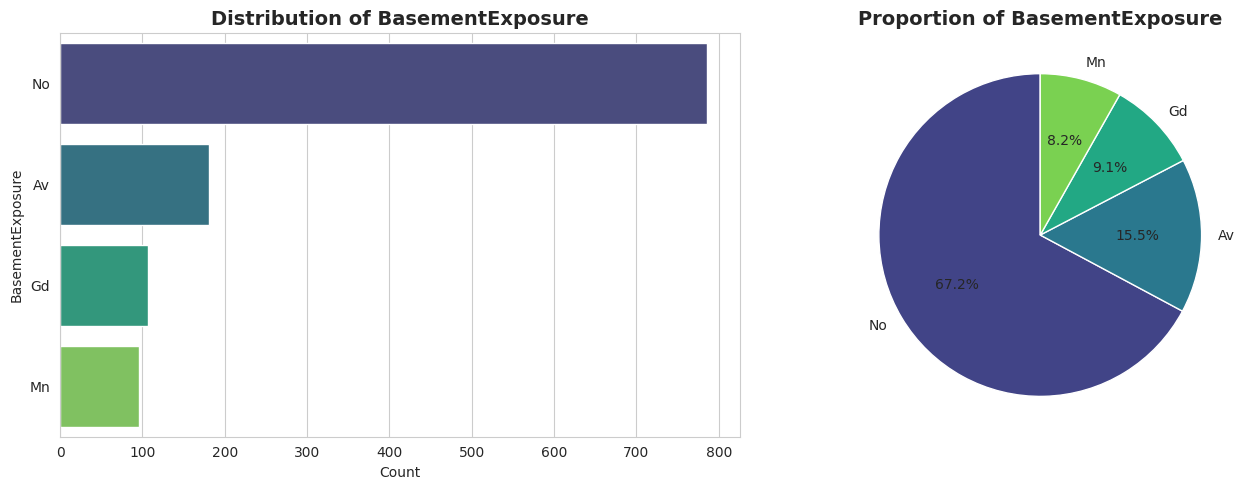


BasementExposure - Unique values: 4
BasementExposure
No    786
Av    181
Gd    107
Mn     96
Name: count, dtype: int64
------------------------------------------------------------


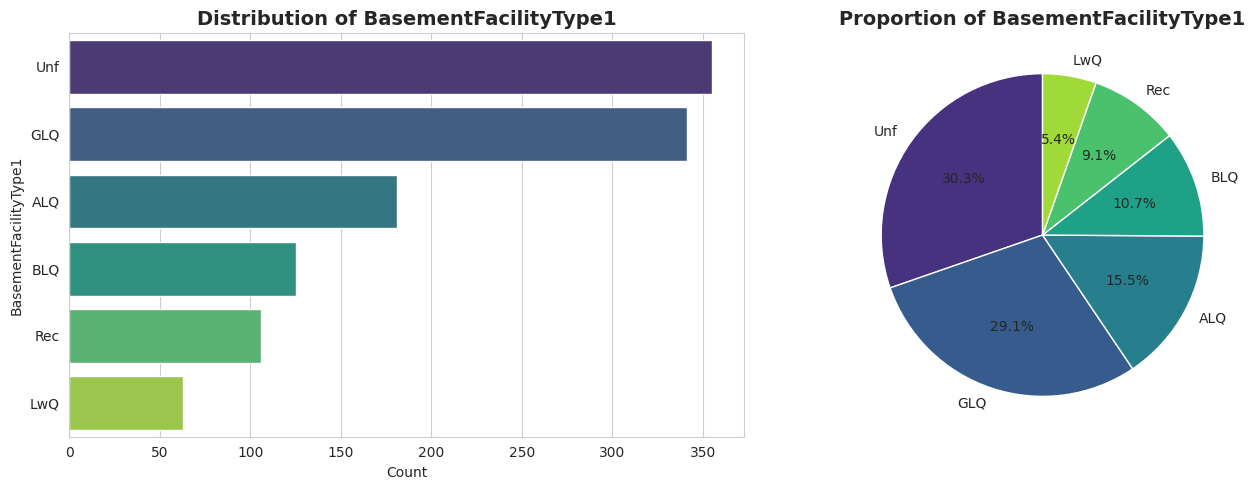


BasementFacilityType1 - Unique values: 6
BasementFacilityType1
Unf    355
GLQ    341
ALQ    181
BLQ    125
Rec    106
LwQ     63
Name: count, dtype: int64
------------------------------------------------------------


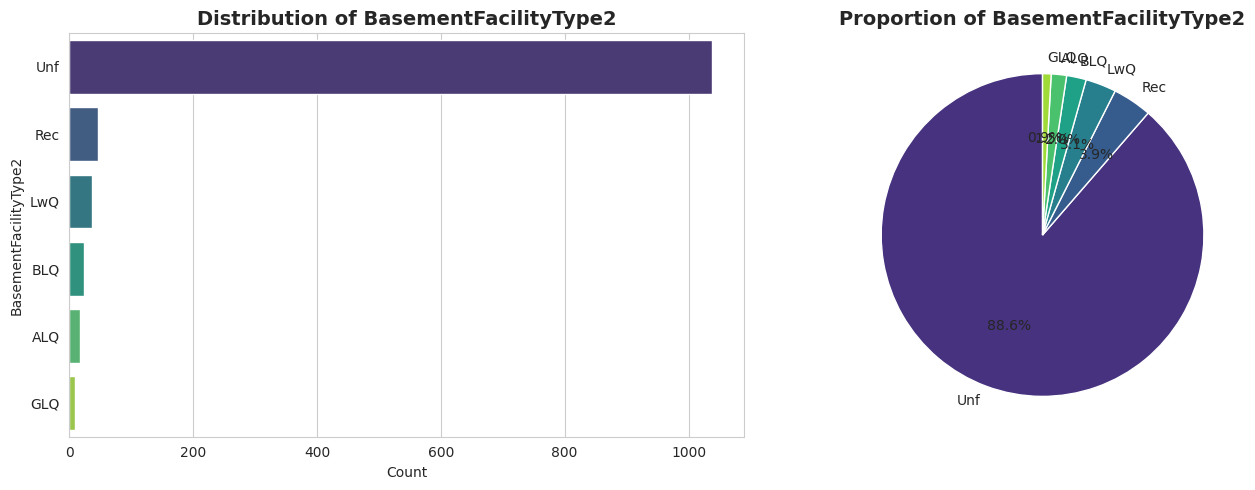


BasementFacilityType2 - Unique values: 6
BasementFacilityType2
Unf    1038
Rec      46
LwQ      36
BLQ      23
ALQ      18
GLQ      10
Name: count, dtype: int64
------------------------------------------------------------


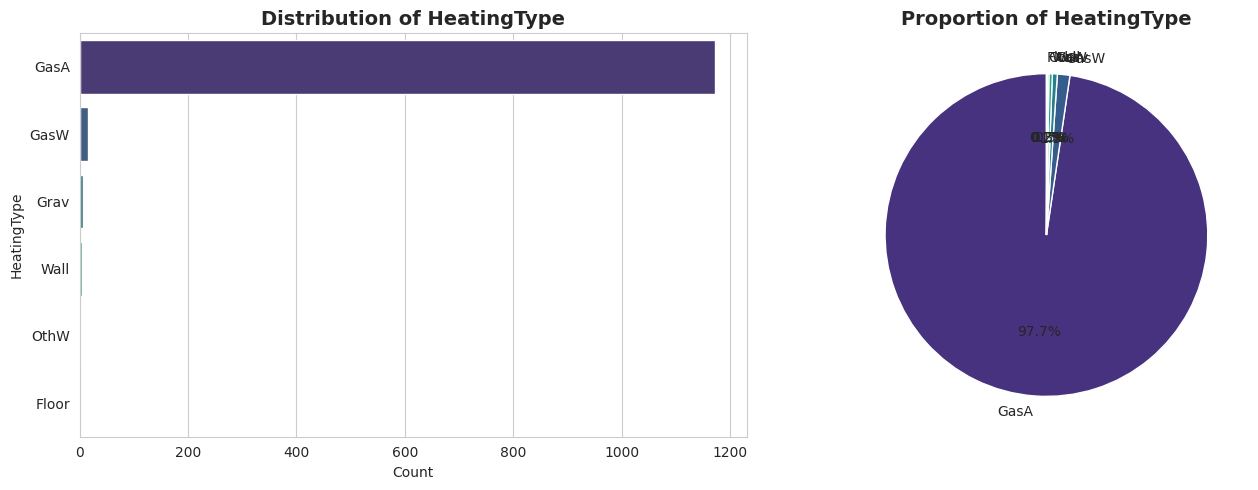


HeatingType - Unique values: 6
HeatingType
GasA     1172
GasW       15
Grav        6
Wall        4
OthW        2
Floor       1
Name: count, dtype: int64
------------------------------------------------------------


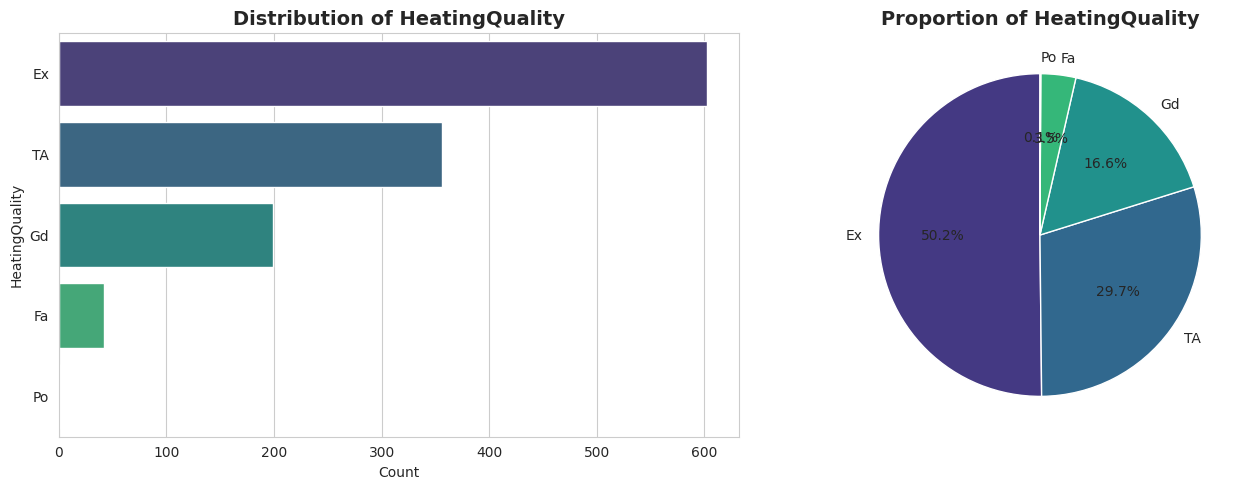


HeatingQuality - Unique values: 5
HeatingQuality
Ex    602
TA    356
Gd    199
Fa     42
Po      1
Name: count, dtype: int64
------------------------------------------------------------


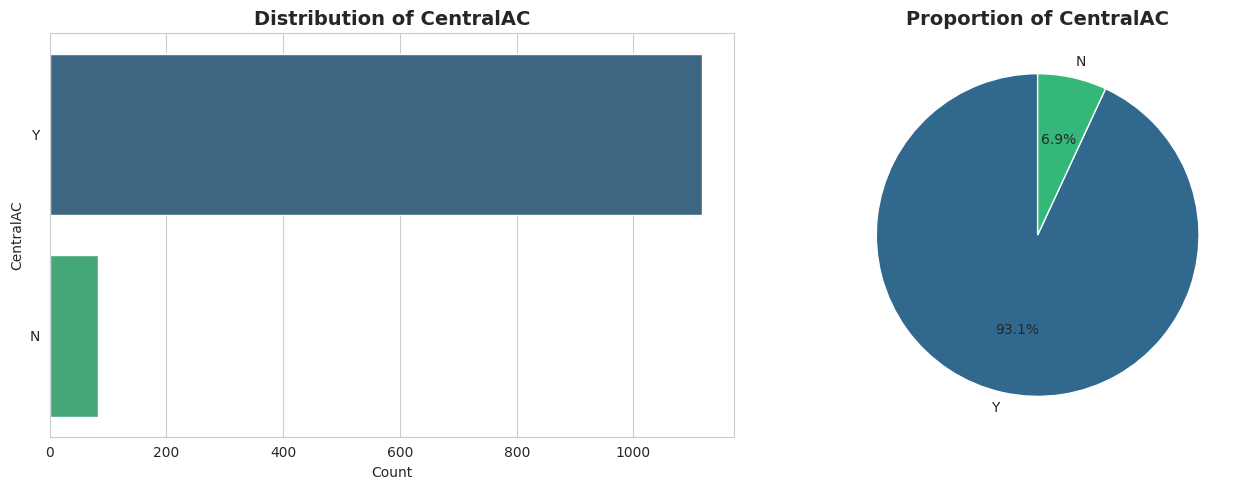


CentralAC - Unique values: 2
CentralAC
Y    1117
N      83
Name: count, dtype: int64
------------------------------------------------------------


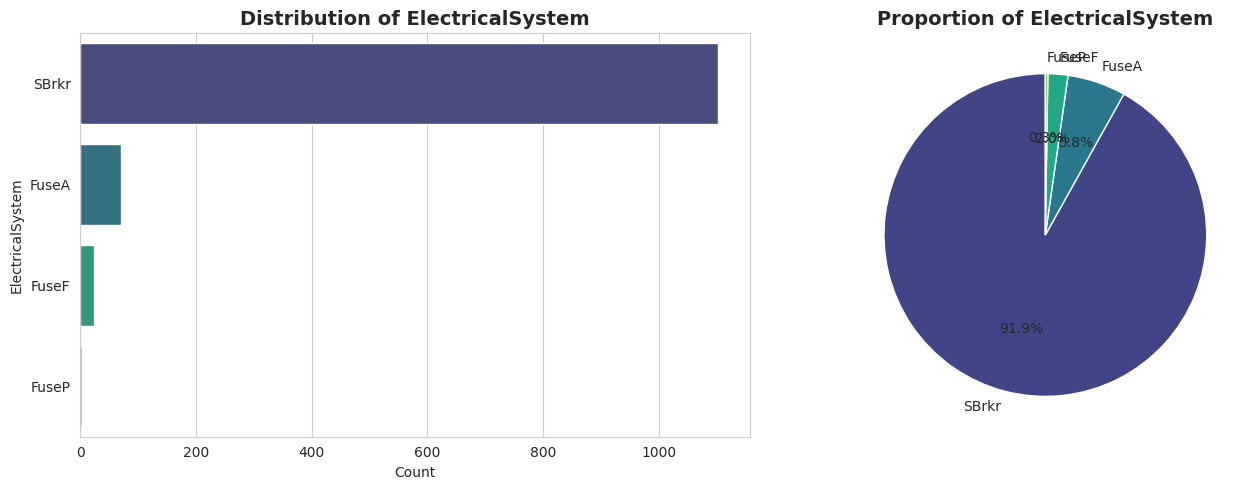


ElectricalSystem - Unique values: 4
ElectricalSystem
SBrkr    1102
FuseA      70
FuseF      24
FuseP       3
Name: count, dtype: int64
------------------------------------------------------------


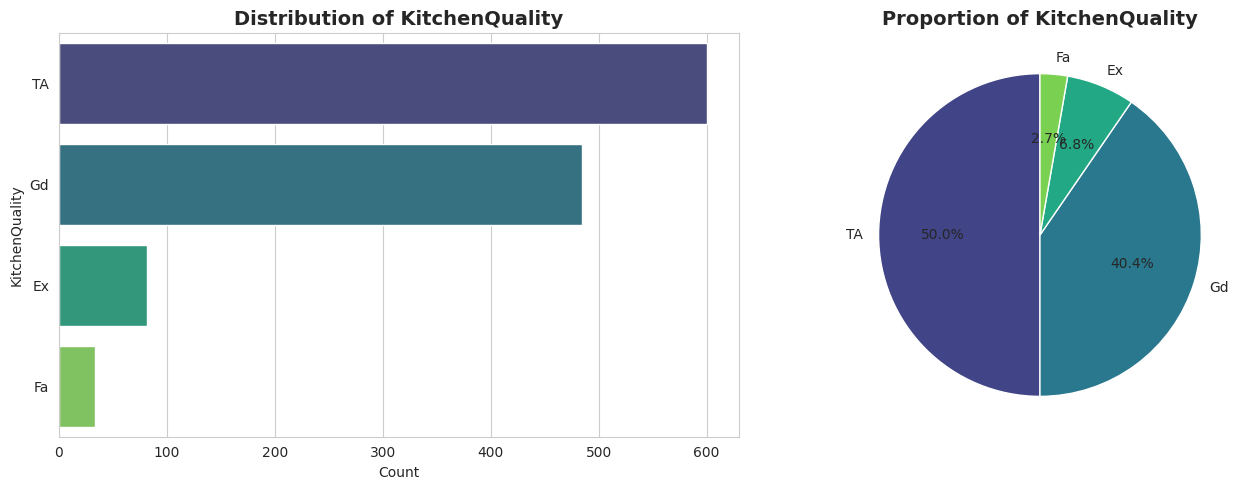


KitchenQuality - Unique values: 4
KitchenQuality
TA    600
Gd    485
Ex     82
Fa     33
Name: count, dtype: int64
------------------------------------------------------------


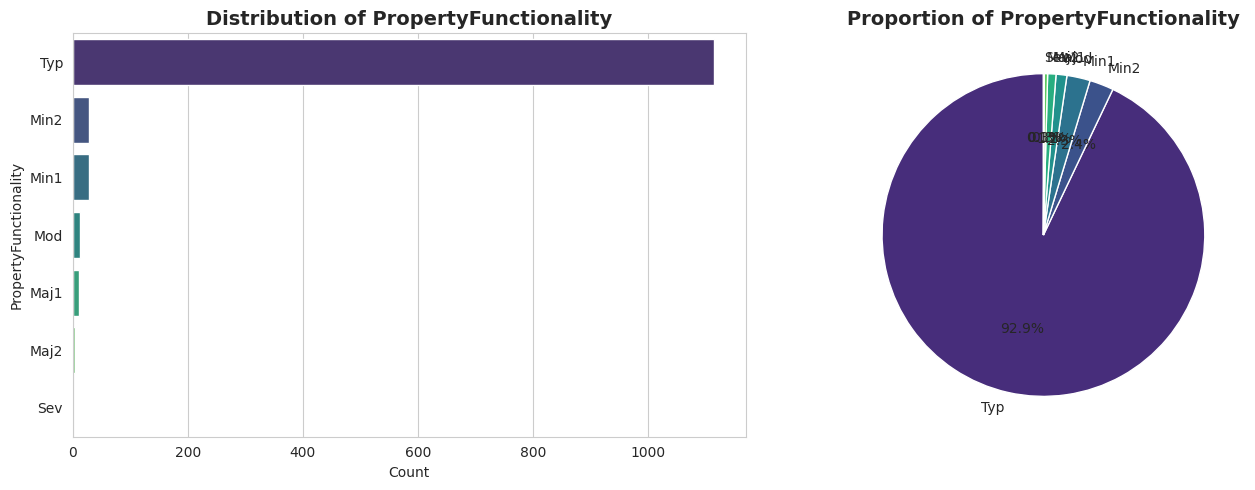


PropertyFunctionality - Unique values: 7
PropertyFunctionality
Typ     1115
Min2      29
Min1      28
Mod       13
Maj1      10
Maj2       4
Sev        1
Name: count, dtype: int64
------------------------------------------------------------


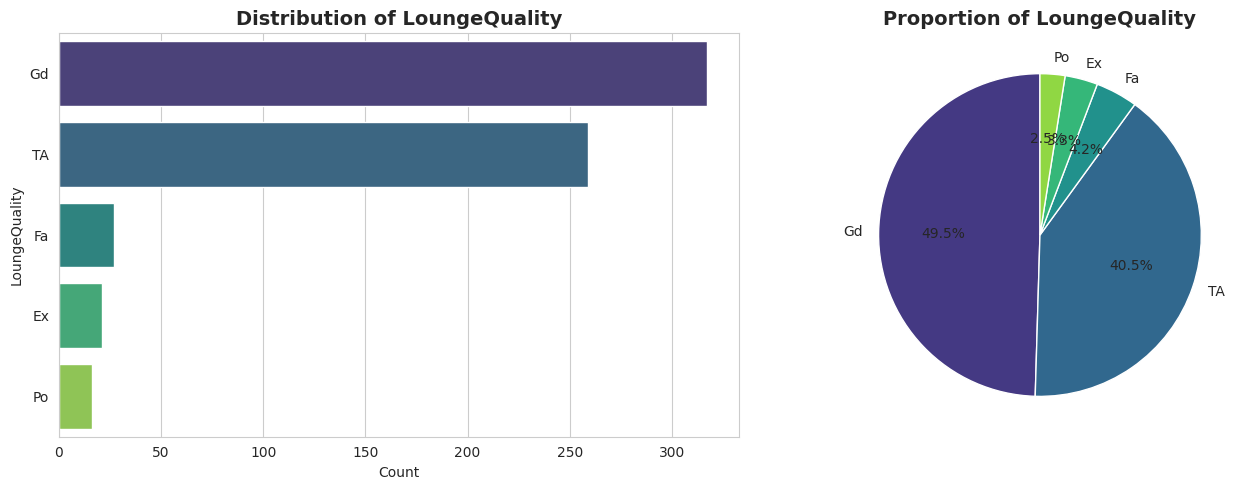


LoungeQuality - Unique values: 5
LoungeQuality
Gd    317
TA    259
Fa     27
Ex     21
Po     16
Name: count, dtype: int64
------------------------------------------------------------


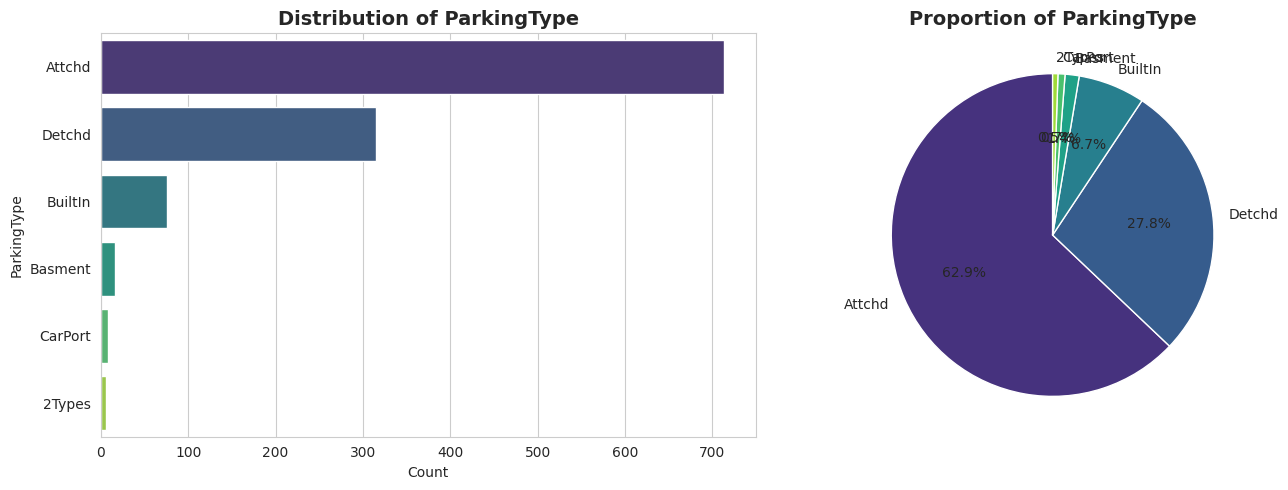


ParkingType - Unique values: 6
ParkingType
Attchd     714
Detchd     315
BuiltIn     76
Basment     16
CarPort      8
2Types       6
Name: count, dtype: int64
------------------------------------------------------------


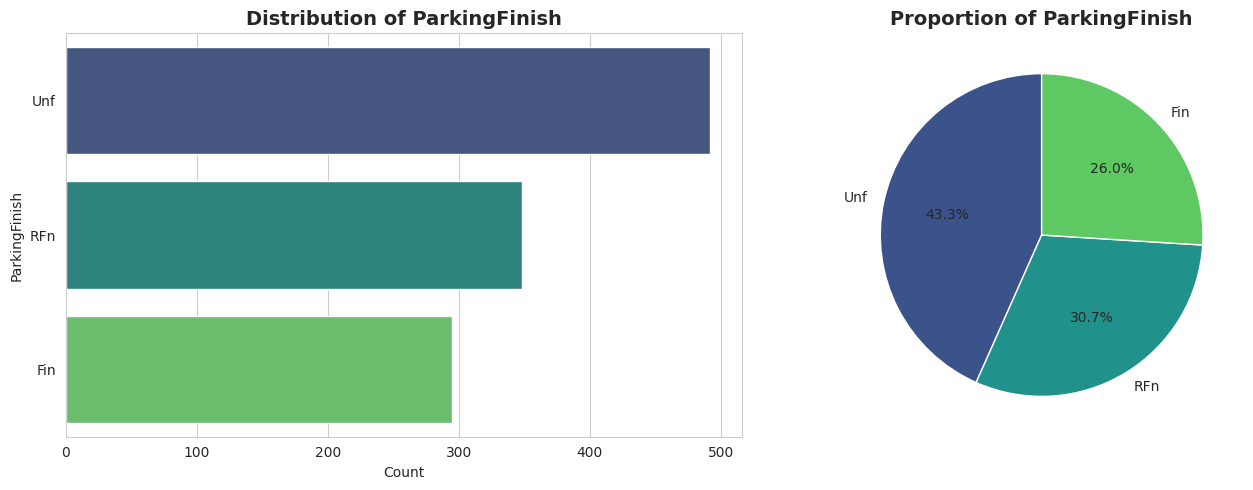


ParkingFinish - Unique values: 3
ParkingFinish
Unf    492
RFn    348
Fin    295
Name: count, dtype: int64
------------------------------------------------------------


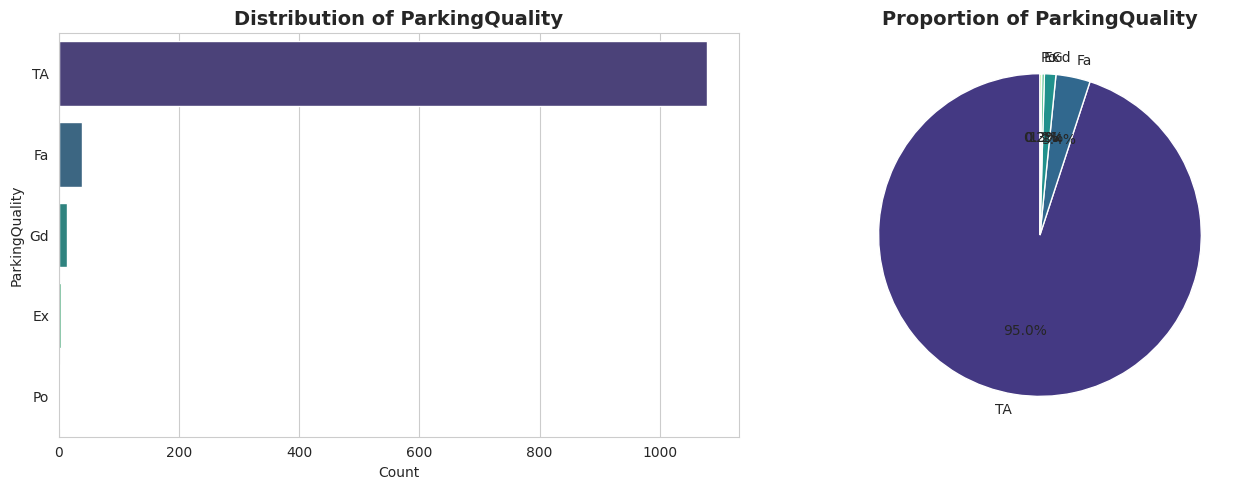


ParkingQuality - Unique values: 5
ParkingQuality
TA    1078
Fa      39
Gd      13
Ex       3
Po       2
Name: count, dtype: int64
------------------------------------------------------------


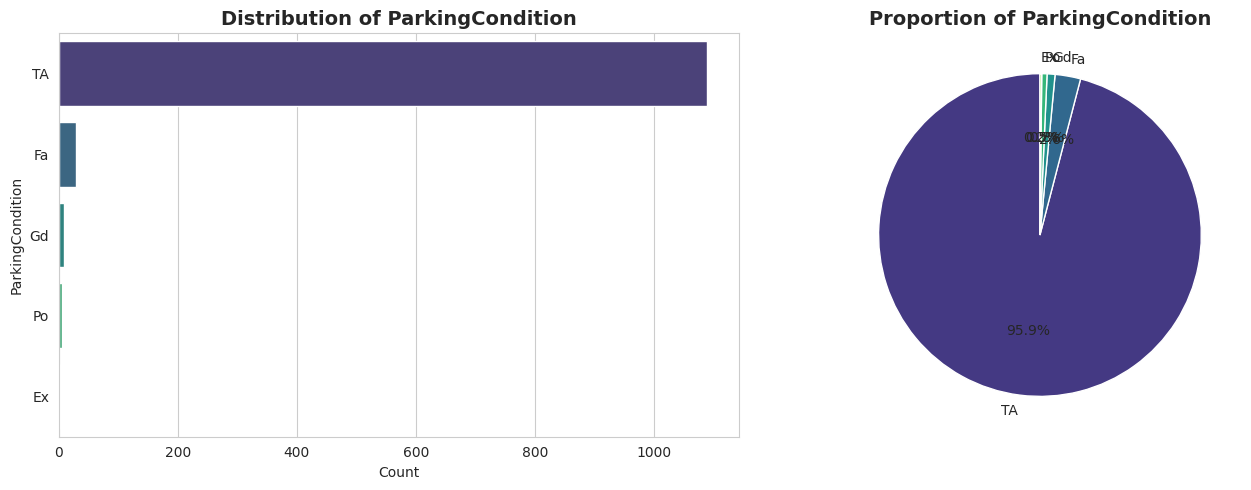


ParkingCondition - Unique values: 5
ParkingCondition
TA    1089
Fa      29
Gd       9
Po       6
Ex       2
Name: count, dtype: int64
------------------------------------------------------------


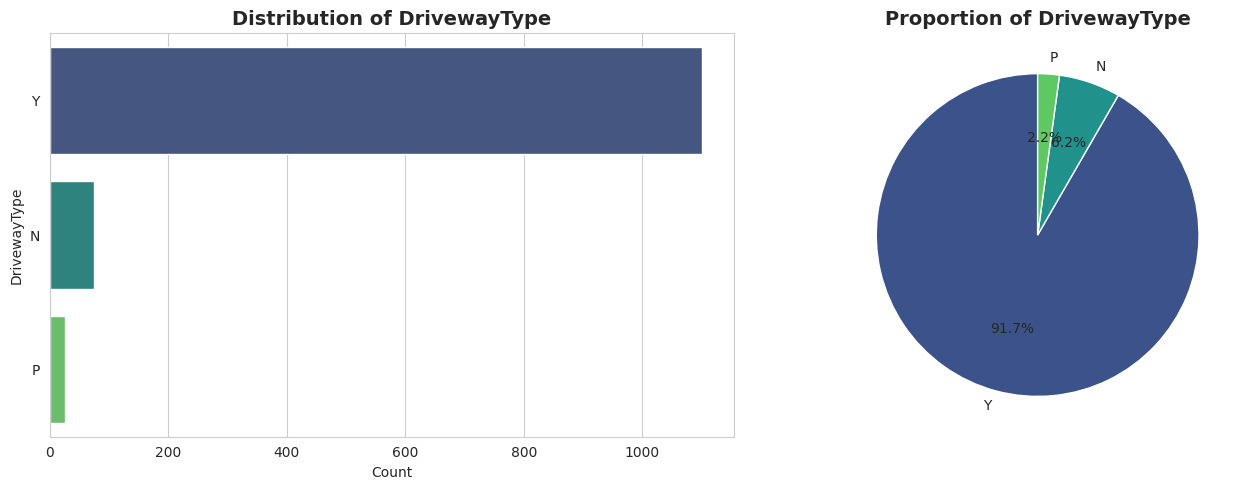


DrivewayType - Unique values: 3
DrivewayType
Y    1100
N      74
P      26
Name: count, dtype: int64
------------------------------------------------------------


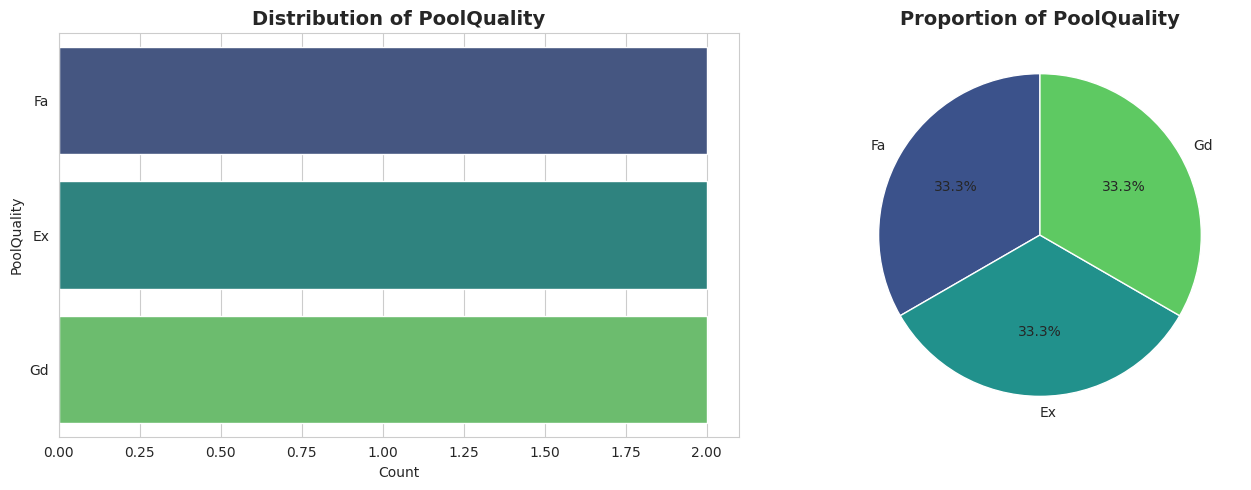


PoolQuality - Unique values: 3
PoolQuality
Fa    2
Ex    2
Gd    2
Name: count, dtype: int64
------------------------------------------------------------


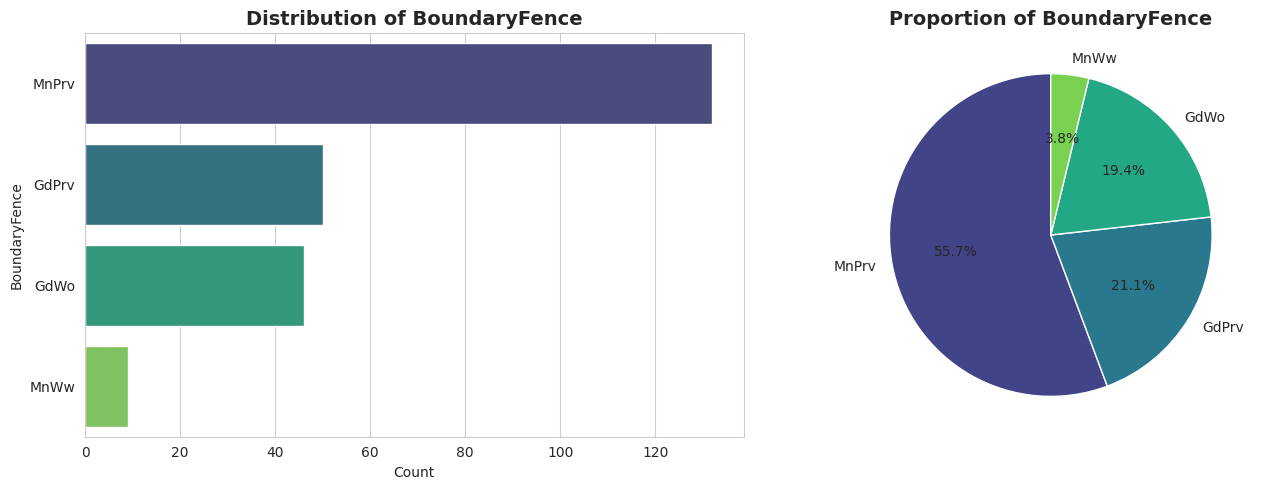


BoundaryFence - Unique values: 4
BoundaryFence
MnPrv    132
GdPrv     50
GdWo      46
MnWw       9
Name: count, dtype: int64
------------------------------------------------------------


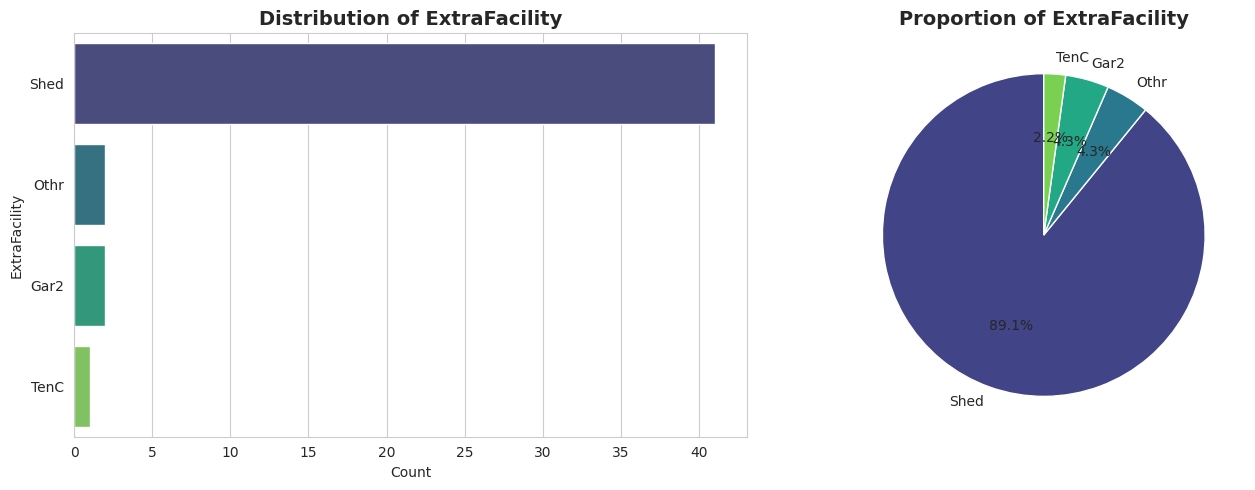


ExtraFacility - Unique values: 4
ExtraFacility
Shed    41
Othr     2
Gar2     2
TenC     1
Name: count, dtype: int64
------------------------------------------------------------


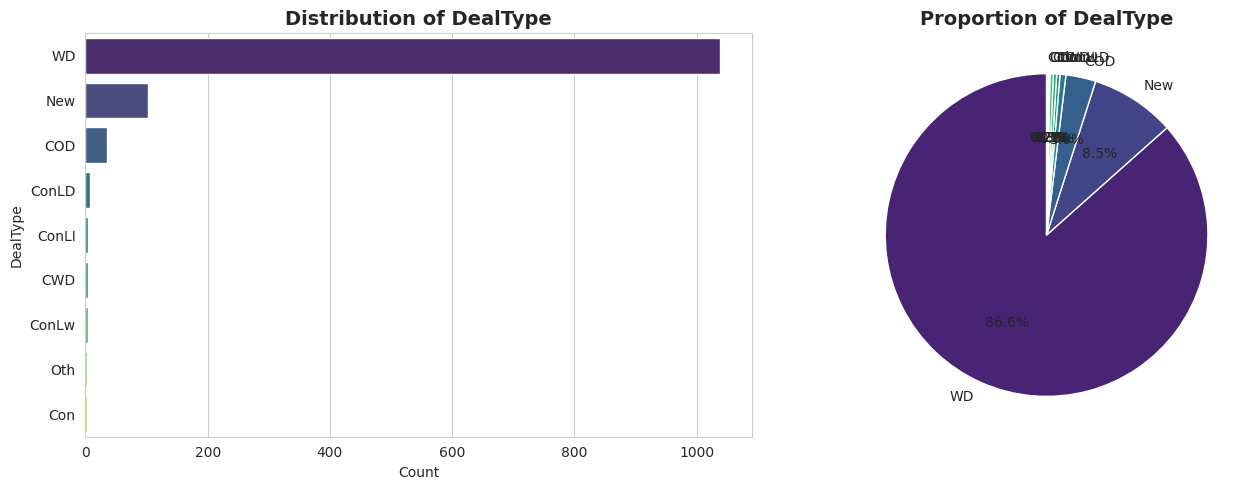


DealType - Unique values: 9
DealType
WD       1039
New       102
COD        36
ConLD       7
ConLI       4
CWD         4
ConLw       4
Oth         2
Con         2
Name: count, dtype: int64
------------------------------------------------------------


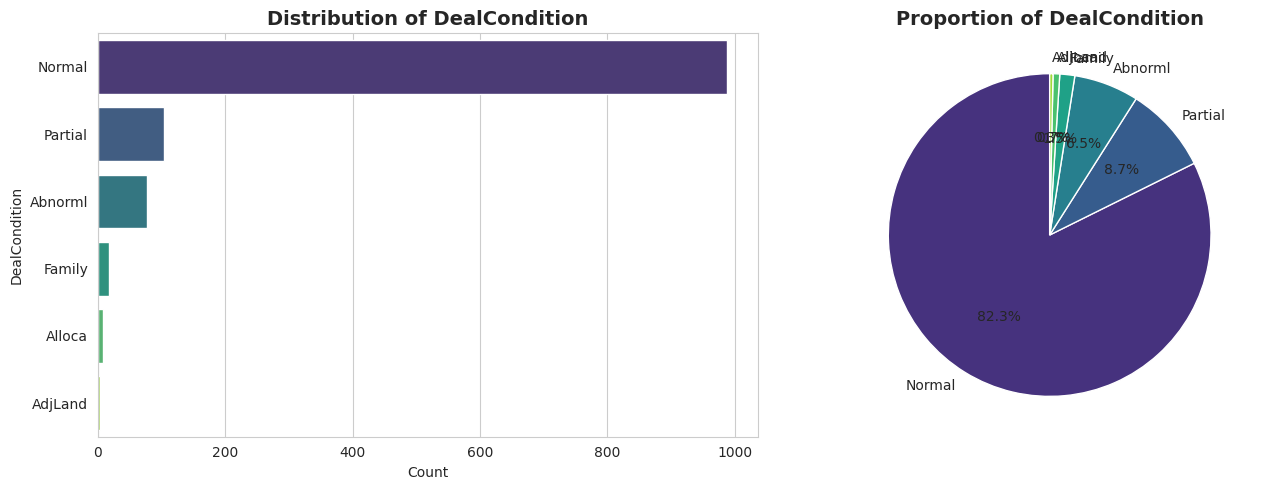


DealCondition - Unique values: 6
DealCondition
Normal     988
Partial    104
Abnorml     78
Family      18
Alloca       8
AdjLand      4
Name: count, dtype: int64
------------------------------------------------------------

Final Dataset Shape: (1200, 81)

Final Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 81 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Id                       1200 non-null   int64  
 1   PropertyClass            1200 non-null   int64  
 2   ZoningCategory           1200 non-null   object 
 3   RoadAccessLength         977 non-null    float64
 4   LandArea                 1200 non-null   int64  
 5   RoadType                 1200 non-null   object 
 6   ServiceLaneType          75 non-null     object 
 7   PlotShape                1200 non-null   object 
 8   LandElevation            1200 non-null   object 
 9   UtilityAccess  

In [9]:
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    from scipy import stats
    import missingno as msno
    import warnings
    warnings.filterwarnings('ignore')
    
    # %% [markdown]
    # Set style for better-looking plots
    
    # %%
    sns.set_style("whitegrid")
    plt.rcParams['figure.figsize'] = (12, 6)
    
    # %% [markdown]
    # %%<br>
    # Reading train data file
    
    # %%
    train_df = pd.read_csv("/kaggle/input/Hotel-Property-Value-Dataset/train.csv")
    print("Train data loaded successfully!")
    print(f"Shape: {train_df.shape}")
    
    # %% [markdown]
    # %%<br>
    # Display first few rows
    
    # %%
    train_df.head()
    
    # %% [markdown]
    # %%<br>
    # Basic information about the dataset
    
    # %%
    train_df.info()
    
    # %% [markdown]
    # %%<br>
    # Check for null values
    
    # %%
    print("Missing Values Summary:")
    print("="*50)
    missing_summary = train_df.isnull().sum()
    missing_pct = (train_df.isnull().sum() / len(train_df)) * 100
    missing_df = pd.DataFrame({
        'Missing_Count': missing_summary,
        'Percentage': missing_pct
    })
    print(missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False))
    
    # %% [markdown]
    # %%<br>
    # Check for duplicates
    
    # %%
    duplicates = train_df.duplicated().sum()
    print(f"Number of duplicate rows: {duplicates}")
    if duplicates > 0:
        train_df.drop_duplicates(inplace=True)
        print(f"Duplicates removed. New shape: {train_df.shape}")
    
    # %% [markdown]
    # %%<br>
    # Statistical summary of numerical features
    
    # %%
    print("Statistical Summary of Numerical Features:")
    print("="*80)
    print(train_df.describe().T)
    
    # %% [markdown]
    # %%<br>
    # Missing data visualization
    
    # %%
    print("Missing Data Visualization:")
    msno.matrix(train_df, figsize=(14, 8))
    plt.title('Missing Data Matrix', fontsize=16, pad=20)
    plt.show()
    
    # %% [markdown]
    # %%<br>
    # Identify numerical and categorical columns
    
    # %%
    num_cols = train_df.select_dtypes(include=['float64', 'int64']).columns.tolist()
    cat_cols = train_df.select_dtypes(include=['object']).columns.tolist()
    
    # %% [markdown]
    # Remove ID column from analysis if present
    
    # %%
    if 'hotel_id' in num_cols:
        num_cols.remove('hotel_id')
    if 'hotel_id' in train_df.columns:
        print(f"ID column found: hotel_id")
    
    # %%
    print(f"\nNumerical columns ({len(num_cols)}): {num_cols}")
    print(f"\nCategorical columns ({len(cat_cols)}): {cat_cols}")
    
    # %% [markdown]
    # %% [markdown]<br>
    # ## Distribution Analysis of Numerical Features
    
    # %% [markdown]
    # %%<br>
    # Distribution plots for numerical columns
    
    # %%
    for col in num_cols:
        plt.figure(figsize=(14, 5))
        
        # Histogram with KDE
        plt.subplot(1, 2, 1)
        sns.histplot(train_df[col].dropna(), kde=True, bins=30, color='steelblue')
        plt.title(f'Distribution of {col}', fontsize=14, fontweight='bold')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        
        # Q-Q plot for normality check
        plt.subplot(1, 2, 2)
        stats.probplot(train_df[col].dropna(), dist="norm", plot=plt)
        plt.title(f'Q-Q Plot of {col}', fontsize=14, fontweight='bold')
        
        plt.tight_layout()
        plt.show()
        
        # Print skewness and kurtosis
        skewness = train_df[col].skew()
        kurtosis_val = train_df[col].kurtosis()
        print(f"{col} - Skewness: {skewness:.3f}, Kurtosis: {kurtosis_val:.3f}")
        print("-" * 60)
    
    # %% [markdown]
    # %% [markdown]<br>
    # ## Outlier Detection
    
    # %% [markdown]
    # %%<br>
    # Boxplots for outlier detection
    
    # %%
    for col in num_cols:
        plt.figure(figsize=(12, 4))
        sns.boxplot(x=train_df[col], color='lightcoral')
        plt.title(f'Boxplot of {col} - Outlier Detection', fontsize=14, fontweight='bold')
        plt.xlabel(col)
        
        # Calculate outlier statistics
        Q1 = train_df[col].quantile(0.25)
        Q3 = train_df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = train_df[(train_df[col] < lower_bound) | (train_df[col] > upper_bound)][col]
        
        plt.text(0.02, 0.98, f'Outliers: {len(outliers)} ({len(outliers)/len(train_df)*100:.2f}%)', 
                 transform=plt.gca().transAxes, verticalalignment='top',
                 bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
        
        plt.tight_layout()
        plt.show()
    
    # %% [markdown]
    # %% [markdown]<br>
    # ## Correlation Analysis
    
    # %% [markdown]
    # %%<br>
    # Correlation matrix
    
    # %%
    plt.figure(figsize=(14, 10))
    correlation_matrix = train_df[num_cols].corr()
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
    sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
                center=0, square=True, mask=mask, linewidths=1,
                cbar_kws={"shrink": 0.8})
    plt.title('Correlation Matrix - Numerical Features', fontsize=16, fontweight='bold', pad=20)
    plt.tight_layout()
    plt.show()
    
    # %% [markdown]
    # %%<br>
    # Find highly correlated features
    
    # %%
    threshold = 0.7
    high_corr = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            if abs(correlation_matrix.iloc[i, j]) > threshold:
                high_corr.append({
                    'Feature 1': correlation_matrix.columns[i],
                    'Feature 2': correlation_matrix.columns[j],
                    'Correlation': correlation_matrix.iloc[i, j]
                })
    
    # %%
    if high_corr:
        print("\nHighly Correlated Features (|correlation| > 0.7):")
        print("="*60)
        high_corr_df = pd.DataFrame(high_corr)
        print(high_corr_df.to_string(index=False))
    else:
        print("\nNo highly correlated feature pairs found (threshold = 0.7)")
    
    # %% [markdown]
    # %% [markdown]<br>
    # ## Categorical Features Analysis
    
    # %% [markdown]
    # %%<br>
    # Analysis of categorical features
    
    # %%
    for col in cat_cols:
        if col == 'hotel_id':  # Skip ID column
            continue
        
        plt.figure(figsize=(14, 5))
        
        # Value counts
        value_counts = train_df[col].value_counts()
        
        # Bar plot
        plt.subplot(1, 2, 1)
        sns.countplot(data=train_df, y=col, order=value_counts.index, palette='viridis')
        plt.title(f'Distribution of {col}', fontsize=14, fontweight='bold')
        plt.xlabel('Count')
        
        # Pie chart
        plt.subplot(1, 2, 2)
        plt.pie(value_counts.values, labels=value_counts.index, autopct='%1.1f%%', 
                startangle=90, colors=sns.color_palette('viridis', len(value_counts)))
        plt.title(f'Proportion of {col}', fontsize=14, fontweight='bold')
        
        plt.tight_layout()
        plt.show()
        
        print(f"\n{col} - Unique values: {train_df[col].nunique()}")
        print(value_counts)
        print("-" * 60)
    
    # %% [markdown]
    # %% [markdown]<br>
    # ## Target Variable Analysis (if present)
    
    # %% [markdown]
    # %%<br>
    # Assuming target variable might be named 'hotel_value', 'price', 'value', etc.
    
    # %%
    target_candidates = ['hotel_value', 'price', 'value', 'target']
    target_col = None
    
    # %%
    for candidate in target_candidates:
        if candidate in train_df.columns:
            target_col = candidate
            break
    
    # %%
    if target_col:
        print(f"Target variable found: {target_col}")
        
        plt.figure(figsize=(14, 10))
        
        # Original distribution
        plt.subplot(2, 2, 1)
        sns.histplot(train_df[target_col].dropna(), kde=True, bins=50, color='steelblue')
        plt.title(f'Original Distribution of {target_col}', fontsize=12, fontweight='bold')
        plt.xlabel(target_col)
        
        # Log-transformed distribution
        plt.subplot(2, 2, 2)
        log_target = np.log1p(train_df[target_col].dropna())
        sns.histplot(log_target, kde=True, bins=50, color='coral')
        plt.title(f'Log-Transformed Distribution of {target_col}', fontsize=12, fontweight='bold')
        plt.xlabel(f'log({target_col})')
        
        # Boxplot
        plt.subplot(2, 2, 3)
        sns.boxplot(x=train_df[target_col], color='lightgreen')
        plt.title(f'Boxplot of {target_col}', fontsize=12, fontweight='bold')
        
        # Q-Q plot
        plt.subplot(2, 2, 4)
        stats.probplot(train_df[target_col].dropna(), dist="norm", plot=plt)
        plt.title(f'Q-Q Plot of {target_col}', fontsize=12, fontweight='bold')
        
        plt.tight_layout()
        plt.show()
        
        print(f"\nTarget Variable Statistics:")
        print(f"Mean: {train_df[target_col].mean():.2f}")
        print(f"Median: {train_df[target_col].median():.2f}")
        print(f"Std: {train_df[target_col].std():.2f}")
        print(f"Skewness: {train_df[target_col].skew():.3f}")
        print(f"Kurtosis: {train_df[target_col].kurtosis():.3f}")
    
    # %% [markdown]
    # %% [markdown]<br>
    # ## Bivariate Analysis - Numerical Features vs Target
    
    # %% [markdown]
    # %%
    
    # %%
    if target_col and target_col in num_cols:
        other_num_cols = [col for col in num_cols if col != target_col]
        
        for col in other_num_cols[:5]:  # Plot first 5 to avoid too many plots
            plt.figure(figsize=(10, 5))
            sns.scatterplot(data=train_df, x=col, y=target_col, alpha=0.5, color='steelblue')
            plt.title(f'{col} vs {target_col}', fontsize=14, fontweight='bold')
            plt.xlabel(col)
            plt.ylabel(target_col)
            
            # Add correlation coefficient
            corr = train_df[[col, target_col]].corr().iloc[0, 1]
            plt.text(0.05, 0.95, f'Correlation: {corr:.3f}', 
                    transform=plt.gca().transAxes, verticalalignment='top',
                    bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
            
            plt.tight_layout()
            plt.show()
    
    # %% [markdown]
    # %% [markdown]<br>
    # ## Data Cleaning Summary
    
    # %% [markdown]
    # %%<br>
    # Drop ID column if present
    
    # %%
    if 'hotel_id' in train_df.columns:
        train_df.drop('hotel_id', axis=1, inplace=True)
        print("Dropped 'hotel_id' column")
    
    # %%
    print("\nFinal Dataset Shape:", train_df.shape)
    print("\nFinal Dataset Info:")
    train_df.info()
    
    # %% [markdown]
    # %% [markdown]<br>
    # ## Save Cleaned Data (Optional)
    
    # %% [markdown]
    # %%<br>
    # Uncomment to save cleaned data<br>
    # train_df.to_csv('train_cleaned.csv', index=False)<br>
    # print("Cleaned data saved to 'train_cleaned.csv'")
    
    # %%
    print("\n" + "="*80)
    print("EDA Complete!")
    print("="*80)


In [14]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import warnings
import joblib

warnings.filterwarnings('ignore')

def major_feature_engineering(df):
    """
    Performs major feature engineering steps for the Hotel Value dataset,
    creating new features that capture non-linear relationships and combining
    related features into more informative single variables.
    """
    df = df.copy()

    # --- 1. Area Features ---
    # Total Usable Area (Above Ground + Basement)
    df['TotalSF'] = (df['GroundFloorArea'] + df['UpperFloorArea'] + df['BasementTotalSF'])

    # --- 2. Temporal Features ---
    # Age of the property
    df['Age'] = df['YearSold'] - df['ConstructionYear']
    # Years since the last remodel/renovation
    df['YearsSinceRemodel'] = df['YearSold'] - df['RenovationYear']
    # Handle negative values
    df['YearsSinceRemodel'] = np.where(df['YearsSinceRemodel'] < 0, 0, df['YearsSinceRemodel'])
    # If no RenovationYear, use Age
    df.loc[df['RenovationYear'] == 0, 'YearsSinceRemodel'] = df['Age']

    # --- 3. Quality and Condition Scores ---
    # Simplified overall score
    df['OverallScore'] = (df['OverallQuality'] + df['OverallCondition']) / 2.0

    # --- 4. Count Features ---
    # Total Bathrooms (Full = 1, Half = 0.5)
    df['TotalBaths'] = (df['FullBaths'] + 0.5 * df['HalfBaths'] +
                        df['BasementFullBaths'] + 0.5 * df['BasementHalfBaths'])

    # --- 5. Interaction Features (Example) ---
    df['Qual_x_GroundSF'] = df['OverallQuality'] * df['GroundFloorArea']

    # --- 6. Feature Reduction/Drop ---
    drop_cols = ['GroundFloorArea', 'UpperFloorArea', 'BasementTotalSF',
                 'ConstructionYear', 'RenovationYear', 'OverallQuality',
                 'OverallCondition', 'FullBaths', 'HalfBaths',
                 'BasementFullBaths', 'BasementHalfBaths']
    df = df.drop(columns=[col for col in drop_cols if col in df.columns], errors='ignore')

    return df

def create_preprocessor_pipeline(X_train):
    """
    Creates and fits the ColumnTransformer preprocessing pipeline based on the training data.
    
    Categorical NaNs are imputed with 'None' to capture absence of a feature.
    Numerical NaNs are imputed with the median, which is robust to outliers.
    """
    numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
    categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()

    # Numerical Transformer: Impute with median, then scale
    numerical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])

    # Categorical Transformer: Impute NaNs with 'None', then One-Hot Encode
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value='None')),
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
    ])

    # Create the full preprocessor
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, numerical_features),
            ('cat', categorical_transformer, categorical_features)
        ],
        remainder='passthrough'
    )
    
    return preprocessor

def run_preprocessing(train_file="/kaggle/input/Hotel-Property-Value-Dataset/train.csv", test_file="/kaggle/input/Hotel-Property-Value-Dataset/test.csv", target_log_transform=True):
    """
    Main function to load, engineer, and preprocess the data.
    
    Returns:
        X_train_processed, X_test_processed, y_train_transformed, test_ids, preprocessor
    """
    # Load the datasets
    train_df = pd.read_csv(train_file)
    test_df = pd.read_csv(test_file)
    test_ids = test_df['Id']

    # Separate features and target
    y_full_train = train_df['HotelValue']
    X_full_train = train_df.drop(['Id', 'HotelValue'], axis=1)
    X_test = test_df.drop('Id', axis=1)

    # Apply target transformation
    y_train_transformed = np.log1p(y_full_train) if target_log_transform else y_full_train

    # --- START NEW: Z-Score Outlier Removal (on Target Variable) ---
    # We apply this to the log-transformed target as it's more normally distributed.
    if target_log_transform:
        # Calculate Z-scores
        z_scores = np.abs( (y_train_transformed - y_train_transformed.mean()) / y_train_transformed.std() )
        
        # Define the threshold (a common value is 3)
        threshold = 3
        
        # Create a boolean mask for rows to KEEP
        outlier_mask = (z_scores <= threshold)
        
        initial_count = len(X_full_train)
        
        # Filter both X and y based on the target variable's z-score
        X_full_train = X_full_train[outlier_mask]
        y_train_transformed = y_train_transformed[outlier_mask]
        
        print(f"Outlier removal (Z-Score > {threshold} on target): {initial_count - len(X_full_train)} rows removed.")
    # --- END NEW ---

    # --- Apply Feature Engineering ---
    X_full_train_fe = major_feature_engineering(X_full_train)
    X_test_fe = major_feature_engineering(X_test)

    # Ensure test set columns align with the train set columns after FE
    X_test_fe = X_test_fe[X_full_train_fe.columns]

    # --- Create and Fit Preprocessor ---
    preprocessor = create_preprocessor_pipeline(X_full_train_fe)
    
    # Fit the preprocessor ONLY on the filtered training data
    preprocessor.fit(X_full_train_fe)

    # Save the fitted preprocessor for later use in prediction
    joblib.dump(preprocessor, 'fitted_preprocessor.joblib')

    # --- Transform Data ---
    # Transform the filtered training data
    X_train_processed = preprocessor.transform(X_full_train_fe)
    # Transform the (unfiltered) test data
    X_test_processed = preprocessor.transform(X_test_fe)

    print("Data Preprocessing and Feature Engineering Complete.")
    print(f"Fitted preprocessor saved to 'fitted_preprocessor.joblib'.")
    print(f"Shape of Processed Training Data: {X_train_processed.shape}")

    return X_train_processed, X_test_processed, y_train_transformed, test_ids, preprocessor
if __name__ == '__main__':
    # Execute the preprocessing script to get the ready data
    X_train_proc, X_test_proc, y_train_trans, test_ids, fitted_preprocessor = run_preprocessing(target_log_transform=True)
    
    print("\nSuccessfully loaded and transformed data. Ready for model training.")



Outlier removal (Z-Score > 3 on target): 7 rows removed.
Data Preprocessing and Feature Engineering Complete.
Fitted preprocessor saved to 'fitted_preprocessor.joblib'.
Shape of Processed Training Data: (1193, 296)

Successfully loaded and transformed data. Ready for model training.


# Model Training

In [ ]:
# --- Model 1: XGBoost Regressor ---
# final_xgb_model = xgb.XGBRegressor(
#     objective='reg:squarederror',
#     # We can use the 'best_ntree_limit' from the evaluation model to avoid overfitting
#     n_estimators=2500,
#     learning_rate=0.02,
#     max_depth=6,
#     subsample=0.7,
#     colsample_bytree=0.6,
#     random_state=42,
#     n_jobs=-1
# )

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import xgboost as xgb # You may need to install this: pip install xgboost

# --- Imports for Model Evaluation ---
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

print("Starting the XGBoost-only workflow (Simplified)...")
# --- 1. Load Data ---
try:
    train_df = pd.read_csv("/kaggle/input/Hotel-Property-Value-Dataset/train.csv")
    test_df = pd.read_csv("/kaggle/input/Hotel-Property-Value-Dataset/train.csv")
    print("Data loaded successfully.")
except FileNotFoundError:
    print("Error: train.csv or test.csv not found.")
    print("Please make sure the files are in the same directory as the script.")
    exit()

# --- 2. Preprocessing (Simplified) ---

# Store IDs for final submission
train_id = train_df['Id']
test_id = test_df['Id']

# Drop Id column as it's not a feature
train_df = train_df.drop('Id', axis=1)
test_df = test_df.drop('Id', axis=1)

# Analyze and Transform Target Variable (HotelValue)
y_train_log = np.log1p(train_df['HotelValue'])
train_df = train_df.drop('HotelValue', axis=1)

# Combine Train and Test Data for Consistent Preprocessing
ntrain = train_df.shape[0]
ntest = test_df.shape[0]
all_data = pd.concat((train_df, test_df)).reset_index(drop=True)
print(f"Combined data shape: {all_data.shape}")

# --- (NEW) Remove Unnecessary Columns ---
# These columns are >90% empty and are not worth keeping
cols_to_drop = ['ServiceLaneType', 'PoolQuality', 'BoundaryFence', 'ExtraFacility']
all_data = all_data.drop(cols_to_drop, axis=1)
print(f"Data shape after dropping unnecessary columns: {all_data.shape}")


# Handle Remaining Missing Values (Imputation)
print("Handling missing values...")
numerical_cols = all_data.select_dtypes(include=[np.number]).columns
categorical_cols = all_data.select_dtypes(include=['object']).columns

# Fill categorical NaNs with 'None' (e.g., for ParkingType, BasementHeight)
for col in categorical_cols:
    all_data[col] = all_data[col].fillna('None')

# Fill numerical NaNs with the median (e.g., for RoadAccessLength, FacadeArea)
for col in numerical_cols:
    all_data[col] = all_data[col].fillna(all_data[col].median())

# One-Hot Encoding
print("Applying one-hot encoding...")
all_data_processed = pd.get_dummies(all_data, drop_first=True)

# Re-split into Train and Test
X_train_processed = all_data_processed[:ntrain]
X_test_processed = all_data_processed[ntrain:]

print(f"Processed training features shape: {X_train_processed.shape}")
print(f"Processed test features shape: {X_test_processed.shape}")


# --- 3. (PART 1) XGBoost Model Evaluation ---
print("\n--- Starting Model Evaluation ---")

# Split the 1200 rows into a 80%/20% (train/validation) split
X_train_eval, X_val, y_train_eval_log, y_val_log = train_test_split(
    X_train_processed, y_train_log, test_size=0.2, random_state=42
)

# Scale this new split data
# (XGBoost is not sensitive to scaling, but it's not bad practice)
eval_scaler = StandardScaler()
X_train_eval_scaled = eval_scaler.fit_transform(X_train_eval)
X_val_scaled = eval_scaler.transform(X_val)

# Train XGBoost model for evaluation
print("Training XGBoost model for evaluation...")
eval_xgb = xgb.XGBRegressor(
    objective='reg:squarederror', n_estimators=5000, learning_rate=0.03,
    max_depth=6, subsample=0.8, colsample_bytree=0.9, random_state=42, n_jobs=-1
)

# Use the validation set for early stopping
eval_xgb.fit(X_train_eval_scaled, y_train_eval_log,
             early_stopping_rounds=50,
             eval_set=[(X_val_scaled, y_val_log)],
             verbose=False)

# Predict on the 20% validation set
val_preds_xgb_log = eval_xgb.predict(X_val_scaled)

# Convert predictions and "correct answers" back to dollars
y_val_dollars = np.expm1(y_val_log)
val_preds_xgb_dollars = np.expm1(val_preds_xgb_log)

# Calculate and print metrics
print("\n--- XGBoost Evaluation Results (Simplified Model) ---")
xgb_r2 = r2_score(y_val_dollars, val_preds_xgb_dollars)
xgb_mae = mean_absolute_error(y_val_dollars, val_preds_xgb_dollars)
xgb_rmse = np.sqrt(mean_squared_error(y_val_dollars, val_preds_xgb_dollars))
print(f"  R-squared (R2): {xgb_r2:.4f}")
print(f"  Mean Absolute Error (MAE): ${xgb_mae:,.2f}")
print(f"  Root Mean Squared Error (RMSE): ${xgb_rmse:,.2f}")

print("\n--- Evaluation Complete. Proceeding to create final submission file... ---")


# --- 4. (PART 2) Final XGBoost Model for Submission ---

# Now, we use a *new* scaler and fit it on ALL 1200 training rows
print("\nScaling all training data for final submission...")
final_scaler = StandardScaler()
X_train_scaled = final_scaler.fit_transform(X_train_processed) # 1200 rows
X_test_scaled = final_scaler.transform(X_test_processed) # 260 rows

# We re-train the model on 100% of the training data
print("Training final XGBoost model on all data...")
final_xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    # We can use the 'best_ntree_limit' from the evaluation model to avoid overfitting
    n_estimators=2500,
    learning_rate=0.02,
    max_depth=6,
    subsample=0.7,
    colsample_bytree=0.6,
    random_state=42,
    n_jobs=-1
)
# We fit on *all* the training data
final_xgb_model.fit(X_train_scaled, y_train_log)

# Predict on the actual test set (260 rows)
xgb_preds_log = final_xgb_model.predict(X_test_scaled)

# Inverse Transform Predictions
xgb_preds = np.expm1(xgb_preds_log)

# Create Submission File for XGBoost
xgb_submission = pd.DataFrame({'Id': test_id, 'HotelValue': xgb_preds})
xgb_submission.to_csv('/kaggle/working/xgboost_submission.csv', index=False)
print("Created 'xgboost_submission.csv'")

print("\n--- All Steps Complete! ---")

Starting the XGBoost-only workflow (Simplified)...
Data loaded successfully.
Combined data shape: (2400, 80)
Data shape after dropping unnecessary columns: (2400, 76)
Handling missing values...
Applying one-hot encoding...
Processed training features shape: (1200, 246)
Processed test features shape: (1200, 246)

--- Starting Model Evaluation ---
Training XGBoost model for evaluation...

--- XGBoost Evaluation Results (Simplified Model) ---
  R-squared (R2): 0.8790
  Mean Absolute Error (MAE): $18,103.44
  Root Mean Squared Error (RMSE): $29,114.99

--- Evaluation Complete. Proceeding to create final submission file... ---

Scaling all training data for final submission...
Training final XGBoost model on all data...
Created 'xgboost_submission.csv'

--- All Steps Complete! ---


In [ ]:
# --- Model 2: Linear Regressor ---
#NOTE: if the output file doesn't get accepted via Kaggle, 
#run the files with tthe dataset and the 3 python files  in the LinReg repo to get a result that can be submitted

In [27]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression # Switched to standard Linear Regression (Non-Regularized)
from sklearn.metrics import r2_score, mean_squared_error
import joblib
import os
# Import the run_preprocessing function from the preprocessing file
#from preprocessing import run_preprocessing, major_feature_engineering, create_preprocessor_pipeline

# --- 1. Load and Prepare Data ---

# Run the complete preprocessing pipeline to get the processed data arrays
# We use target_log_transform=True, which is CRITICAL for linear models on skewed price data.
X_full_train_proc, X_test_proc, y_full_train_log, test_ids, preprocessor = run_preprocessing(
    train_file="/kaggle/input/Hotel-Property-Value-Dataset/train.csv", 
    test_file="/kaggle/input/Hotel-Property-Value-Dataset/test.csv", 
    target_log_transform=True
)

# Create a Train-Validation Split for metric reporting (80/20 split on processed data)
X_sub_train, X_val, y_sub_train_log, y_val_log = train_test_split(
    X_full_train_proc, y_full_train_log, test_size=0.2, random_state=42
)

# --- 2. Define the Linear Model (Standard Linear Regression) ---

# LinearRegression performs standard Ordinary Least Squares (OLS) without regularization.
# It is highly susceptible to multicollinearity introduced by One-Hot Encoding.
linear_model = LinearRegression(n_jobs=-1) 

# --- 3. Train Model on Full Data and Report Metrics ---

print("\n--- Model Training & Evaluation (Standard Linear Regression) ---")

# Train the model on the sub-training split for evaluation
linear_model.fit(X_sub_train, y_sub_train_log)

# Calculate metrics (using log-transformed values)
val_log_predictions = linear_model.predict(X_val)
val_r2 = r2_score(y_val_log, val_log_predictions)
val_mse = mean_squared_error(y_val_log, val_log_predictions)

print(f"Validation R-squared (Log-transformed): {val_r2:.4f}")
print(f"Validation Mean Squared Error (Log-transformed): {val_mse:.4f}")

# --- 4. Create Final Production Model and Save ---

print("\nFitting final production model on ALL training data...")

# Re-train the linear model on the FULL processed data
linear_model.fit(X_full_train_proc, y_full_train_log)

# Save the trained model object for the prediction script
# Note: Renaming the output file to reflect the change
joblib.dump(linear_model, 'fitted_linear_model.joblib')

print("Final trained Linear Regression model saved to 'fitted_linear_model.joblib'.")

# Note: The fitted_preprocessor.joblib was saved by run_preprocessing().
# There is an error arising in kaggle which is messing up with R2 and MAE values  value for Regression (0.8829 and 0.0165 respectively)


Outlier removal (Z-Score > 3 on target): 7 rows removed.
Data Preprocessing and Feature Engineering Complete.
Fitted preprocessor saved to 'fitted_preprocessor.joblib'.
Shape of Processed Training Data: (1193, 296)

--- Model Training & Evaluation (Standard Linear Regression) ---
Validation R-squared (Log-transformed): -23212855948572426240.0000
Validation Mean Squared Error (Log-transformed): 3276304259904811008.0000

Fitting final production model on ALL training data...
Final trained Linear Regression model saved to 'fitted_linear_model.joblib'.


In [20]:
import pandas as pd
import numpy as np
import joblib
import os
# The major_feature_engineering function is needed to transform the raw test data
#from preprocessing import major_feature_engineering 

def run_prediction(test_file="/kaggle/input/Hotel-Property-Value-Dataset/test.csv", 
                   preprocessor_file="fitted_preprocessor.joblib", 
                   # This parameter is set via the call in __main__
                   model_file="fitted_xgboost_model.joblib", 
                   submission_filename="submission_xgboost.csv"):
    """
    Loads the test data, applies saved preprocessing steps, generates predictions
    using the trained model, and saves the final submission file.
    """
    
    print("--- Starting Prediction Process ---")
    
    # --- 1. Load Assets ---
    try:
        # Load test data
        test_df = pd.read_csv(test_file)
        test_ids = test_df['Id']
        X_test = test_df.drop('Id', axis=1)

        # Load the fitted preprocessor
        preprocessor = joblib.load(preprocessor_file)
        
        # Load the trained model
        model = joblib.load(model_file)
        
    except FileNotFoundError as e:
        print(f"Error: Required file not found. Make sure {e.filename} exists.")
        return

    # --- 2. Apply Preprocessing and Feature Engineering ---
    
    # Apply the exact same feature engineering used during training
    X_test_fe = major_feature_engineering(X_test)
    
    # Transform the feature-engineered test data using the saved preprocessor
    X_test_processed = preprocessor.transform(X_test_fe)
    
    print(f"Test data transformed successfully. Shape: {X_test_processed.shape}")

    # --- 3. Generate Predictions ---
    
    # Predict on the processed test data (output will be log-transformed values)
    log_predictions = model.predict(X_test_processed)
    
    # Reverse the Log-transformation: HotelValue = exp(log_predictions) - 1
    # This converts the predictions back to the original dollar scale.
    final_predictions = np.expm1(log_predictions)
    
    # Ensure predictions are non-negative 
    final_predictions[final_predictions < 0] = 0
    
    print("Predictions generated and inverse-transformed.")

    # --- 4. Create Submission File ---
    
    submission_df = pd.DataFrame({
        'Id': test_ids,
        'HotelValue': final_predictions
    })
    
    submission_df.to_csv(submission_filename, index=False)
    
    print(f"\nSubmission file '{submission_filename}' created successfully.")
    print("\nFirst 5 predictions:")
    print(submission_df.head())

if __name__ == '__main__':
    # Change the model_file argument to load the desired model:
    # Example is set to Ridge Regression, assuming that model was trained last.
    run_prediction(
        model_file="fitted_linear_model.joblib",
        submission_filename="submission_linear.csv"
    )


--- Starting Prediction Process ---
Test data transformed successfully. Shape: (260, 296)
Predictions generated and inverse-transformed.

Submission file 'submission_linear.csv' created successfully.

First 5 predictions:
     Id     HotelValue
0   893  151964.947202
1  1106  334429.487293
2   414  101945.523392
3   523  166259.131651
4  1037  308985.308579


In [ ]:
# --- Model 3: Linear Regressor + Reguarlization  ---

In [24]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet # Switched to ElasticNet Regression (L1 + L2 Regularization)
from sklearn.metrics import r2_score, mean_squared_error
import joblib
import os
# Import the run_preprocessing function from the preprocessing file
#from preprocessing import run_preprocessing, major_feature_engineering, create_preprocessor_pipeline

# --- 1. Load and Prepare Data ---

# Run the complete preprocessing pipeline to get the processed data arrays
# We use target_log_transform=True, which is CRITICAL for linear models on skewed price data.
X_full_train_proc, X_test_proc, y_full_train_log, test_ids, preprocessor = run_preprocessing(
    train_file="/kaggle/input/Hotel-Property-Value-Dataset/train.csv", 
    test_file="/kaggle/input/Hotel-Property-Value-Dataset/test.csv", 
    target_log_transform=True
)

# Create a Train-Validation Split for metric reporting (80/20 split on processed data)
X_sub_train, X_val, y_sub_train_log, y_val_log = train_test_split(
    X_full_train_proc, y_full_train_log, test_size=0.2, random_state=42
)

# --- 2. Define the Linear Model (ElasticNet Optimization) ---

# ElasticNet combines L1 (Lasso) and L2 (Ridge) regularization.
elasticnet_model = ElasticNet(alpha=0.03, l1_ratio=0.3, max_iter=5000, random_state=42) 

# --- 3. Train Model on Full Data and Report Metrics ---

print("\n--- Model Training & Evaluation (ElasticNet Optimization / L1+L2 Regularization) ---")

# Train the model on the sub-training split for evaluation
elasticnet_model.fit(X_sub_train, y_sub_train_log)

# Calculate metrics (using log-transformed values)
val_log_predictions = elasticnet_model.predict(X_val)
val_r2 = r2_score(y_val_log, val_log_predictions)
val_mse = mean_squared_error(y_val_log, val_log_predictions)

print(f"Validation R-squared (Log-transformed): {val_r2:.4f}")
print(f"Validation Mean Squared Error (Log-transformed): {val_mse:.4f}")

# --- 4. Create Final Production Model and Save ---

print("\nFitting final production model on ALL training data...")

# Re-train the ElasticNet model on the FULL processed data
elasticnet_model.fit(X_full_train_proc, y_full_train_log)

# Save the trained model object for the prediction script
joblib.dump(elasticnet_model, 'fitted_elasticnet_model.joblib')

print("Final trained ElasticNet model saved to 'fitted_elasticnet_model.joblib'.")

# Note: The fitted_preprocessor.joblib was saved by run_preprocessing().

Outlier removal (Z-Score > 3 on target): 7 rows removed.
Data Preprocessing and Feature Engineering Complete.
Fitted preprocessor saved to 'fitted_preprocessor.joblib'.
Shape of Processed Training Data: (1193, 296)

--- Model Training & Evaluation (ElasticNet Optimization / L1+L2 Regularization) ---
Validation R-squared (Log-transformed): 0.8600
Validation Mean Squared Error (Log-transformed): 0.0198

Fitting final production model on ALL training data...
Final trained ElasticNet model saved to 'fitted_elasticnet_model.joblib'.


In [28]:
import pandas as pd
import numpy as np
import joblib
import os
# The major_feature_engineering function is needed to transform the raw test data
#from preprocessing import major_feature_engineering 

def run_prediction(test_file="/kaggle/input/Hotel-Property-Value-Dataset/test.csv", 
                   preprocessor_file="fitted_preprocessor.joblib", 
                   # This parameter is set via the call in __main__
                   model_file="fitted_xgboost_model.joblib", 
                   submission_filename="submission_xgboost.csv"):
    """
    Loads the test data, applies saved preprocessing steps, generates predictions
    using the trained model, and saves the final submission file.
    """
    
    print("--- Starting Prediction Process ---")
    
    # --- 1. Load Assets ---
    try:
        # Load test data
        test_df = pd.read_csv(test_file)
        test_ids = test_df['Id']
        X_test = test_df.drop('Id', axis=1)

        # Load the fitted preprocessor
        preprocessor = joblib.load(preprocessor_file)
        
        # Load the trained model
        model = joblib.load(model_file)
        
    except FileNotFoundError as e:
        print(f"Error: Required file not found. Make sure {e.filename} exists.")
        return

    # --- 2. Apply Preprocessing and Feature Engineering ---
    
    # Apply the exact same feature engineering used during training
    X_test_fe = major_feature_engineering(X_test)
    
    # Transform the feature-engineered test data using the saved preprocessor
    X_test_processed = preprocessor.transform(X_test_fe)
    
    print(f"Test data transformed successfully. Shape: {X_test_processed.shape}")

    # --- 3. Generate Predictions ---
    
    # Predict on the processed test data (output will be log-transformed values)
    log_predictions = model.predict(X_test_processed)
    
    # Reverse the Log-transformation: HotelValue = exp(log_predictions) - 1
    # This converts the predictions back to the original dollar scale.
    final_predictions = np.expm1(log_predictions)
    
    # Ensure predictions are non-negative 
    final_predictions[final_predictions < 0] = 0
    
    print("Predictions generated and inverse-transformed.")

    # --- 4. Create Submission File ---
    
    submission_df = pd.DataFrame({
        'Id': test_ids,
        'HotelValue': final_predictions
    })
    
    submission_df.to_csv(submission_filename, index=False)
    
    print(f"\nSubmission file '{submission_filename}' created successfully.")
    print("\nFirst 5 predictions:")
    print(submission_df.head())

if __name__ == '__main__':
    # Change the model_file argument to load the desired model:
    # Example is set to Ridge Regression, assuming that model was trained last.
    run_prediction(
        model_file="fitted_linear_model.joblib",
        submission_filename="submission_linear.csv"
    )


--- Starting Prediction Process ---
Test data transformed successfully. Shape: (260, 296)
Predictions generated and inverse-transformed.

Submission file 'submission_linear.csv' created successfully.

First 5 predictions:
     Id     HotelValue
0   893  151964.947202
1  1106  334429.487293
2   414  101945.523392
3   523  166259.131651
4  1037  308985.308579


In [31]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge # Switched to Ridge Regression (L2 Regularization)
from sklearn.metrics import r2_score, mean_squared_error
import joblib
import os
# Import the run_preprocessing function from the preprocessing file
#from preprocessing import run_preprocessing, major_feature_engineering, create_preprocessor_pipeline

# --- 1. Load and Prepare Data ---

# Run the complete preprocessing pipeline to get the processed data arrays
# We use target_log_transform=True, which is CRITICAL for linear models on skewed price data.
X_full_train_proc, X_test_proc, y_full_train_log, test_ids, preprocessor = run_preprocessing(
    train_file="/kaggle/input/Hotel-Property-Value-Dataset/train.csv", 
    test_file="/kaggle/input/Hotel-Property-Value-Dataset/test.csv", 
    target_log_transform=True
)

# Create a Train-Validation Split for metric reporting (80/20 split on processed data)
X_sub_train, X_val, y_sub_train_log, y_val_log = train_test_split(
    X_full_train_proc, y_full_train_log, test_size=0.2, random_state=42
)

# --- 2. Define the Linear Model (Ridge Optimization) ---

# Ridge performs L2 regularization, which shrinks coefficients towards zero but rarely to exactly zero.
# Alpha (10.0) is the regularization strength. This helps manage multicollinearity.
ridge_model = Ridge(alpha=10.0, random_state=42) 

# --- 3. Train Model on Full Data and Report Metrics ---

print("\n--- Model Training & Evaluation (Ridge Optimization / L2 Regularization) ---")

# Train the model on the sub-training split for evaluation
ridge_model.fit(X_sub_train, y_sub_train_log)

# Calculate metrics (using log-transformed values)
val_log_predictions = ridge_model.predict(X_val)
val_r2 = r2_score(y_val_log, val_log_predictions)
val_mse = mean_squared_error(y_val_log, val_log_predictions)

print(f"Validation R-squared (Log-transformed): {val_r2:.4f}")
print(f"Validation Mean Squared Error (Log-transformed): {val_mse:.4f}")

# --- 4. Create Final Production Model and Save ---

print("\nFitting final production model on ALL training data...")

# Re-train the Ridge model on the FULL processed data
ridge_model.fit(X_full_train_proc, y_full_train_log)

# Save the trained model object for the prediction script
joblib.dump(ridge_model, 'fitted_ridge_model.joblib')

print("Final trained Ridge model saved to 'fitted_ridge_model.joblib'.")

# Note: The fitted_preprocessor.joblib was saved by run_preprocessing().

Outlier removal (Z-Score > 3 on target): 7 rows removed.
Data Preprocessing and Feature Engineering Complete.
Fitted preprocessor saved to 'fitted_preprocessor.joblib'.
Shape of Processed Training Data: (1193, 296)

--- Model Training & Evaluation (Ridge Optimization / L2 Regularization) ---
Validation R-squared (Log-transformed): 0.8930
Validation Mean Squared Error (Log-transformed): 0.0151

Fitting final production model on ALL training data...
Final trained Ridge model saved to 'fitted_ridge_model.joblib'.


In [32]:
import pandas as pd
import numpy as np
import joblib
import os
# The major_feature_engineering function is needed to transform the raw test data
#from preprocessing import major_feature_engineering 

def run_prediction(test_file="/kaggle/input/Hotel-Property-Value-Dataset/test.csv", 
                   preprocessor_file="fitted_preprocessor.joblib", 
                   # This parameter is set via the call in __main__
                   model_file="fitted_xgboost_model.joblib", 
                   submission_filename="submission_xgboost.csv"):
    """
    Loads the test data, applies saved preprocessing steps, generates predictions
    using the trained model, and saves the final submission file.
    """
    
    print("--- Starting Prediction Process ---")
    
    # --- 1. Load Assets ---
    try:
        # Load test data
        test_df = pd.read_csv(test_file)
        test_ids = test_df['Id']
        X_test = test_df.drop('Id', axis=1)

        # Load the fitted preprocessor
        preprocessor = joblib.load(preprocessor_file)
        
        # Load the trained model
        model = joblib.load(model_file)
        
    except FileNotFoundError as e:
        print(f"Error: Required file not found. Make sure {e.filename} exists.")
        return

    # --- 2. Apply Preprocessing and Feature Engineering ---
    
    # Apply the exact same feature engineering used during training
    X_test_fe = major_feature_engineering(X_test)
    
    # Transform the feature-engineered test data using the saved preprocessor
    X_test_processed = preprocessor.transform(X_test_fe)
    
    print(f"Test data transformed successfully. Shape: {X_test_processed.shape}")

    # --- 3. Generate Predictions ---
    
    # Predict on the processed test data (output will be log-transformed values)
    log_predictions = model.predict(X_test_processed)
    
    # Reverse the Log-transformation: HotelValue = exp(log_predictions) - 1
    # This converts the predictions back to the original dollar scale.
    final_predictions = np.expm1(log_predictions)
    
    # Ensure predictions are non-negative 
    final_predictions[final_predictions < 0] = 0
    
    print("Predictions generated and inverse-transformed.")

    # --- 4. Create Submission File ---
    
    submission_df = pd.DataFrame({
        'Id': test_ids,
        'HotelValue': final_predictions
    })
    
    submission_df.to_csv(submission_filename, index=False)
    
    print(f"\nSubmission file '{submission_filename}' created successfully.")
    print("\nFirst 5 predictions:")
    print(submission_df.head())

if __name__ == '__main__':
    # Change the model_file argument to load the desired model:
    # Example is set to Ridge Regression, assuming that model was trained last.
    run_prediction(
        model_file="fitted_linear_model.joblib",
        submission_filename="submission_linear.csv"
    )


--- Starting Prediction Process ---
Test data transformed successfully. Shape: (260, 296)
Predictions generated and inverse-transformed.

Submission file 'submission_linear.csv' created successfully.

First 5 predictions:
     Id     HotelValue
0   893  151964.947202
1  1106  334429.487293
2   414  101945.523392
3   523  166259.131651
4  1037  308985.308579


In [34]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso # Switched to Lasso Regression (L1 Regularization)
from sklearn.metrics import r2_score, mean_squared_error
import joblib
import os
# Import the run_preprocessing function from the preprocessing file
#from preprocessing import run_preprocessing, major_feature_engineering, create_preprocessor_pipeline

# --- 1. Load and Prepare Data ---

# Run the complete preprocessing pipeline to get the processed data arrays
# We use target_log_transform=True, which is CRITICAL for linear models on skewed price data.
X_full_train_proc, X_test_proc, y_full_train_log, test_ids, preprocessor = run_preprocessing(
    train_file="/kaggle/input/Hotel-Property-Value-Dataset/train.csv", 
    test_file="/kaggle/input/Hotel-Property-Value-Dataset/test.csv", 
    target_log_transform=True
)
# Create a Train-Validation Split for metric reporting (80/20 split on processed data)
X_sub_train, X_val, y_sub_train_log, y_val_log = train_test_split(
    X_full_train_proc, y_full_train_log, test_size=0.2, random_state=42
)

# --- 2. Define the Linear Model (Lasso Optimization) ---

# Lasso performs L1 regularization, which shrinks less important feature coefficients to zero (feature selection).
# Alpha (0.001) is the regularization strength. Max_iter is increased for guaranteed convergence on complex OHE data.
lasso_model = Lasso(alpha=0.001, max_iter=5000, random_state=42) 

# --- 3. Train Model on Full Data and Report Metrics ---

print("\n--- Model Training & Evaluation (Lasso Optimization / L1 Regularization) ---")

# Train the model on the sub-training split for evaluation
lasso_model.fit(X_sub_train, y_sub_train_log)

# Calculate metrics (using log-transformed values)
val_log_predictions = lasso_model.predict(X_val)
val_r2 = r2_score(y_val_log, val_log_predictions)
val_mse = mean_squared_error(y_val_log, val_log_predictions)

print(f"Validation R-squared (Log-transformed): {val_r2:.4f}")
print(f"Validation Mean Squared Error (Log-transformed): {val_mse:.4f}")

# --- 4. Create Final Production Model and Save ---

print("\nFitting final production model on ALL training data...")

# Re-train the Lasso model on the FULL processed data
lasso_model.fit(X_full_train_proc, y_full_train_log)

# Save the trained model object for the prediction script
joblib.dump(lasso_model, 'fitted_lasso_model.joblib')

print("Final trained Lasso model saved to 'fitted_lasso_model.joblib'.")

# Note: The fitted_preprocessor.joblib was saved by run_preprocessing().

Outlier removal (Z-Score > 3 on target): 7 rows removed.
Data Preprocessing and Feature Engineering Complete.
Fitted preprocessor saved to 'fitted_preprocessor.joblib'.
Shape of Processed Training Data: (1193, 296)

--- Model Training & Evaluation (Lasso Optimization / L1 Regularization) ---
Validation R-squared (Log-transformed): 0.9029
Validation Mean Squared Error (Log-transformed): 0.0137

Fitting final production model on ALL training data...
Final trained Lasso model saved to 'fitted_lasso_model.joblib'.


In [35]:
import pandas as pd
import numpy as np
import joblib
import os
# The major_feature_engineering function is needed to transform the raw test data
#from preprocessing import major_feature_engineering 

def run_prediction(test_file="/kaggle/input/Hotel-Property-Value-Dataset/test.csv", 
                   preprocessor_file="fitted_preprocessor.joblib", 
                   # This parameter is set via the call in __main__
                   model_file="fitted_xgboost_model.joblib", 
                   submission_filename="submission_xgboost.csv"):
    """
    Loads the test data, applies saved preprocessing steps, generates predictions
    using the trained model, and saves the final submission file.
    """
    
    print("--- Starting Prediction Process ---")
    
    # --- 1. Load Assets ---
    try:
        # Load test data
        test_df = pd.read_csv(test_file)
        test_ids = test_df['Id']
        X_test = test_df.drop('Id', axis=1)

        # Load the fitted preprocessor
        preprocessor = joblib.load(preprocessor_file)
        
        # Load the trained model
        model = joblib.load(model_file)
        
    except FileNotFoundError as e:
        print(f"Error: Required file not found. Make sure {e.filename} exists.")
        return

    # --- 2. Apply Preprocessing and Feature Engineering ---
    
    # Apply the exact same feature engineering used during training
    X_test_fe = major_feature_engineering(X_test)
    
    # Transform the feature-engineered test data using the saved preprocessor
    X_test_processed = preprocessor.transform(X_test_fe)
    
    print(f"Test data transformed successfully. Shape: {X_test_processed.shape}")

    # --- 3. Generate Predictions ---
    
    # Predict on the processed test data (output will be log-transformed values)
    log_predictions = model.predict(X_test_processed)
    
    # Reverse the Log-transformation: HotelValue = exp(log_predictions) - 1
    # This converts the predictions back to the original dollar scale.
    final_predictions = np.expm1(log_predictions)
    
    # Ensure predictions are non-negative 
    final_predictions[final_predictions < 0] = 0
    
    print("Predictions generated and inverse-transformed.")

    # --- 4. Create Submission File ---
    
    submission_df = pd.DataFrame({
        'Id': test_ids,
        'HotelValue': final_predictions
    })
    
    submission_df.to_csv(submission_filename, index=False)
    
    print(f"\nSubmission file '{submission_filename}' created successfully.")
    print("\nFirst 5 predictions:")
    print(submission_df.head())

if __name__ == '__main__':
    # Change the model_file argument to load the desired model:
    # Example is set to Ridge Regression, assuming that model was trained last.
    run_prediction(
        model_file="fitted_linear_model.joblib",
        submission_filename="submission_linear.csv"
    )


--- Starting Prediction Process ---
Test data transformed successfully. Shape: (260, 296)
Predictions generated and inverse-transformed.

Submission file 'submission_linear.csv' created successfully.

First 5 predictions:
     Id     HotelValue
0   893  151964.947202
1  1106  334429.487293
2   414  101945.523392
3   523  166259.131651
4  1037  308985.308579
